# **Proyecto Integrador**

**Maestría en Inteligencia Artificial Aplicada**
**Avance 1. Análisis exploratorio de datos**
**Tecnológico de Monterrey**
**Asesor: Dr.Luis Eduardo Falcón Morales**

# Equipo:
- Rodrigo Rodríguez Rodríguez – A01183284
- Rigoberto Vega Escudero – A01793132
- Valeria Alejandra Ramírez Herrera – A01240716

Este primer avance consiste en realizar un análisis exploratorio de datos (EDA - # Exploratory Data Analysis), es decir, describir los datos utilizando técnicas estadísticas y de visualización (análisis univariante y bi/multivariante) para hacer enfoque en sus aspectos más relevantes, así como aplicar y justificar operaciones de preprocesamiento, relacionadas con el manejo de valores faltantes, atípicos y alta cardinalidad. Es importante que incluyan sus conclusiones del EDA, identificando tendencias o relaciones importantes.

Las siguientes son algunas de las preguntas comunes que podrán abordar a través del EDA:

- ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
- ¿Cuáles son las estadísticas resumidas del conjunto de datos?
- ¿Hay valores atípicos en el conjunto de datos?
- ¿Cuál es la cardinalidad de las variables categóricas?
- ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
- ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
- ¿Hay correlación entre las variables dependientes e independientes?
- ¿Cómo se distribuyen los datos en función de diferentes categorías?
- ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
- ¿Se deberían normalizar las imágenes para visualizarlas mejor?
- ¿Hay desequilibrio en las clases de la variable objetivo?

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns  
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import numpy as np
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import re
from sklearn.manifold import TSNE

from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

import nltk
from collections import Counter
#from googletrans import Translator, LANGUAGES
from textblob import TextBlob
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Asumiendo que merged_df_Alum es tu DataFrame y ya está definido

from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve

from sklearn.metrics import silhouette_score



## **Base de Datos de las carreras de los tutores**

¿Cuáles son las estadísticas resumidas del conjunto de datos?

Al revisar el Dataset podemos denotar que son datos en su mayoria categoricos, por ende las estadisticas descriptivas son muy concluyentes

In [193]:
#DIR = "Base de datos de tutores - Orlana/"
#os.chdir(DIR)

misdatosCarrera = pd.read_excel("Carreras de Tutores JAN23.xlsx")
misdatosCarrera.describe()

Cuenta Correo Alumno Desc Programa Academico
count                   967                     967
unique                  432                      62
top        A01252030@tec.mx    Prepa Tec Bicultural
freq                      5                     131

In [194]:
misdatosCarrera

Cuenta Correo Alumno                            Desc Programa Academico
0     A00227254@itesm.mx                               Prepa Tec Bicultural
1       A00227254@tec.mx        Licenciado en Contadur’a Pśblica y Finanzas
2       A00227254@tec.mx                             Negocios / Exploraci—n
3       A00227254@tec.mx                               Prepa Tec Bicultural
4       A00227475@tec.mx  Ingenier’a - Bioingenier’a y Procesos Qu’micos...
..                   ...                                                ...
962   A01336489@itesm.mx                              Preparatoria Bilingźe
963     A01336489@tec.mx  Ingenier’a - Innovaci—n y Transformaci—n (aven...
964     A01336489@tec.mx           Ingeniero en Tecnolog’as Computacionales
965   A01339337@itesm.mx                    Ingeniero Mec‡nico Electricista
966     A01339337@tec.mx                    Ingeniero Mec‡nico Electricista

[967 rows x 2 columns]

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 

No se detectaron


In [195]:
# Contar NaN y 0
nan_count = misdatosCarrera.isna().sum()
zero_count = misdatosCarrera.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 Cuenta Correo Alumno       0
Desc Programa Academico    0
dtype: int64

Conteo de 0 por columna:
 Cuenta Correo Alumno       0
Desc Programa Academico    0
dtype: int64

Total de NaN en el DataFrame: 0
Total de 0 en el DataFrame: 0


¿Hay valores atípicos en el conjunto de datos?

Segun lo visto en las graficas de este DS, al ser variables categoricas los valores atipicos no pueden ser concluyentes

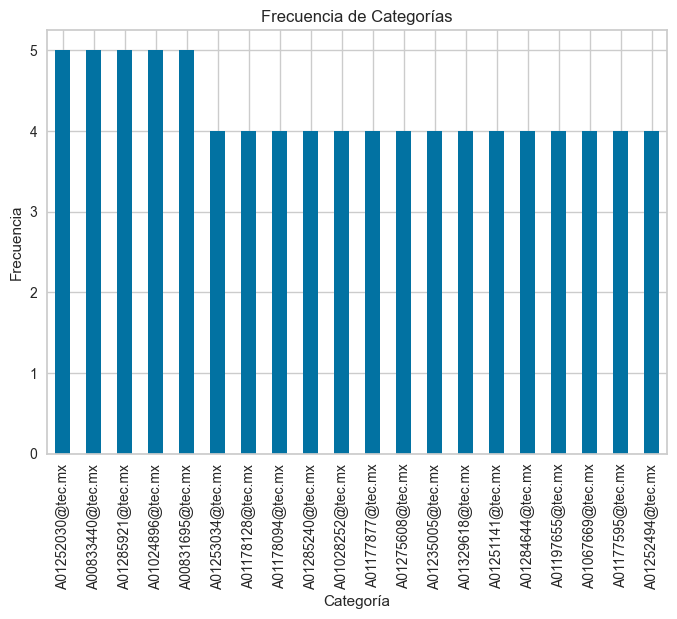

In [257]:
conteo_Personas = misdatosCarrera['Cuenta Correo Alumno'].value_counts().head(20)

conteo_Personas.plot(kind='bar')
plt.title('Frecuencia de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

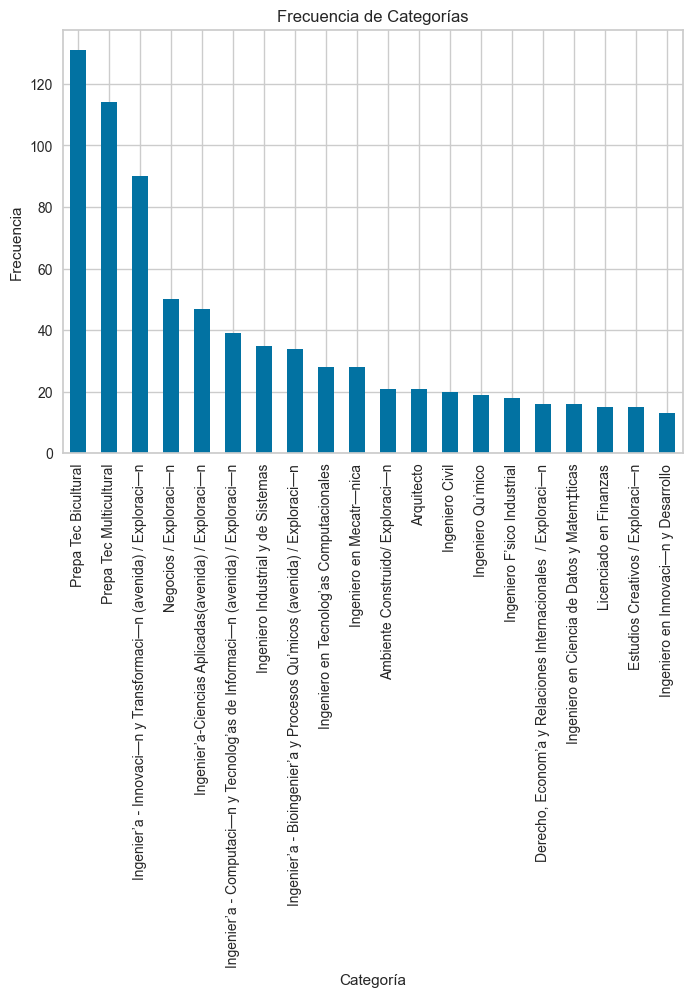

In [258]:
conteo_categorias = misdatosCarrera['Desc Programa Academico'].value_counts().head(20)
conteo_categorias.plot(kind='bar')
plt.title('Frecuencia de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

¿Cuál es la cardinalidad de las variables categóricas?

- Cuenta Correo Alumno: Esta variable tiene una cardinalidad de 432. Esto significa que hay 432 valores únicos de correos electrónicos de alumnos en tu conjunto de datos. Este es un número relativamente alto, lo que sugiere que cada correo electrónico es probablemente único para cada alumno. En el análisis de datos, este tipo de variable a menudo se trata como un identificador único.

- Desc Programa Académico: Esta variable tiene una cardinalidad de 62. Indica que hay 62 programas académicos únicos descritos en tu conjunto de datos. Esta es una cardinalidad más moderada, y esta variable es claramente categórica, posiblemente adecuada para análisis que requieren la agrupación o comparación de datos por programa académico.

Otras Conclusiones:
- Cuenta Correo Alumno: Dado que es probable que sea un identificador único para cada estudiante, puede no ser útil para análisis estadísticos o de agrupación, a menos que estemos buscando información específica del estudiante. Sin embargo, es valiosa para operaciones de identificación o seguimiento individual.

- Desc Programa Académico: Esta variable es más adecuada para análisis comparativos o de agrupación. Por ejemplo, podemos analizar cómo los estudiantes de diferentes programas académicos difieren en varios aspectos como rendimiento, elección de cursos, etc.

In [259]:
import pandas as pd

# Supongamos que df es tu DataFrame
# df = pd.DataFrame(...)

# Filtrar solo las columnas categóricas
columnas_categoricas = misdatosCarrera.select_dtypes(include=['object', 'category']).columns

# Calcular la cardinalidad
cardinalidad = misdatosCarrera[columnas_categoricas].nunique()

# Mostrar la cardinalidad de cada columna categórica
print(cardinalidad)

Cuenta Correo Alumno       432
Desc Programa Academico     62
dtype: int64


Para estas preguntas concluimos que el primer Dataset no es lo suficiente mente robusto para tratar de responderlas.

- ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?
- ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
- ¿Hay correlación entre las variables dependientes e independientes?
- ¿Cómo se distribuyen los datos en función de diferentes categorías?
- ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
- ¿Se deberían normalizar las imágenes para visualizarlas mejor?
- ¿Hay desequilibrio en las clases de la variable objetivo?

# Conjunto de evaluaciones por tutor

In [260]:
misdatosEvaluaciones = pd.read_excel("Evaluaciones por tutoría brindadas por los alumnos 23JAN.xlsx")
misdatosEvaluaciones.describe()

IDAppointment        Status     Evaluator  EvaluatorUserType  \
count   11463.000000  11463.000000  11463.000000       11463.000000   
mean     7788.061502      4.025735  14797.578906           3.228213   
std       713.711349      0.839991   2162.524376           3.087241   
min      6289.000000    -10.000000  11762.000000           1.000000   
25%      7259.000000      4.000000  13936.000000           1.000000   
50%      7751.000000      4.000000  14433.000000           1.000000   
75%      8360.000000      4.000000  15101.000000           8.000000   
max      9456.000000      5.000000  23513.000000           9.000000   

          Evaluated  evaluatedUsertype  QuestionType  
count  11463.000000       11463.000000  11463.000000  
mean   15161.823345           4.303324      1.616854  
std     2284.171680           3.247274      0.801174  
min    10075.000000           1.000000      1.000000  
25%    13957.000000           1.000000      1.000000  
50%    14584.000000           3.000000      1.000000  
75%    15484.000000           8.000000      2.000000  
max    22382.000000           9.000000      3.000000

In [261]:
misdatosEvaluaciones

IDAppointment  Status  Evaluator               Evaluatorname  \
0               8361       4      19447  gabyfernandez854@gmail.com   
1               8504       4      19883            a01753728@tec.mx   
2               7754       4      15401            A01385134@tec.mx   
3               7107       4      11818            a01654087@tec.mx   
4               8609       4      14524            a01799906@tec.mx   
...              ...     ...        ...                         ...   
11458           8412       4      14278           bayrebe@gmail.com   
11459           7345       4      14172            a01661437@tec.mx   
11460           7365       4      14640            a00835803@tec.mx   
11461           8772       4      19469  juliocesar.2002@icloud.com   
11462           6459       5      12110        cindygfc01@gmail.com   

       EvaluatorUserType  Evaluated                 evaluatedname  \
0                      8      14566              a01178149@tec.mx   
1                      7      19866              a01750754@tec.mx   
2                      1      15823              a01385118@tec.mx   
3                      1      14074              a01658389@tec.mx   
4                      1      19886              A01745719@tec.mx   
...                  ...        ...                           ...   
11458                  8      14251              A00835680@tec.mx   
11459                  1      14865              A01654903@tec.mx   
11460                  1      14896      Monik.mejorado@gmail.com   
11461                  1      20203              a01784104@tec.mx   
11462                  1      12628  montserrat4muraira@gmail.com   

       evaluatedUsertype  QuestionType  \
0                      1             2   
1                      1             3   
2                      8             3   
3                      8             1   
4                      7             1   
...                  ...           ...   
11458                  1             1   
11459                  8             2   
11460                  9             1   
11461                  3             2   
11462                  3             3   

                                                Question       Answer  
0       ¿Cómo calificarías la calidad del desempeño d...            1  
1      Considero que en esta sesión tuve el avance co...            5  
2      Considero que el alumne está comprometide con ...            4  
3      ¿Tienes algún comentario para mejorar el servi...           No  
4                      ¿Tuviste la sesión con el alumne?           Si  
...                                                  ...          ...  
11458  ¿De qué otra temática te gustaría recibir tuto...  Integrales   
11459   ¿Cómo calificarías la calidad del desempeño d...            5  
11460                  ¿Tuviste la sesión con el alumne?           Sí  
11461   ¿Cómo calificarías la calidad del desempeño d...            4  
11462  Considero que el alumne está comprometide con ...            4  

[11463 rows x 11 columns]

In [262]:
print(misdatosEvaluaciones.dtypes)

IDAppointment         int64
Status                int64
Evaluator             int64
Evaluatorname        object
EvaluatorUserType     int64
Evaluated             int64
evaluatedname        object
evaluatedUsertype     int64
QuestionType          int64
Question             object
Answer               object
dtype: object


In [263]:
print(misdatosEvaluaciones.nunique())

IDAppointment        1598
Status                  4
Evaluator            1191
Evaluatorname        1191
EvaluatorUserType       9
Evaluated            1433
evaluatedname        1433
evaluatedUsertype       9
QuestionType            3
Question               10
Answer               2765
dtype: int64


In [264]:
# Contar NaN y 0
nan_count = misdatosEvaluaciones.isna().sum()
zero_count = misdatosEvaluaciones.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 IDAppointment           0
Status                  0
Evaluator               0
Evaluatorname           0
EvaluatorUserType       0
Evaluated               0
evaluatedname           0
evaluatedUsertype       0
QuestionType            0
Question                0
Answer               1904
dtype: int64

Conteo de 0 por columna:
 IDAppointment          0
Status                 0
Evaluator              0
Evaluatorname          0
EvaluatorUserType      0
Evaluated              0
evaluatedname          0
evaluatedUsertype      0
QuestionType           0
Question               0
Answer               210
dtype: int64

Total de NaN en el DataFrame: 1904
Total de 0 en el DataFrame: 210


C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\825963349.py:38: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\825963349.py:38: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\rigob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


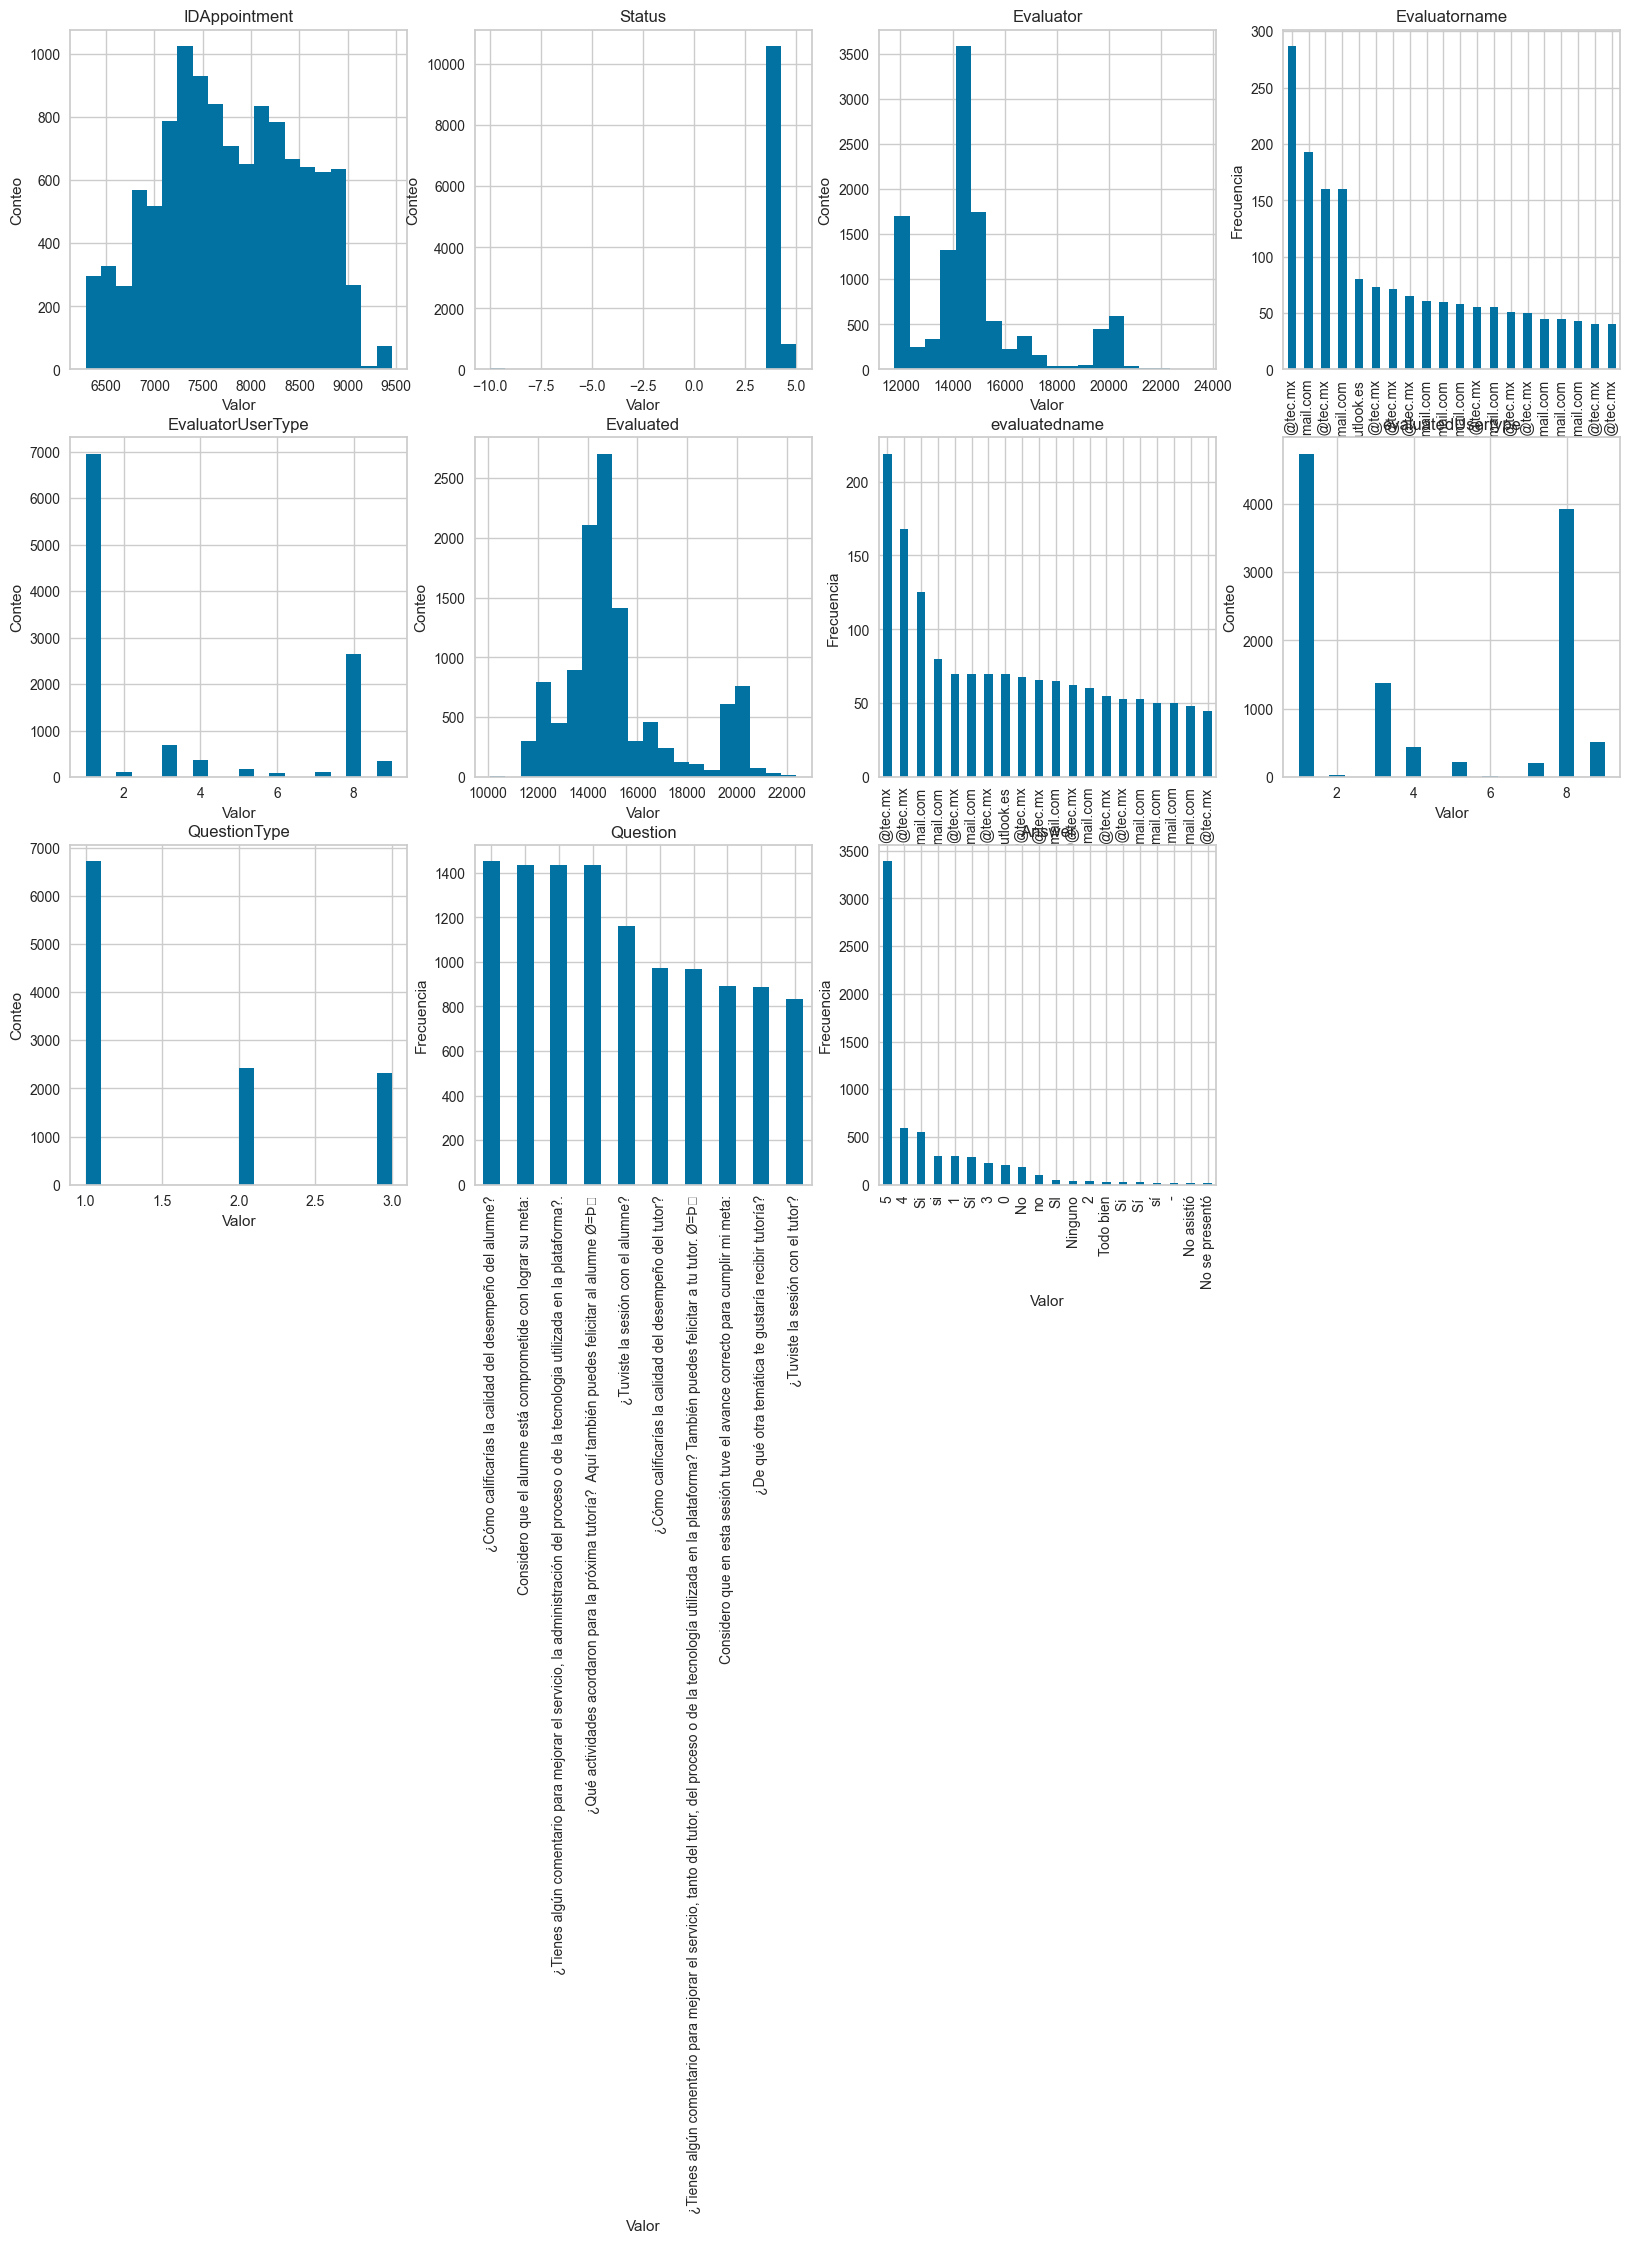

In [265]:
# Contar el número de columnas categóricas y numéricas (int64)
num_columnas_graficar = sum(misdatosEvaluaciones.dtypes.apply(lambda x: x.name).isin(['object', 'category', 'int64']))

# Determinar el número de filas necesarias para los subgráficos
filas = (num_columnas_graficar + 3) // 4  # Redondear hacia arriba para asegurar que todas las columnas se incluyan

# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(filas, 4, figsize=(20, 5 * filas))
axs = axs.ravel()  # Convertir los ejes en un array 1D para facilitar su manejo

# Contador para los ejes
ax_idx = 0

# Iterar sobre todas las columnas del DataFrame
for columna in misdatosEvaluaciones.columns:
    # Comprobar si la columna es categórica o numérica (int64)
    if misdatosEvaluaciones[columna].dtype == 'object' or misdatosEvaluaciones[columna].dtype.name in ['category', 'int64']:
        # Conteo de categorías y selección del top 20 (para categóricas) o histograma (para numéricas)
        if misdatosEvaluaciones[columna].dtype == 'object' or misdatosEvaluaciones[columna].dtype.name == 'category':
            conteo_categorias = misdatosEvaluaciones[columna].value_counts().head(20)
            conteo_categorias.plot(kind='bar', ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Frecuencia')
        else:
            misdatosEvaluaciones[columna].hist(bins=20, ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Conteo')

        axs[ax_idx].set_title(f'{columna}')
        axs[ax_idx].set_xlabel('Valor')

        # Incrementar el índice del eje
        ax_idx += 1

# Ocultar los ejes que no se usan (si los hay)
for i in range(ax_idx, len(axs)):
    axs[i].set_visible(False)

# Ajustar el layout
plt.tight_layout()
plt.show()


 ¿Hay correlación entre las variables dependientes e independientes?

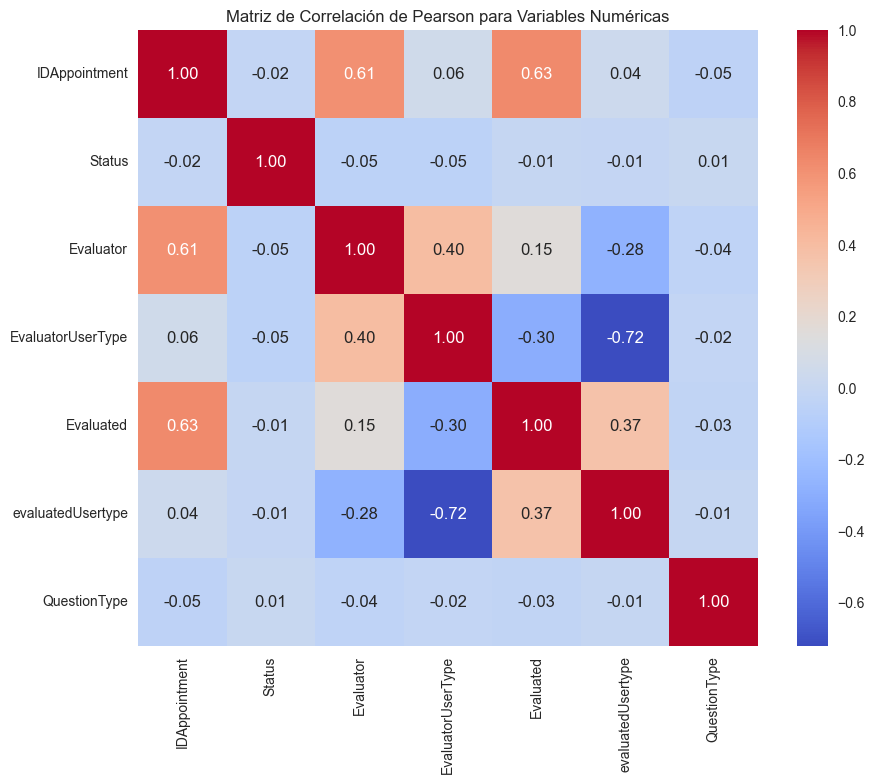

In [266]:

# Filtrar solo las columnas numéricas (int64)
columnas_numericas = misdatosEvaluaciones.select_dtypes(include=['int64'])

# Calcular la matriz de correlación de Pearson
matriz_correlacion = columnas_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Pearson para Variables Numéricas")
plt.show()

 ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

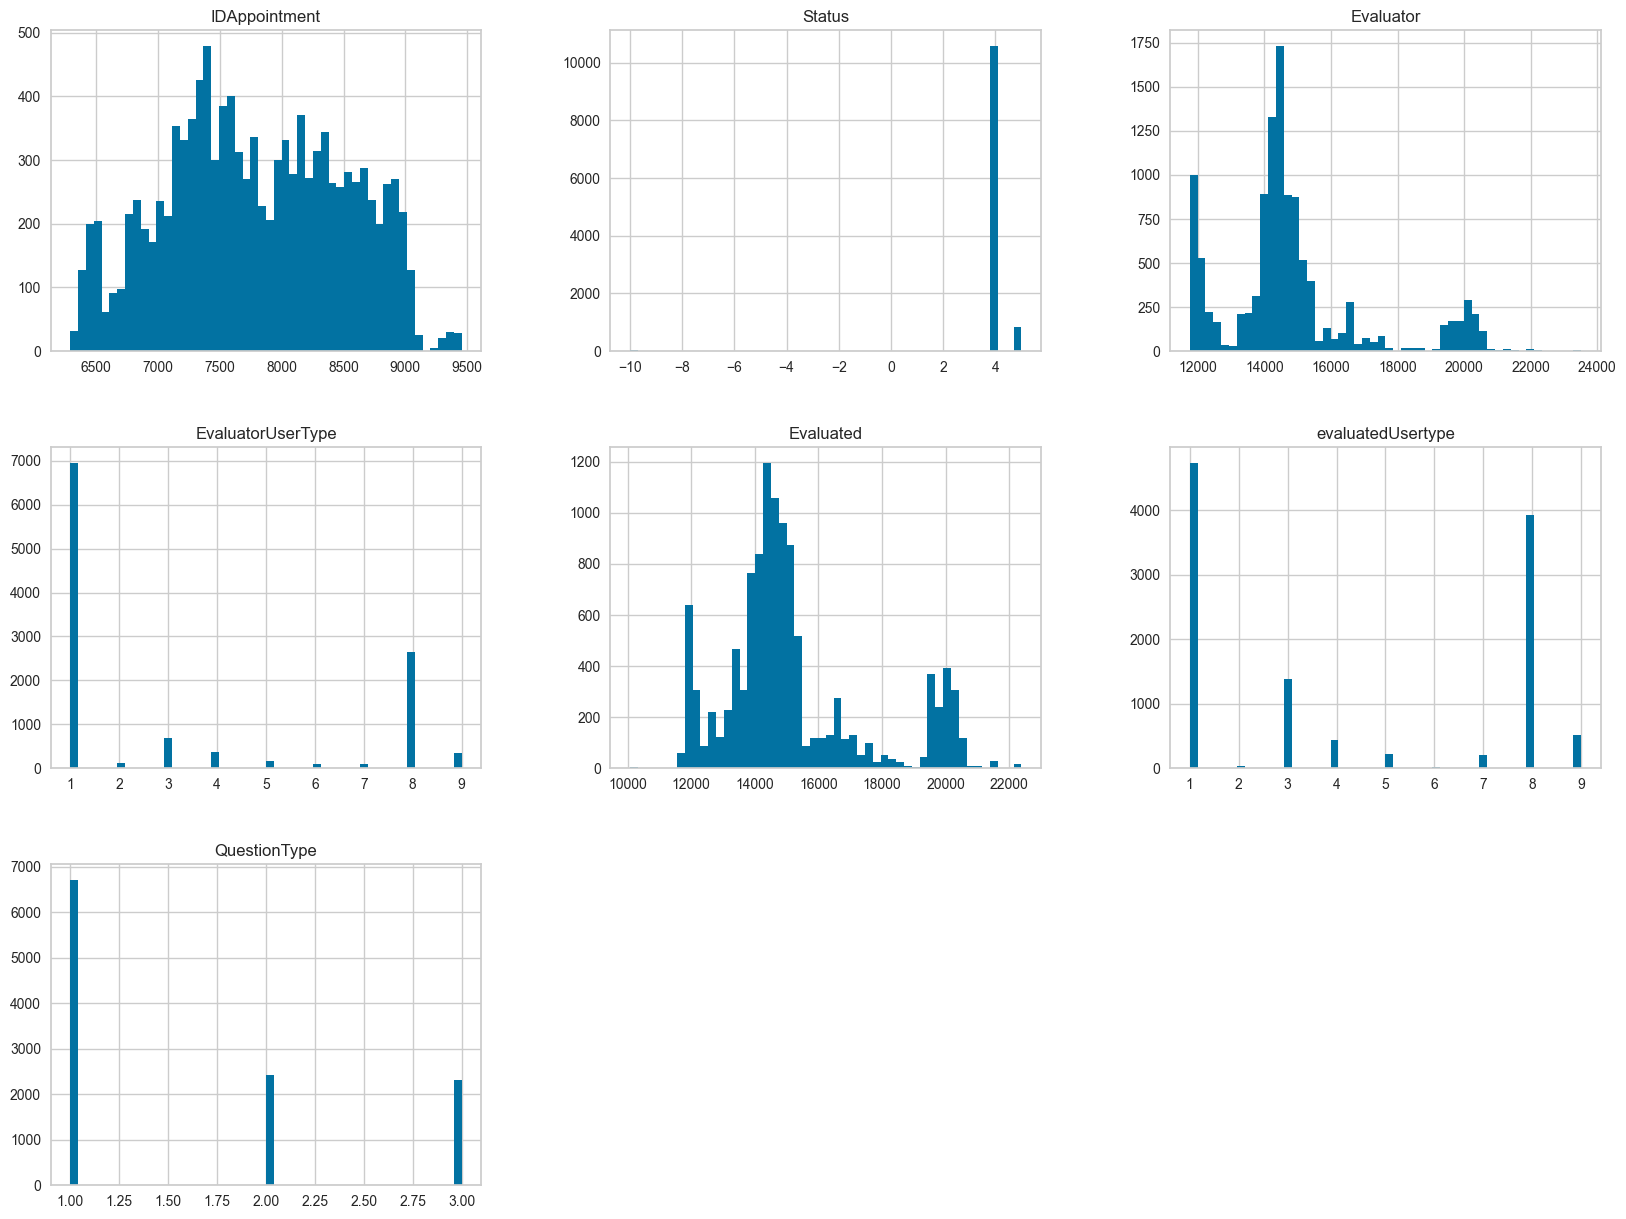

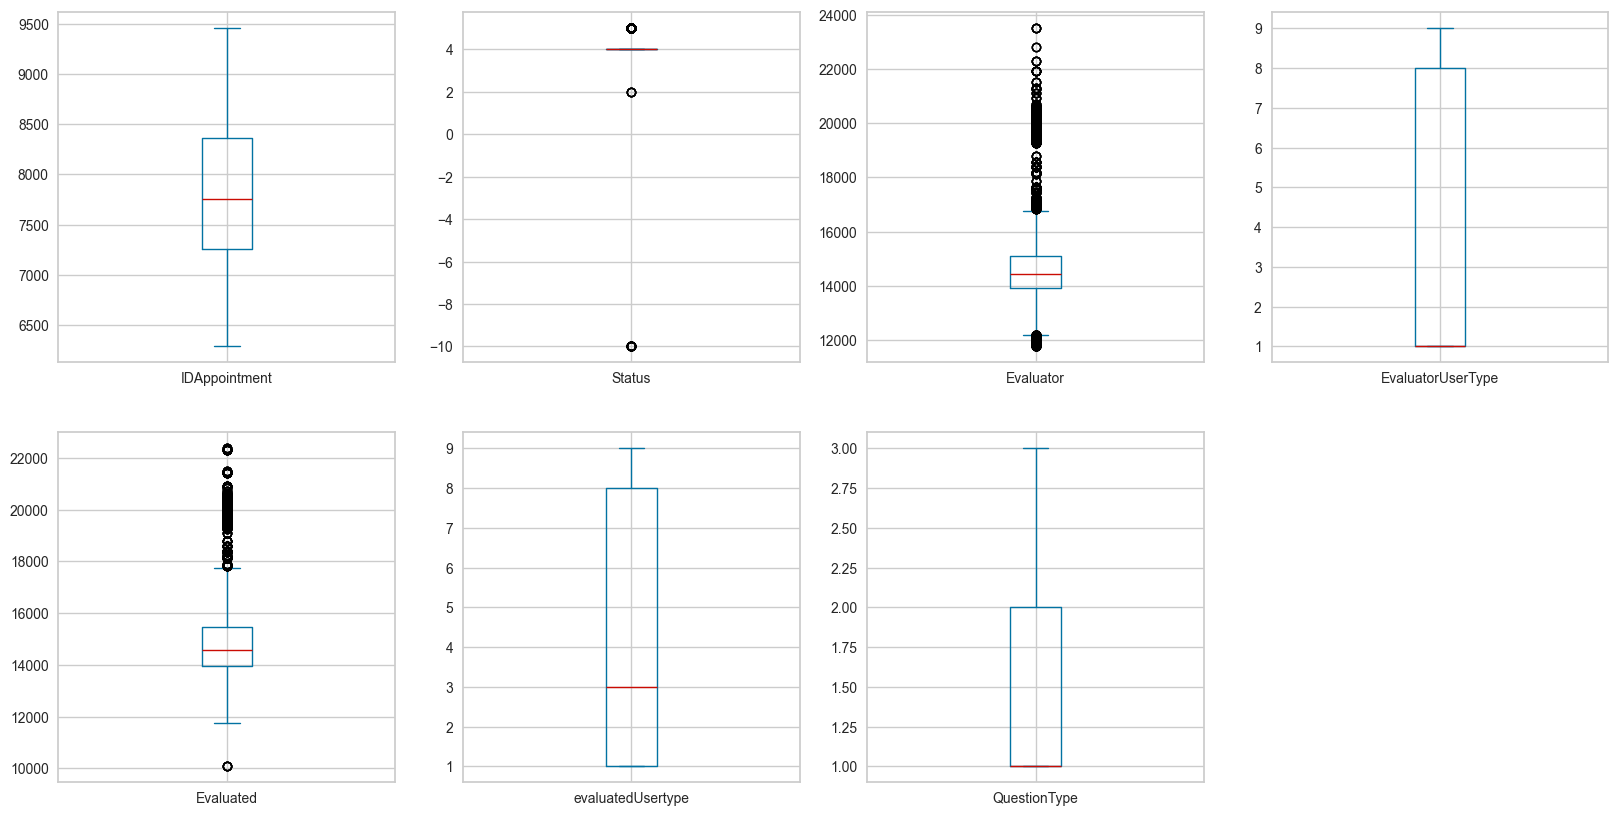

In [267]:
misdatosEvaluaciones.hist(bins=50, figsize=(20,15))
plt.show()

# Gráficos de caja para identificar outliers y distribución
misdatosEvaluaciones.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,10))
plt.show()

¿Cómo se distribuyen los datos en función de diferentes categorías?

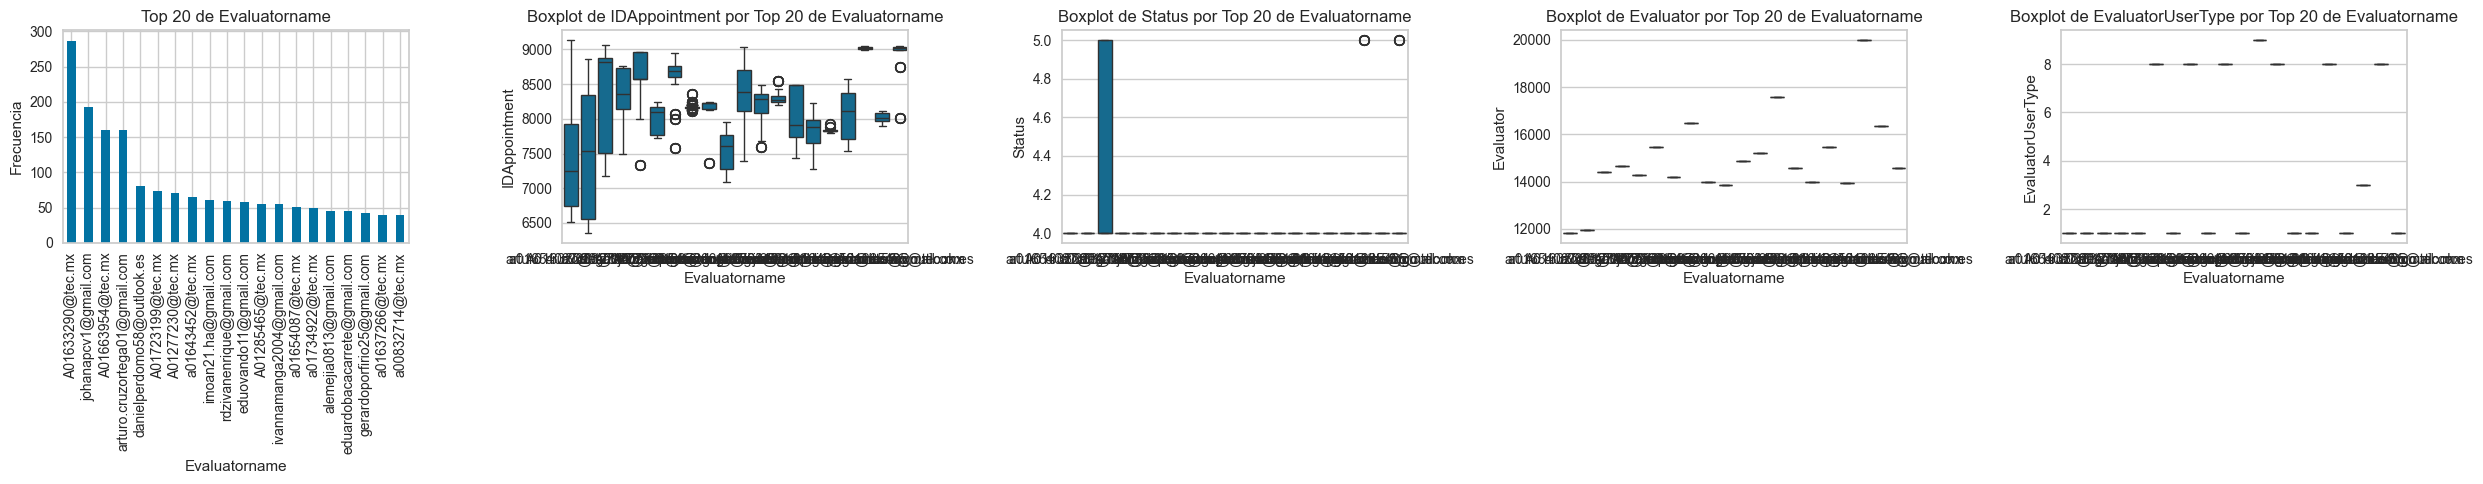

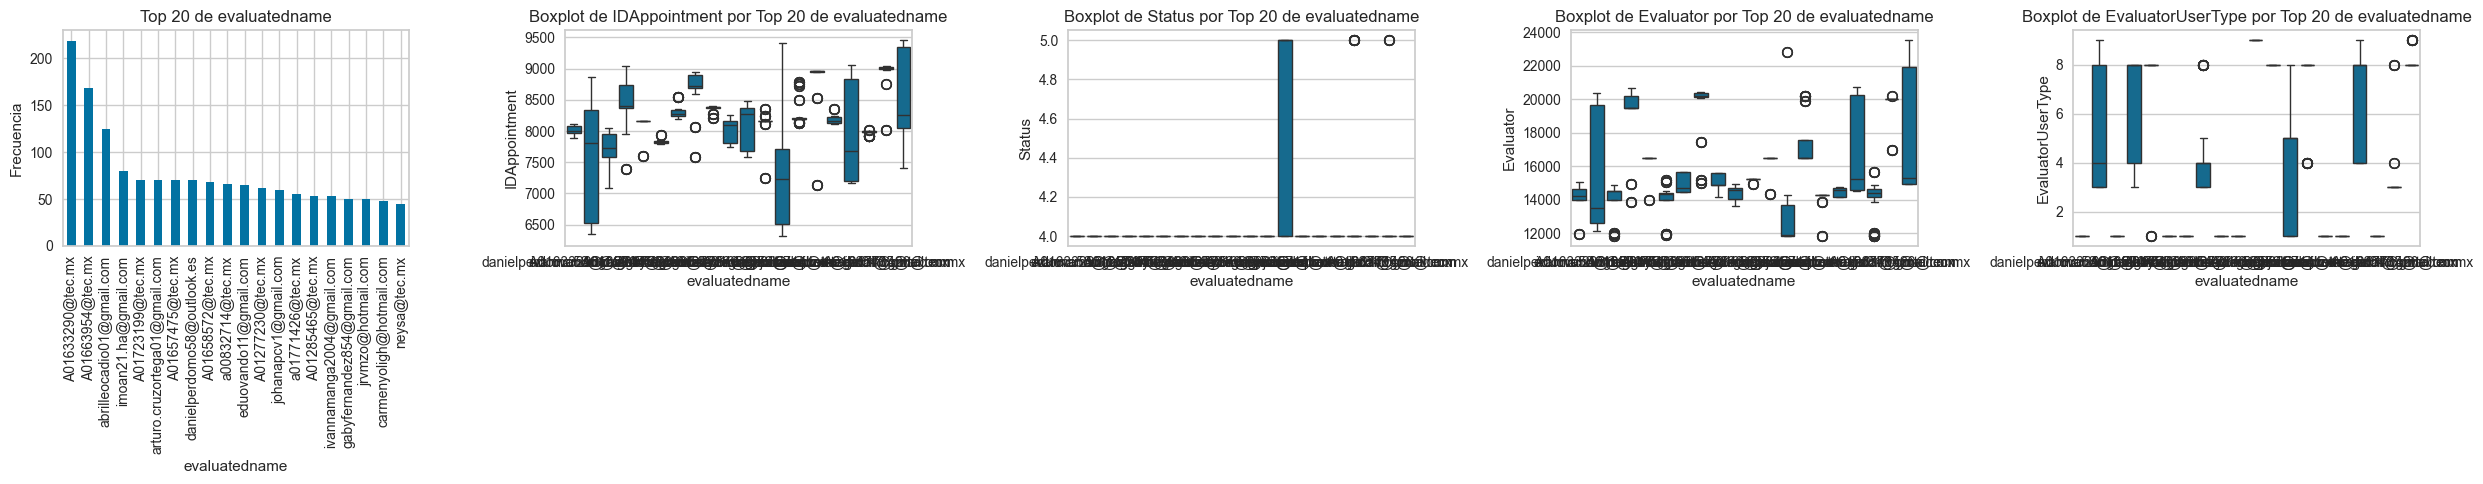

C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\2312894162.py:27: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\2312894162.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\rigob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


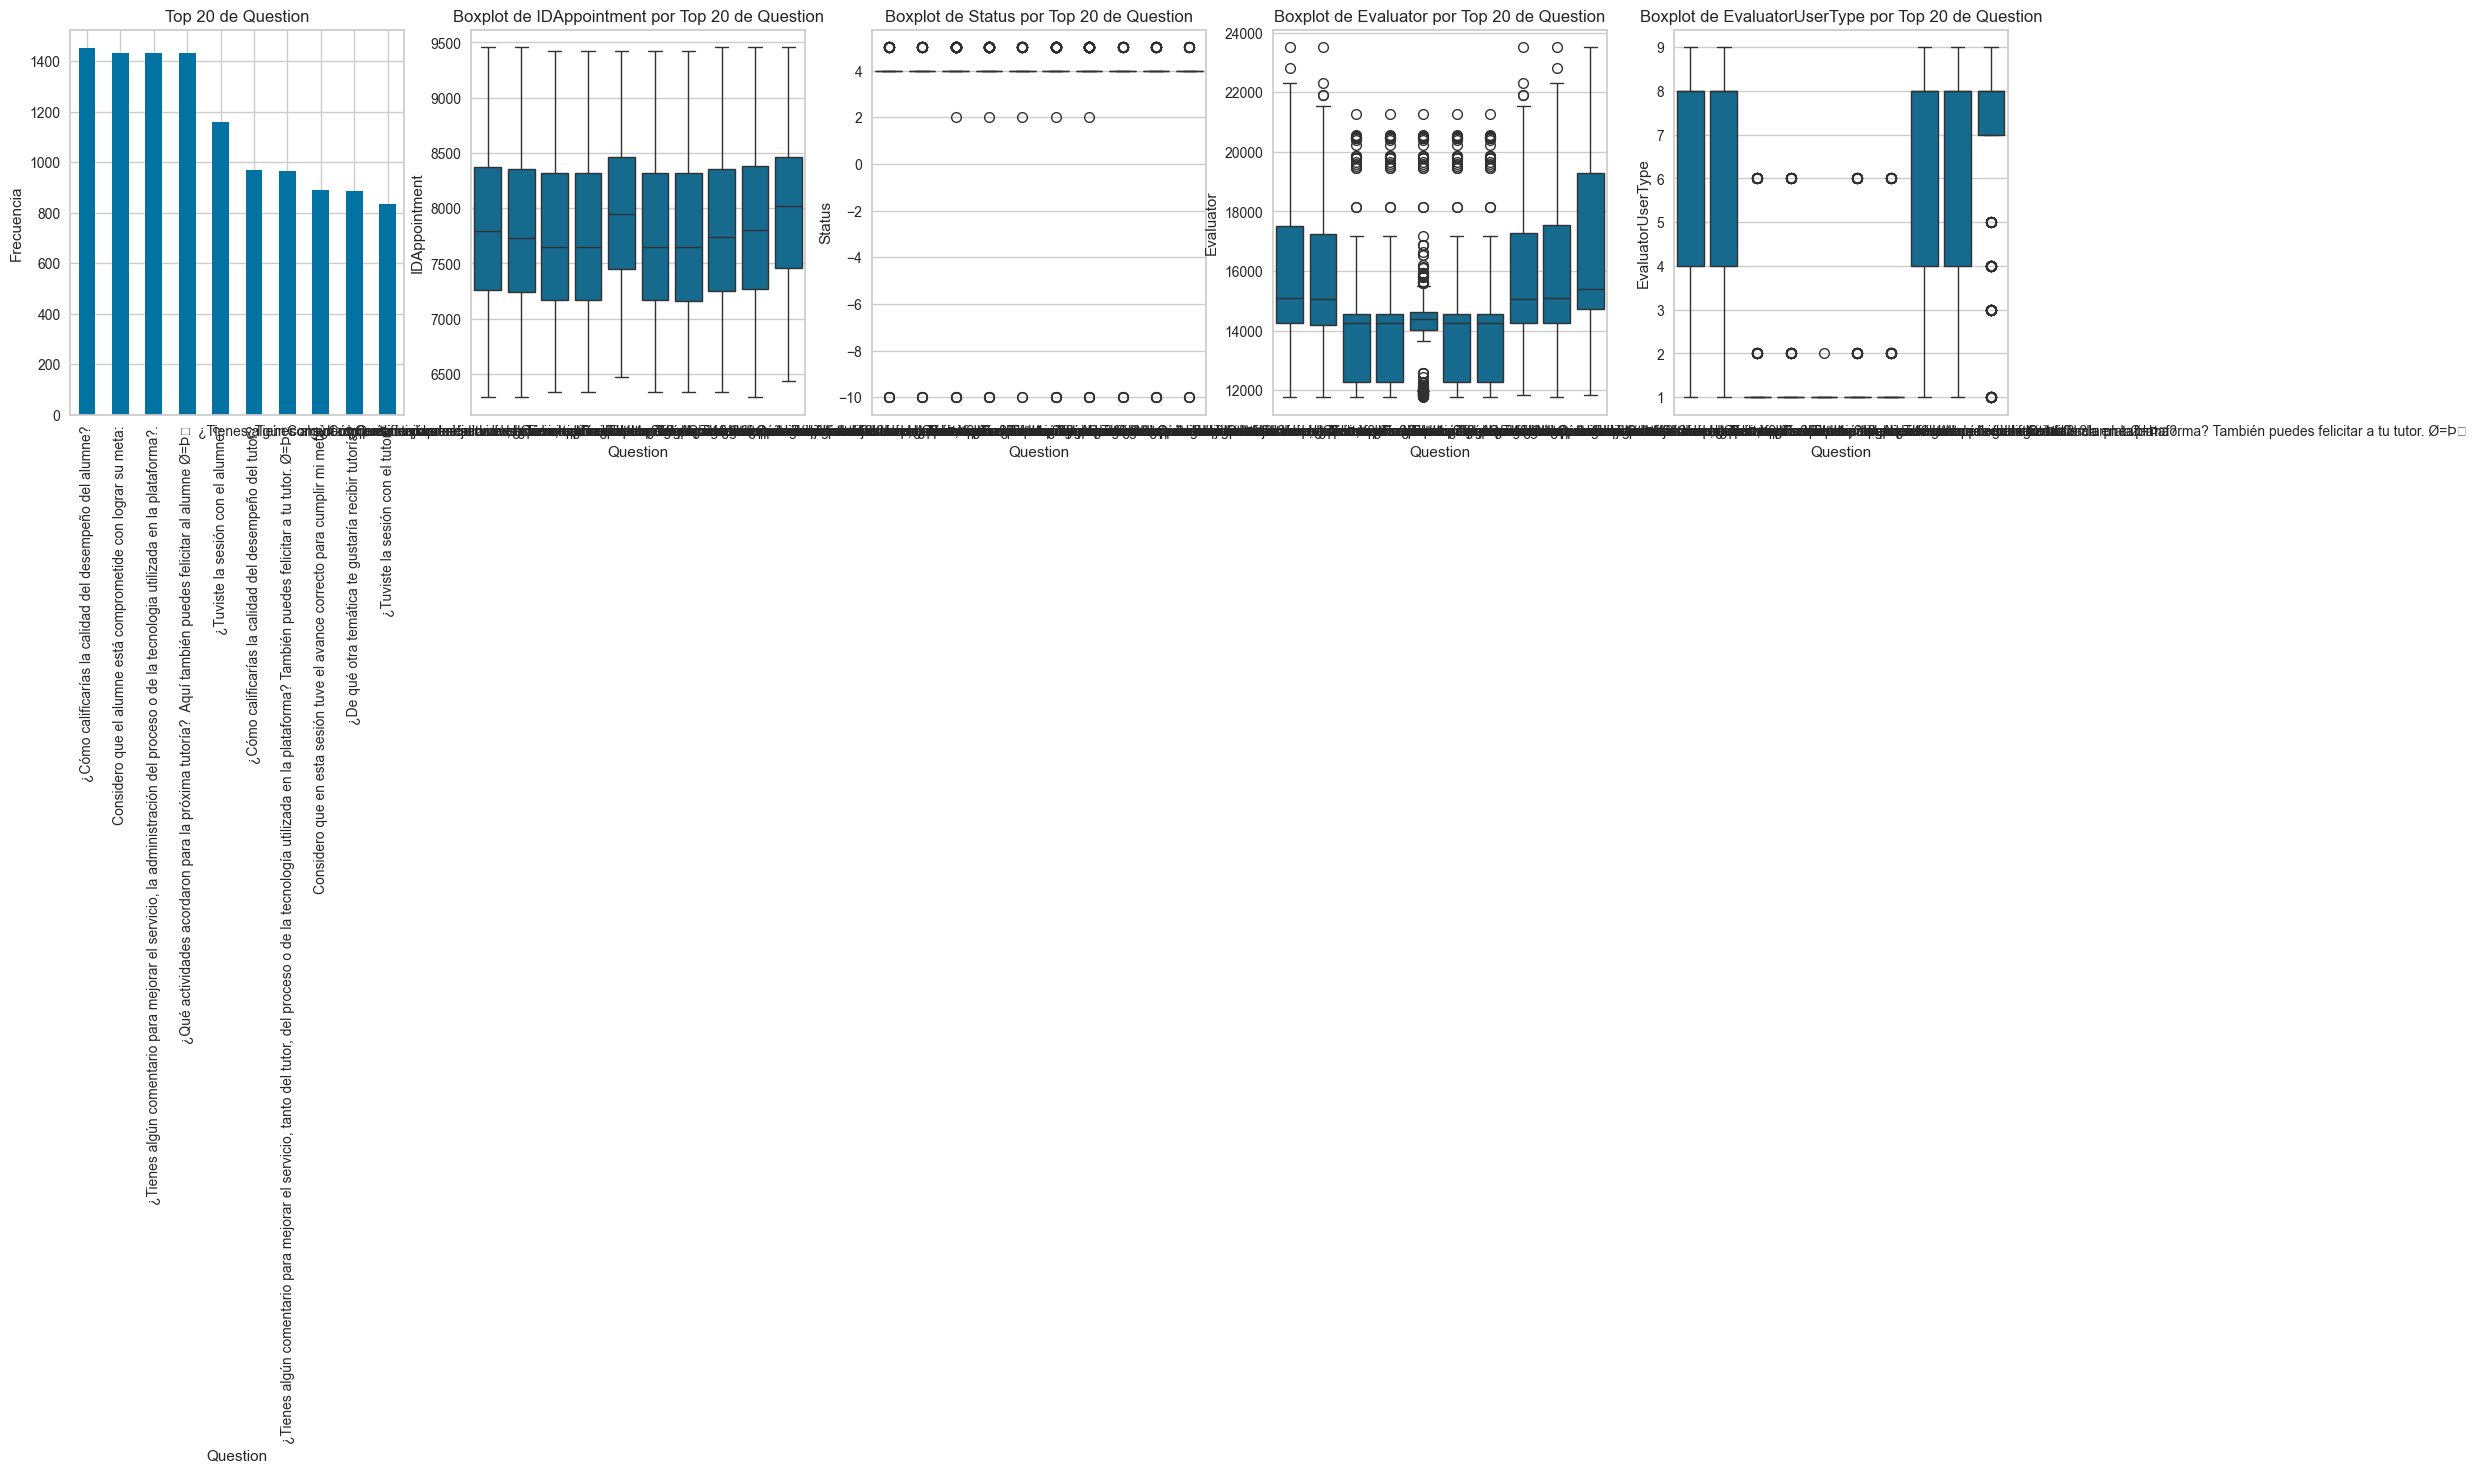

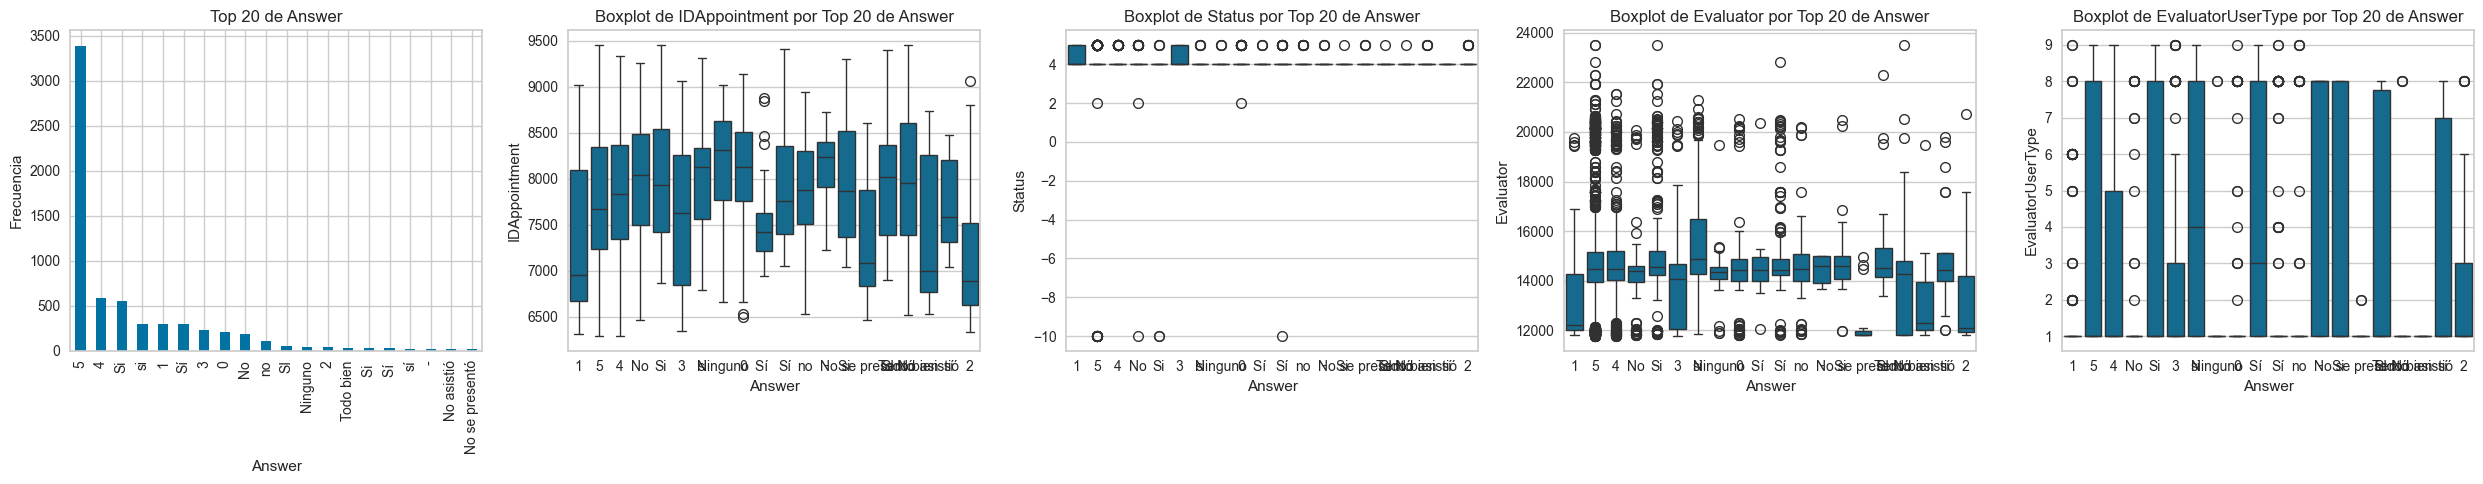

In [268]:
# Iterar sobre todas las columnas de tipo 'object' del DataFrame
for columna in misdatosEvaluaciones.select_dtypes(include=['object']):
    # Seleccionar el top 20 de cada categoría
    top_20 = misdatosEvaluaciones[columna].value_counts().head(20)

    # Crear una nueva figura para los subgráficos
    plt.figure(figsize=(25, 5))

    # Gráfico de barras para el top 20 de cada columna categórica
    plt.subplot(1, 5, 1)  # 1 fila, 5 columnas, posición 1
    top_20.plot(kind='bar')
    plt.title(f'Top 20 de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Para cada columna categórica, crear un gráfico de caja por categoría con todas las variables numéricas
    # Considerando solo las categorías en el top 20
    columnas_numericas = misdatosEvaluaciones.select_dtypes(include=['number']).columns
    for idx, col_num in enumerate(columnas_numericas[:4]):  # Limitar a 4 variables numéricas
        # Filtrar los datos para incluir solo las categorías en el top 20
        datos_filtrados = misdatosEvaluaciones[misdatosEvaluaciones[columna].isin(top_20.index)]
        
        plt.subplot(1, 5, idx + 2)  # Posiciones 2 a 5
        sns.boxplot(x=columna, y=col_num, data=datos_filtrados)
        plt.title(f'Boxplot de {col_num} por Top 20 de {columna}')

    plt.tight_layout()
    plt.show()

¿Cuál es la cardinalidad de las variables categóricas?

In [269]:
# Seleccionar solo las columnas de tipo 'object'
columnas_object = misdatosEvaluaciones.select_dtypes(include=['object'])

# Calcular la cardinalidad (número de valore"s únicos) para cada columna de tipo 'object'
cardinalidad = columnas_object.nunique()

# Mostrar la cardinalidad
print(cardinalidad)

Evaluatorname    1191
evaluatedname    1433
Question           10
Answer           2765
dtype: int64


¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


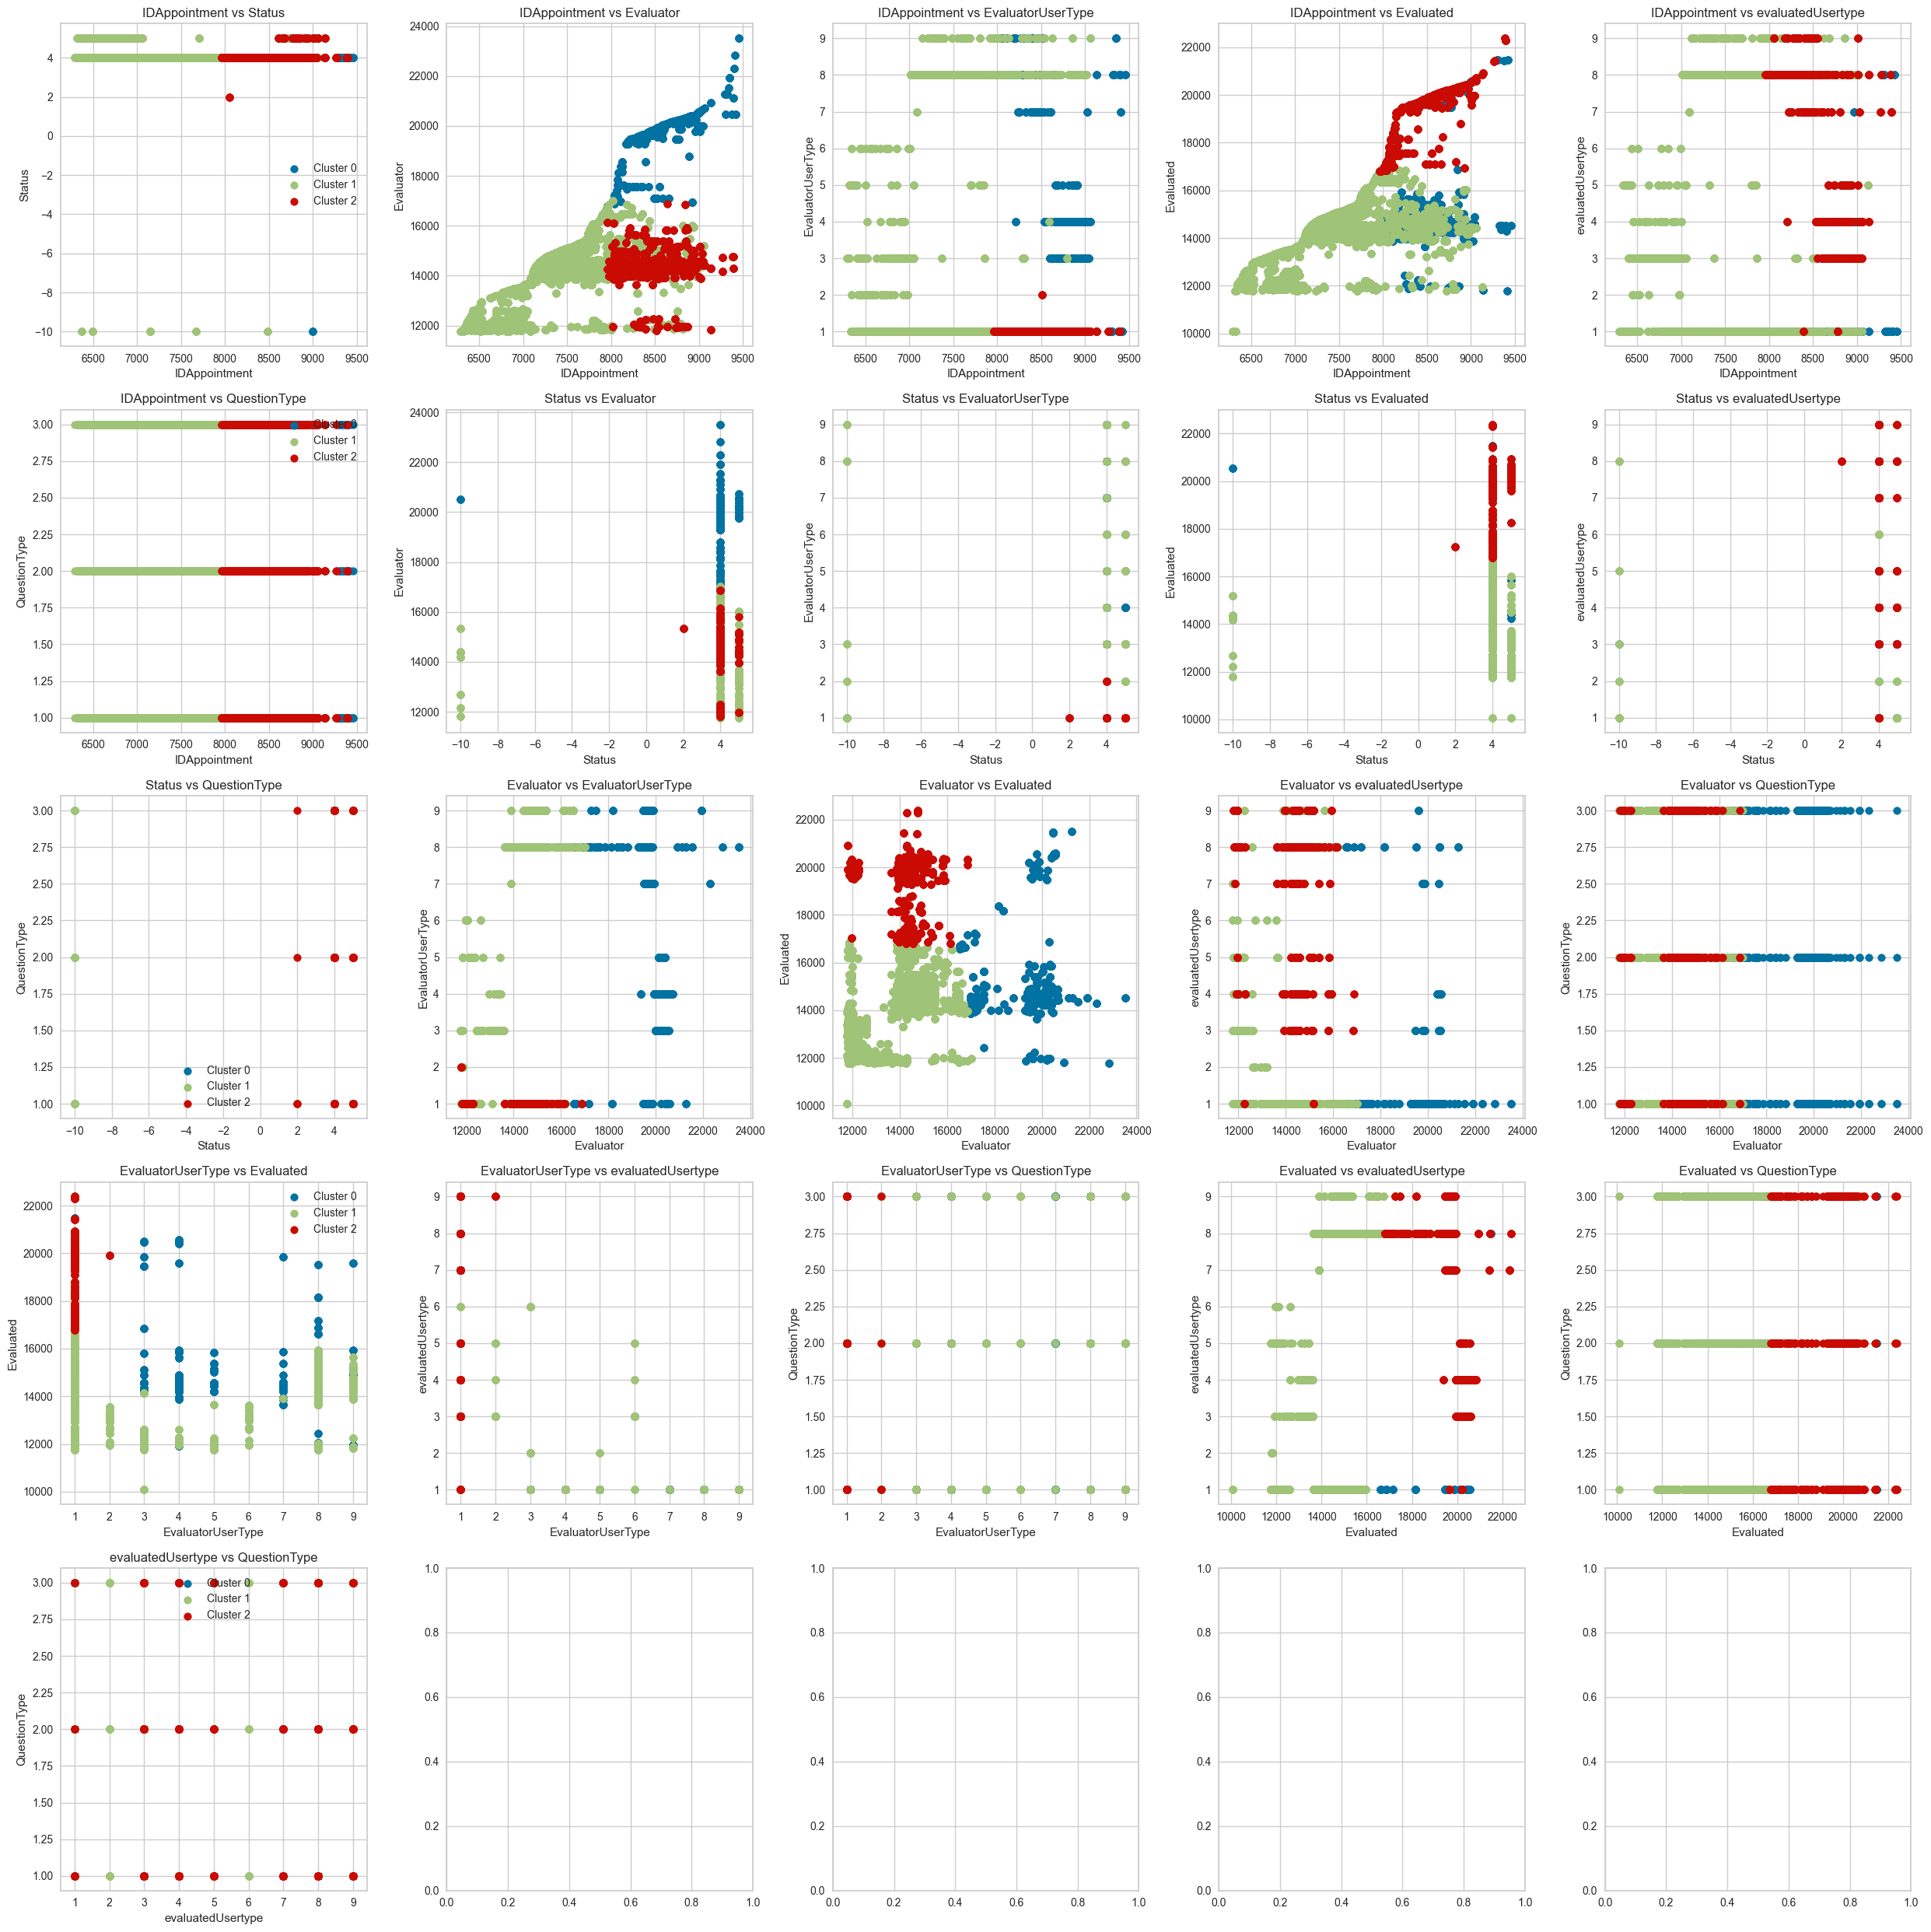

In [270]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import itertools

# Seleccionar columnas numéricas
columnas_numericas = misdatosEvaluaciones.select_dtypes(include=['int64', 'float64']).columns

# Ejecutar K-Means
kmeans = KMeans(n_clusters=3)
misdatosEvaluaciones['cluster'] = kmeans.fit_predict(misdatosEvaluaciones[columnas_numericas])

# Combinaciones de todas las columnas numéricas
combinaciones = list(itertools.combinations(columnas_numericas, 2))

# Crear subplots
num_graficas = len(combinaciones)
num_filas = (num_graficas + 4) // 5  # Redondear hacia arriba
fig, axs = plt.subplots(num_filas, 5, figsize=(25, 5 * num_filas))
axs = axs.ravel()

for i, (col1, col2) in enumerate(combinaciones):
    for cluster in range(3):  # Asumiendo 3 clusters
        cluster_data = misdatosEvaluaciones[misdatosEvaluaciones['cluster'] == cluster]
        axs[i].scatter(cluster_data[col1], cluster_data[col2], label=f'Cluster {cluster}')
    
    axs[i].set_title(f'{col1} vs {col2}')
    axs[i].set_xlabel(col1)
    axs[i].set_ylabel(col2)
    if i % 5 == 0:  # Añadir leyenda solo en la primera gráfica de cada fila para evitar la congestión
        axs[i].legend()

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()

- Los clústeres se distinguen bien en algunas combinaciones de variables, mientras que en otras hay superposición significativa entre los clústeres.

- Las variables que parecen tener una fuerte relación con los clústeres incluyen EvaluatorID, EvaluatedID, y algunas categorías de QuestionType. Estas variables muestran una distribución distinta entre los clústeres y podrían ser determinantes clave en la segmentación.

- En algunos gráficos, como Disappointment vs Status y EvaluatorUserType vs EvaluatorID, los clústeres parecen estar separados principalmente por una de las dos variables, lo que sugiere que una variable tiene un mayor peso en la formación de clústeres que la otra.

- Los boxplots muestran la distribución de las variables dentro de cada clúster y pueden indicar la presencia de valores atípicos, la variabilidad dentro de los clústeres y las diferencias entre los clústeres.

- Los clústeres también varían en términos de densidad de los puntos, lo que puede indicar diferencias en la cohesión interna de los clústeres o en la cantidad de observaciones que contienen.

- En los gráficos donde se compara EvaluatorID o EvaluatedID con otros factores, se observa que ciertos ID están asociados con rangos específicos de otras variables, lo que podría indicar roles o características específicas para esos IDs.

 - Los gráficos que comparan Status con otros factores muestran que el Status es bastante homogéneo dentro de los clústeres en algunos casos, mientras que en otros hay una mayor dispersión.

¿Hay desequilibrio en las clases de la variable objetivo?

C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\479938103.py:23: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\479938103.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\rigob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


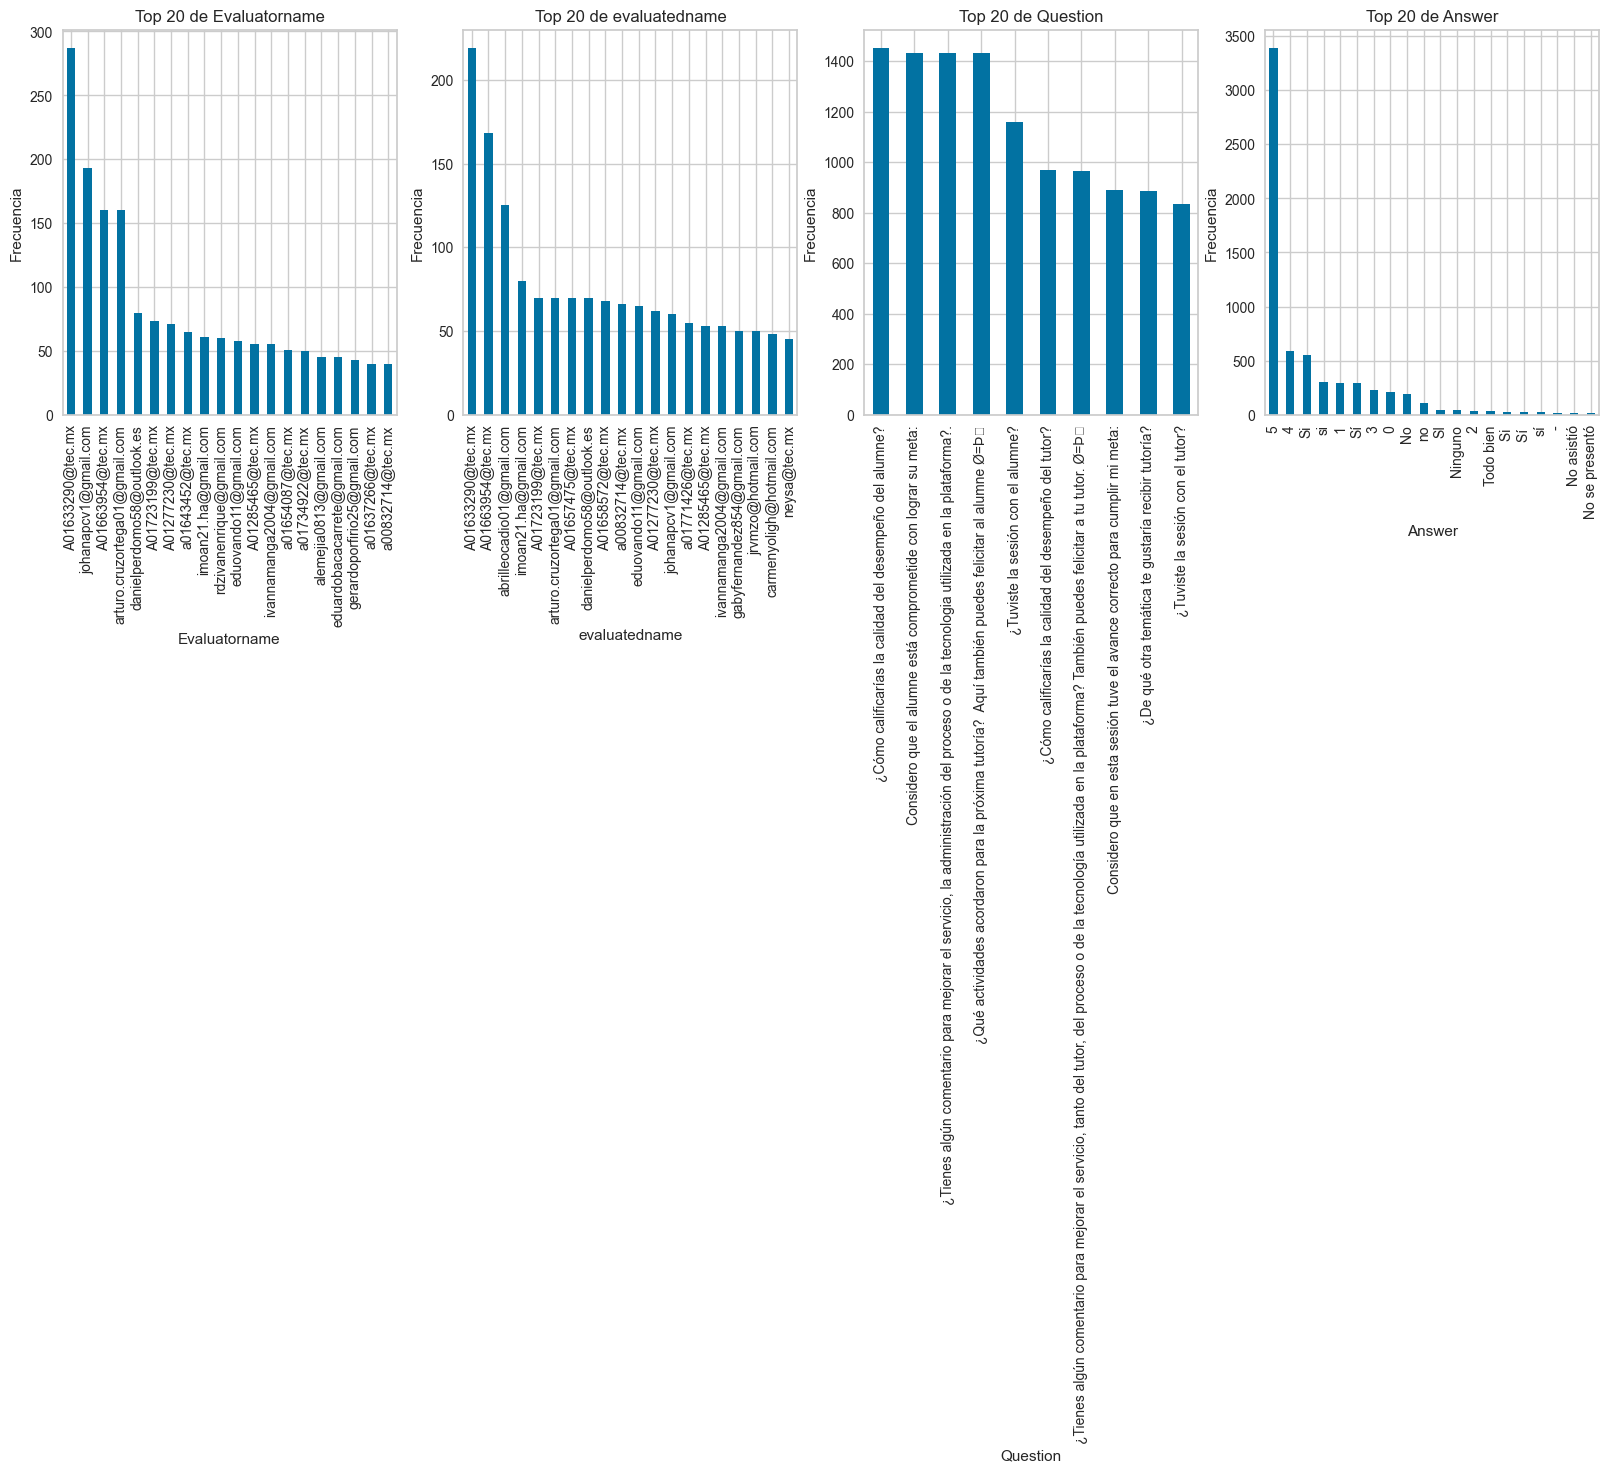

In [271]:
# Identificar columnas categóricas
columnas_categoricas = misdatosEvaluaciones.select_dtypes(include=['object', 'category']).columns

# Crear subplots
num_columnas = len(columnas_categoricas)
num_filas = (num_columnas + 4) // 5  # Redondear hacia arriba para asegurar que todas las columnas se incluyan
fig, axs = plt.subplots(num_filas, 5, figsize=(25, 5 * num_filas))
axs = axs.ravel()

# Iterar sobre las columnas categóricas y crear gráficos de barras para el top 20
for i, columna in enumerate(columnas_categoricas):
    top_20 = misdatosEvaluaciones[columna].value_counts().head(20)
    top_20.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Top 20 de {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')

# Ocultar los ejes que no se usan (si los hay)
for i in range(len(columnas_categoricas), len(axs)):
    axs[i].set_visible(False)

# Ajustar el layout y mostrar gráfico
plt.tight_layout()
plt.show()

# Numero Tutorias

In [272]:
misdatosNumTutorias = pd.read_excel("Numero de tutorias brindadas 23JAN.xlsx")
misdatosNumTutorias.describe()

ID              FechayHoraTutoria      Minutos      Estatus  \
count  2790.000000                           2790  2790.000000  2790.000000   
mean   7843.586022  2023-04-05 02:36:56.236559104    39.992832     1.869892   
min    6328.000000            2022-09-05 13:00:00    30.000000   -13.000000   
25%    7110.250000            2023-03-02 18:45:00    40.000000     2.000000   
50%    7833.500000            2023-04-10 18:40:00    40.000000     4.000000   
75%    8562.750000            2023-06-06 10:35:00    40.000000     4.000000   
max    9554.000000            2024-01-26 20:45:00    40.000000     5.000000   
std     868.052552                            NaN     0.267692     4.598150   

           AlumnoID       TutorID  
count   2790.000000   2790.000000  
mean   16249.911111  13876.363799  
min    11851.000000  11772.000000  
25%    13667.500000  12168.000000  
50%    15159.000000  14214.000000  
75%    19594.250000  14562.000000  
max    23702.000000  23660.000000  
std     3004.107919   1610.109078

In [273]:
misdatosNumTutorias

ID   FechayHoraTutoria  Minutos  Estatus  AlumnoID  \
0     6328 2022-09-05 13:00:00       40      -10     11922   
1     6337 2022-09-10 16:00:00       40        4     11958   
2     6342 2022-09-20 17:20:00       40        5     12047   
3     6343 2022-09-25 13:20:00       40        2     12056   
4     6344 2022-09-28 10:20:00       40        5     11964   
...    ...                 ...      ...      ...       ...   
2785  9545 2024-01-16 20:45:00       40        4     22813   
2786  9547 2024-01-17 20:45:00       40        4     22813   
2787  9551 2024-01-18 21:15:00       40        4     22813   
2788  9552 2024-01-21 19:15:00       40       -2     22813   
2789  9554 2024-01-26 20:45:00       40        0     23702   

                             EmailAlumno  TutorID  \
0            romanalejandro333@gmail.com    11917   
1     lili.hernandezreyes.1070@gmail.com    11944   
2              aritorres112005@gmail.com    11887   
3                       a01652733@tec.mx    11929   
4                moises.emma@outlook.com    11968   
...                                  ...      ...   
2785            lilimares.mlmj@gmail.com    14529   
2786            lilimares.mlmj@gmail.com    14529   
2787            lilimares.mlmj@gmail.com    14529   
2788            lilimares.mlmj@gmail.com    14529   
2789             barcam.torres@gmail.com    14529   

                       EmailTutor     Category  \
0         andres.zenteno@live.com  Matemáticas   
1                a01638394@tec.mx  Matemáticas   
2     alejandra.vzarate@gmail.com  Matemáticas   
3                A01637537@tec.mx  Matemáticas   
4        al02896389@tecmilenio.mx  Matemáticas   
...                           ...          ...   
2785             a01771426@tec.mx  Matemáticas   
2786             a01771426@tec.mx  Matemáticas   
2787             a01771426@tec.mx  Matemáticas   
2788             a01771426@tec.mx  Matemáticas   
2789             a01771426@tec.mx  Matemáticas   

                                            SubCatName Secondcategory  \
0     Ángulos, triángulos y relaciones trigonométricas            NaN   
1                        Sumas y sucesiones de números    Matemáticas   
2               Razón de cambio y concepto de derivada    Matemáticas   
3                               Ecuaciones cuadráticas    Matemáticas   
4                                  Ecuaciones lineales    Matemáticas   
...                                                ...            ...   
2785                                           Calculo    Matemáticas   
2786                                           Calculo    Matemáticas   
2787                                           Calculo    Matemáticas   
2788                                           Calculo    Matemáticas   
2789                                           Calculo    Matemáticas   

                SecondSubCatName  \
0                            NaN   
1         Ecuaciones cuadráticas   
2             Área bajo la curva   
3     Estadística y probabilidad   
4         Ecuaciones cuadráticas   
...                          ...   
2785               Trigonometría   
2786               Trigonometría   
2787               Trigonometría   
2788               Trigonometría   
2789               Trigonometría   

                                            Observation  
0                                                   NaN  
1                                          Matemáticas   
2                                               Todoooo  
3                                              Química   
4                         Me gustaría estudiar álgebra   
...                                                 ...  
2785                                        Matematicas  
2786                                        Matematicas  
2787                                        Matematicas  
2788                                        Matematicas  
2789  Simbología matemática y notaciones compactas, ...  

[2790 rows x 13 co

In [274]:
print(misdatosNumTutorias.dtypes)
print("------------------------------------")
print(misdatosNumTutorias.nunique())

ID                            int64
FechayHoraTutoria    datetime64[ns]
Minutos                       int64
Estatus                       int64
AlumnoID                      int64
EmailAlumno                  object
TutorID                       int64
EmailTutor                   object
Category                     object
SubCatName                   object
Secondcategory               object
SecondSubCatName             object
Observation                  object
dtype: object
------------------------------------
ID                   2790
FechayHoraTutoria    2200
Minutos                 2
Estatus                10
AlumnoID             1574
EmailAlumno          1574
TutorID               731
EmailTutor            731
Category                7
SubCatName             51
Secondcategory          7
SecondSubCatName       60
Observation          1790
dtype: int64


In [275]:
# Contar NaN y 0
nan_count = misdatosNumTutorias.isna().sum()
zero_count = misdatosNumTutorias.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 ID                     0
FechayHoraTutoria      0
Minutos                0
Estatus                0
AlumnoID               0
EmailAlumno            0
TutorID                0
EmailTutor             0
Category               0
SubCatName             0
Secondcategory        87
SecondSubCatName      87
Observation          519
dtype: int64

Conteo de 0 por columna:
 ID                   0
FechayHoraTutoria    0
Minutos              0
Estatus              1
AlumnoID             0
EmailAlumno          0
TutorID              0
EmailTutor           0
Category             0
SubCatName           0
Secondcategory       0
SecondSubCatName     0
Observation          0
dtype: int64

Total de NaN en el DataFrame: 693
Total de 0 en el DataFrame: 1


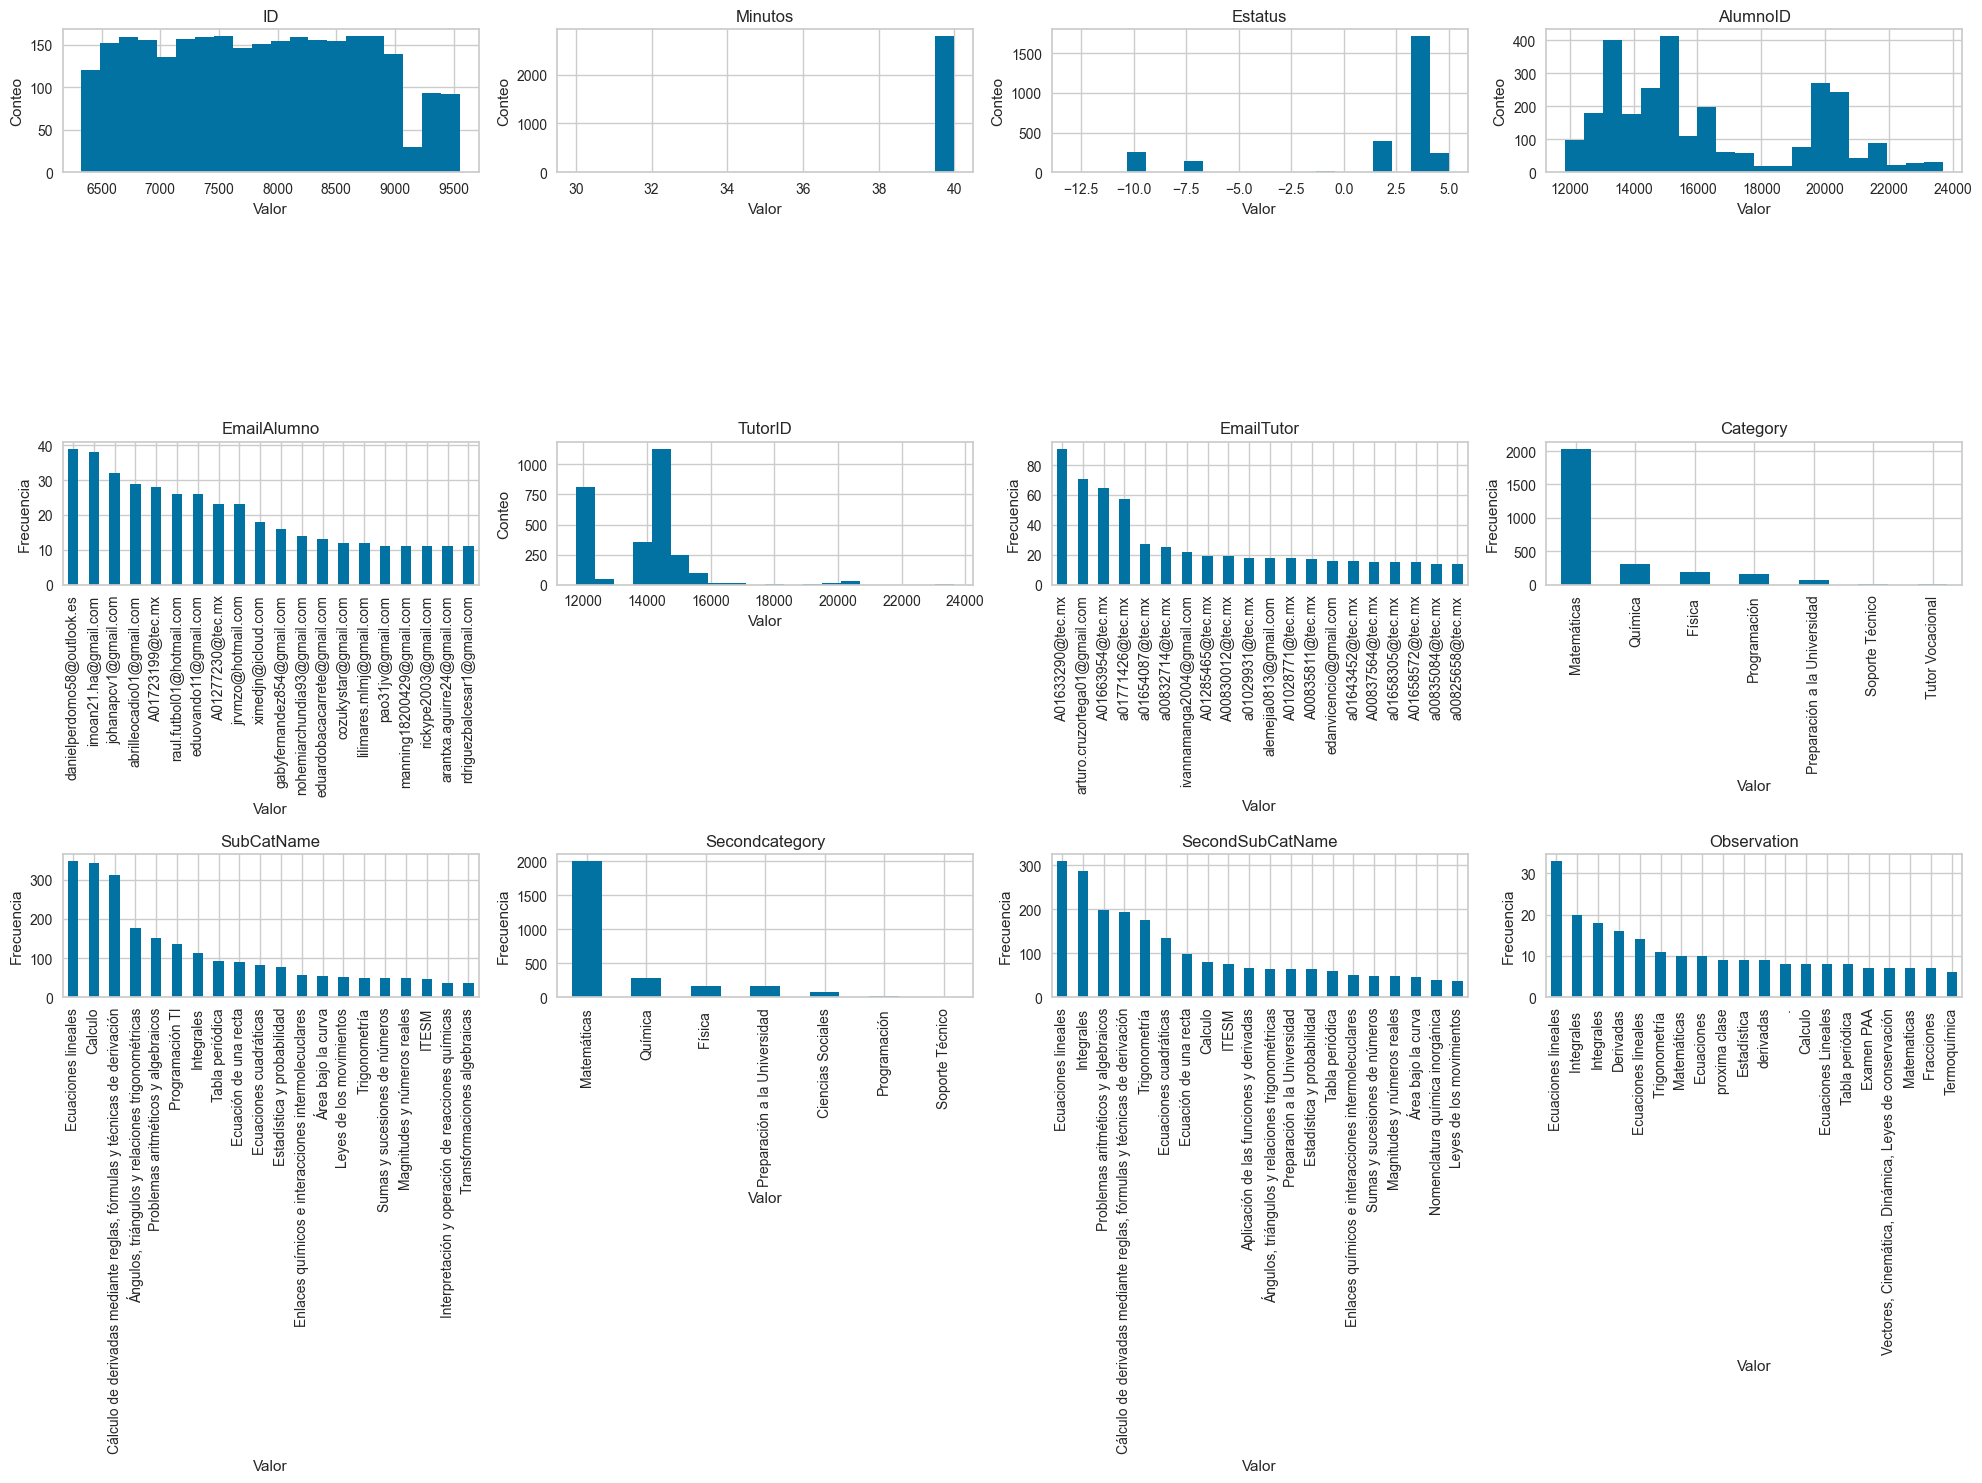

In [276]:
# Contar el número de columnas categóricas y numéricas (int64)
num_columnas_graficar = sum(misdatosNumTutorias.dtypes.apply(lambda x: x.name).isin(['object', 'category', 'int64']))

# Determinar el número de filas necesarias para los subgráficos
filas = (num_columnas_graficar + 3) // 4  # Redondear hacia arriba para asegurar que todas las columnas se incluyan

# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(filas, 4, figsize=(20, 5 * filas))
axs = axs.ravel()  # Convertir los ejes en un array 1D para facilitar su manejo

# Contador para los ejes
ax_idx = 0

# Iterar sobre todas las columnas del DataFrame
for columna in misdatosNumTutorias.columns:
    # Comprobar si la columna es categórica o numérica (int64)
    if misdatosNumTutorias[columna].dtype == 'object' or misdatosNumTutorias[columna].dtype.name in ['category', 'int64']:
        # Conteo de categorías y selección del top 20 (para categóricas) o histograma (para numéricas)
        if misdatosNumTutorias[columna].dtype == 'object' or misdatosNumTutorias[columna].dtype.name == 'category':
            conteo_categorias = misdatosNumTutorias[columna].value_counts().head(20)
            conteo_categorias.plot(kind='bar', ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Frecuencia')
        else:
            misdatosNumTutorias[columna].hist(bins=20, ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Conteo')

        axs[ax_idx].set_title(f'{columna}')
        axs[ax_idx].set_xlabel('Valor')

        # Incrementar el índice del eje
        ax_idx += 1

# Ocultar los ejes que no se usan (si los hay)
for i in range(ax_idx, len(axs)):
    axs[i].set_visible(False)

# Ajustar el layout
plt.tight_layout()
plt.show()

¿Hay correlación entre las variables dependientes e independientes?

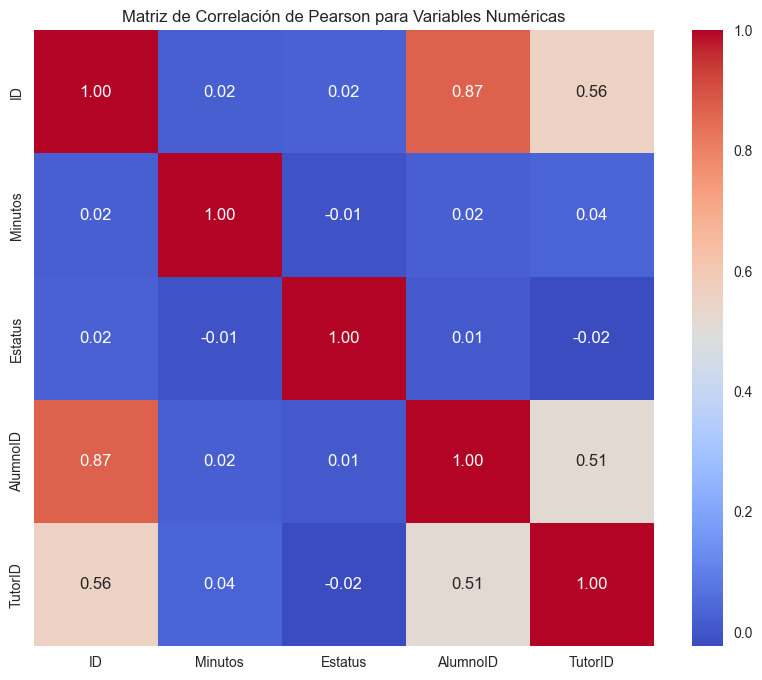

In [277]:
# Filtrar solo las columnas numéricas (int64)
columnas_numericas = misdatosNumTutorias.select_dtypes(include=['int64'])

# Calcular la matriz de correlación de Pearson
matriz_correlacion = columnas_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Pearson para Variables Numéricas")
plt.show()


¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

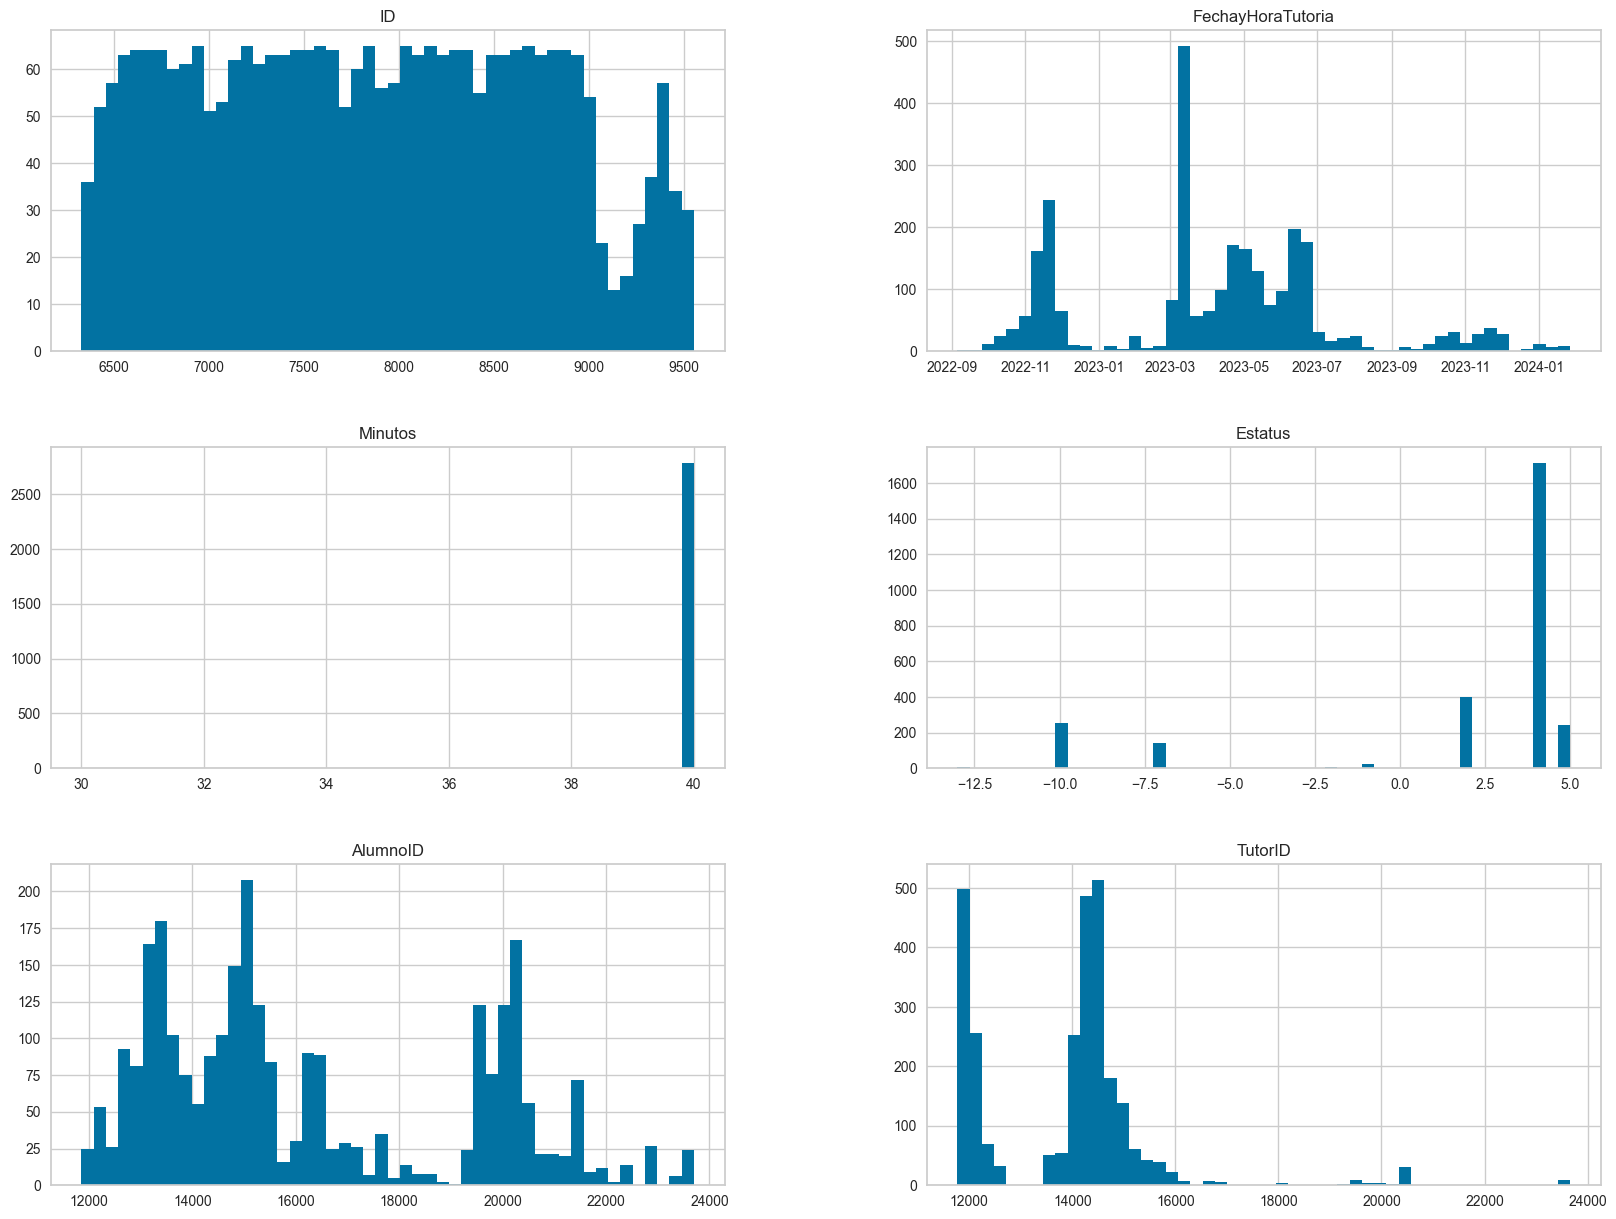

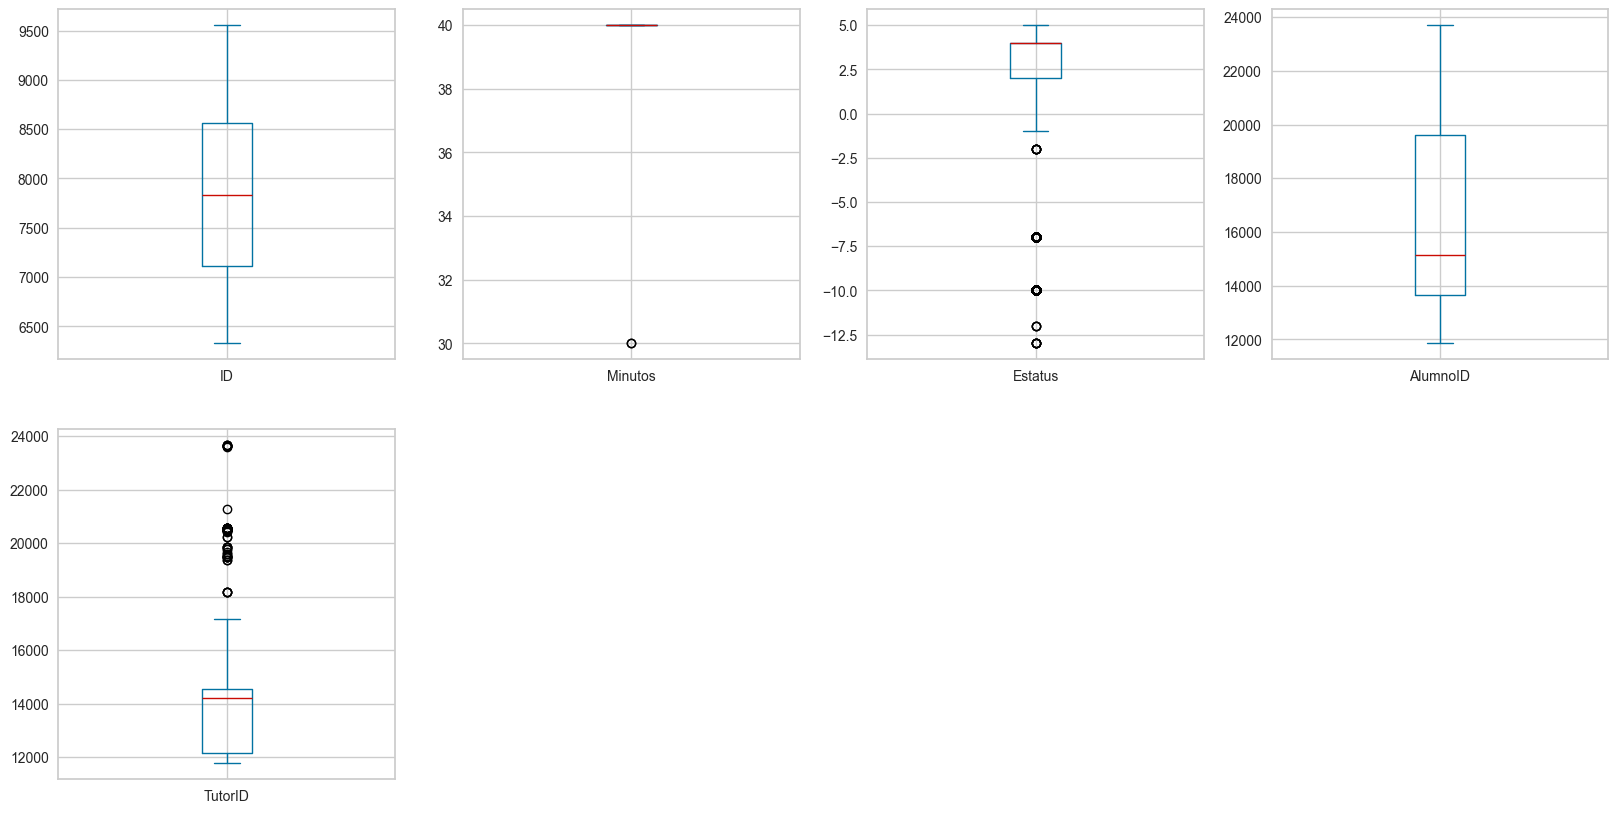

In [278]:
misdatosNumTutorias.hist(bins=50, figsize=(20,15))
plt.show()

# Gráficos de caja para identificar outliers y distribución
misdatosNumTutorias.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,10))
plt.show()





¿Cómo se distribuyen los datos en función de diferentes categorías?

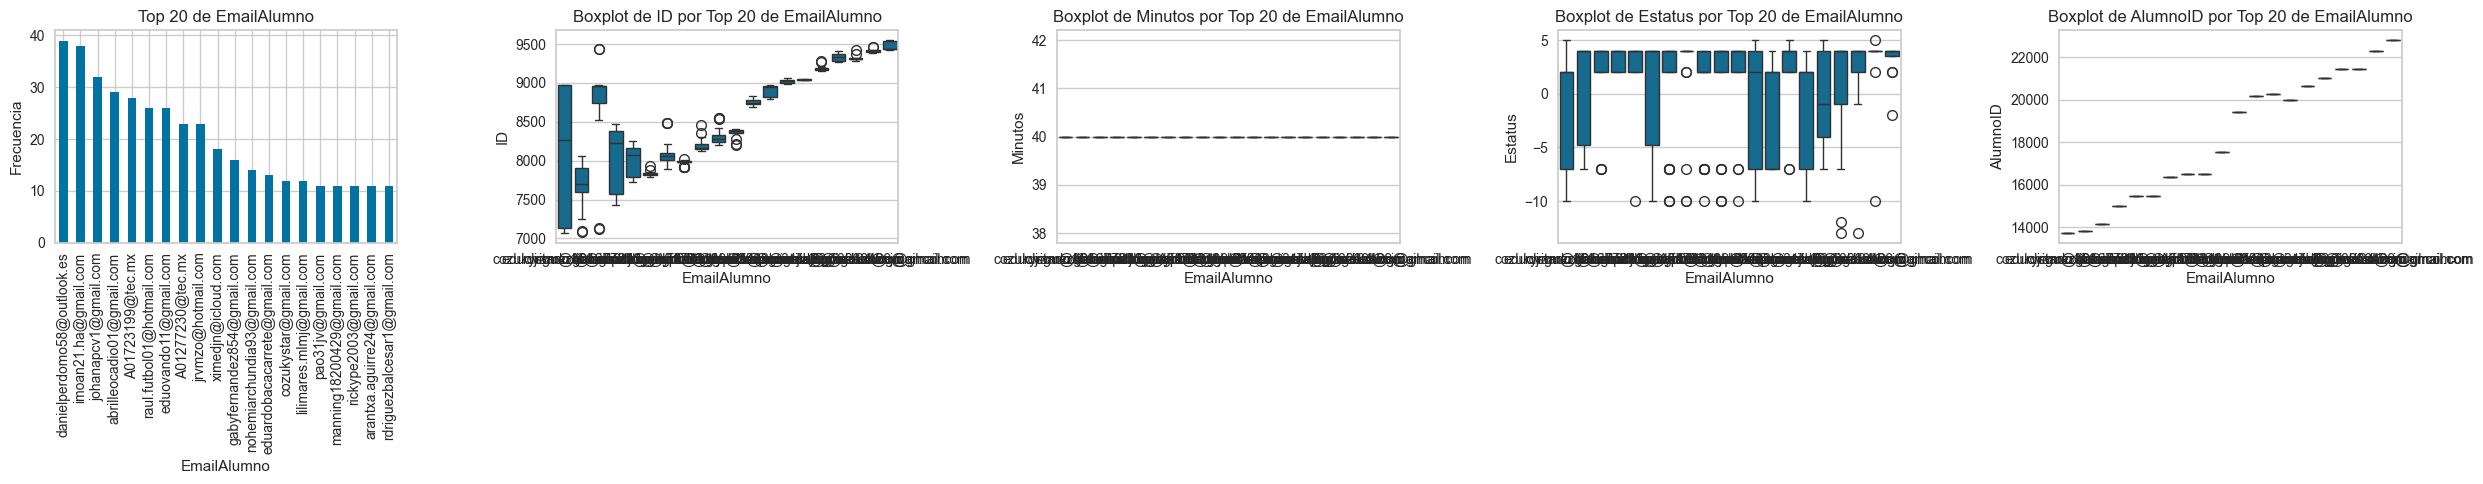

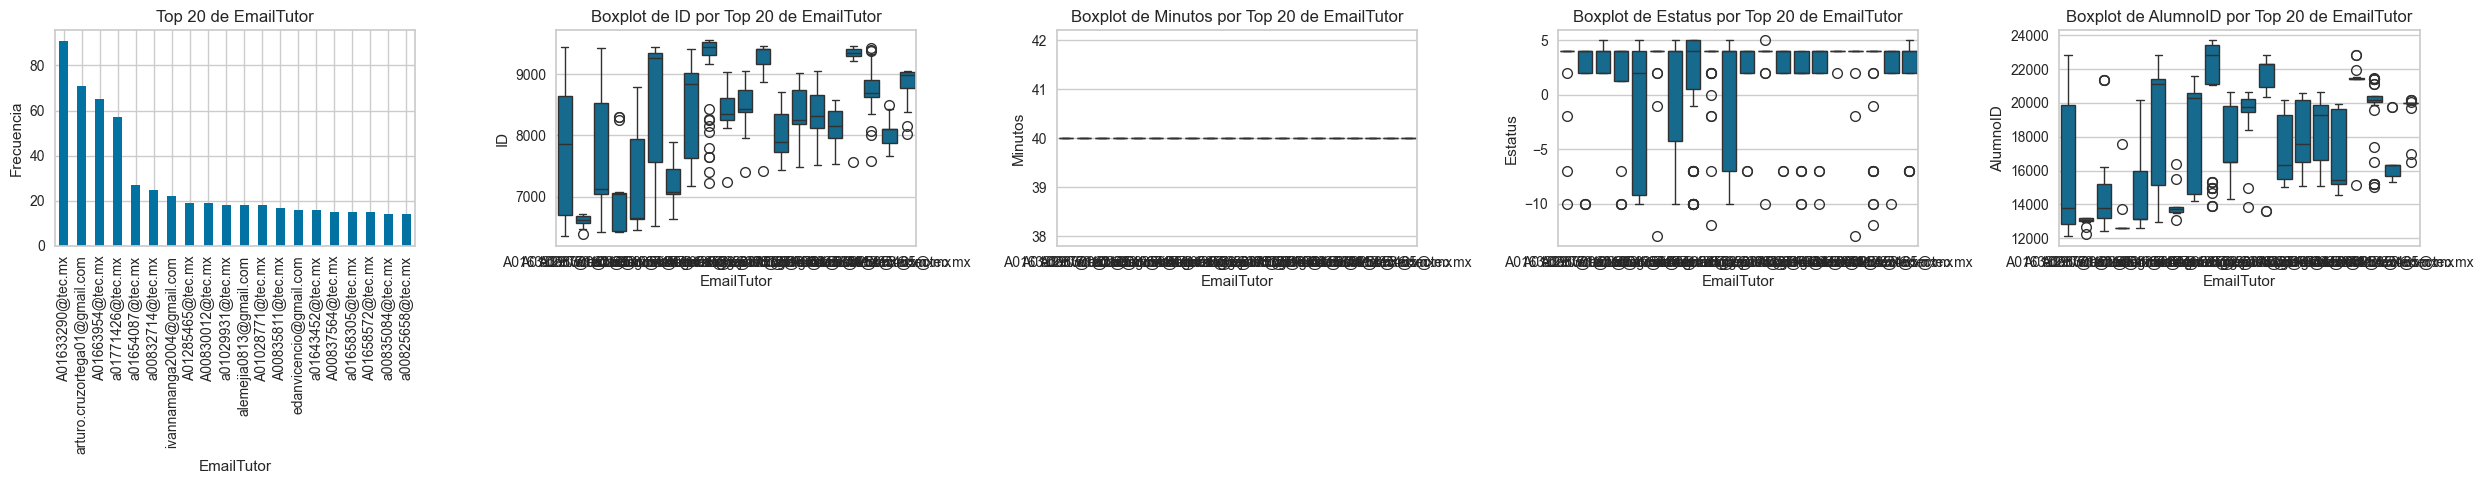

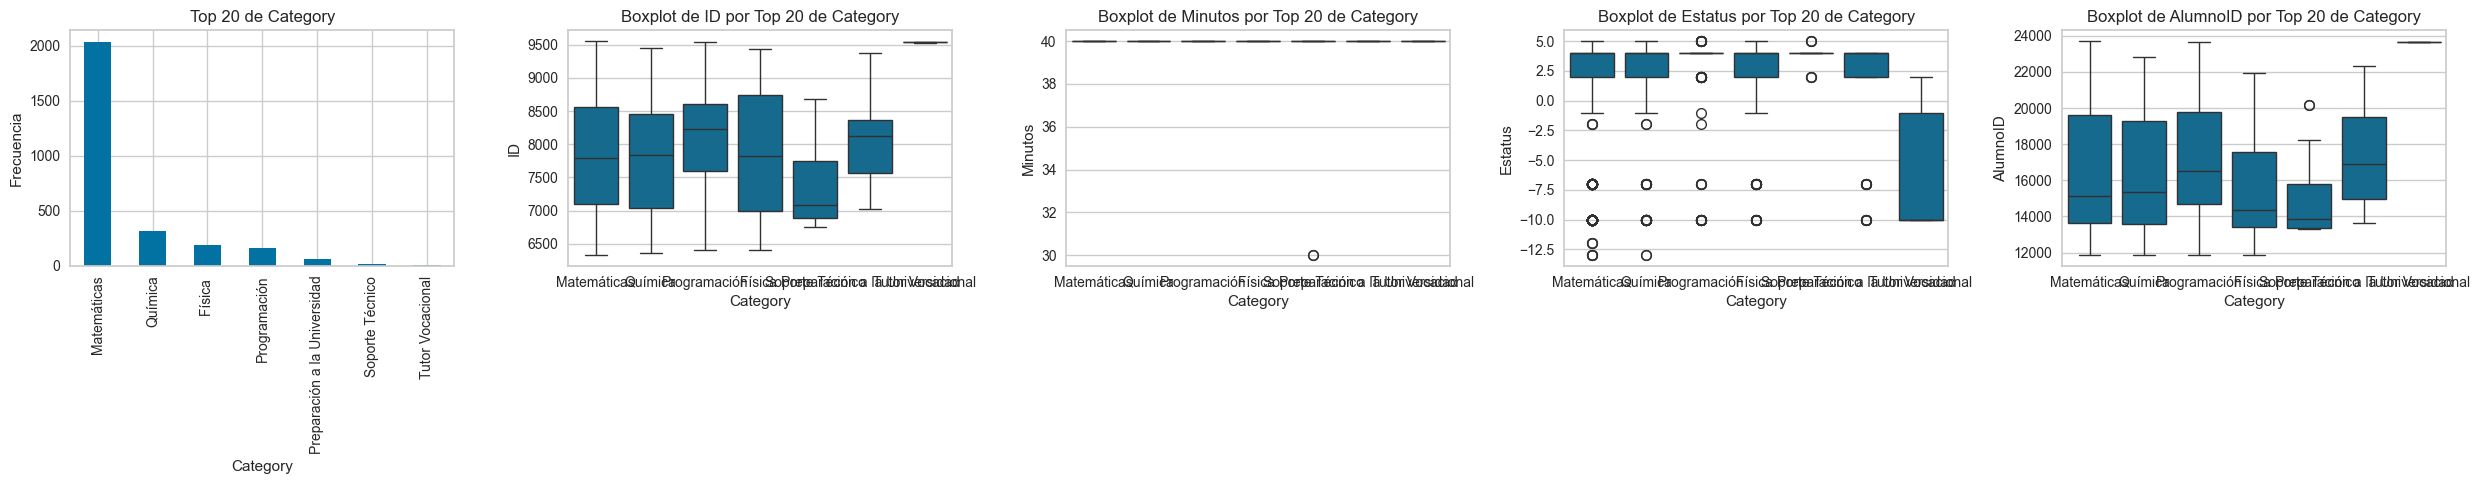

C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\3490881234.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


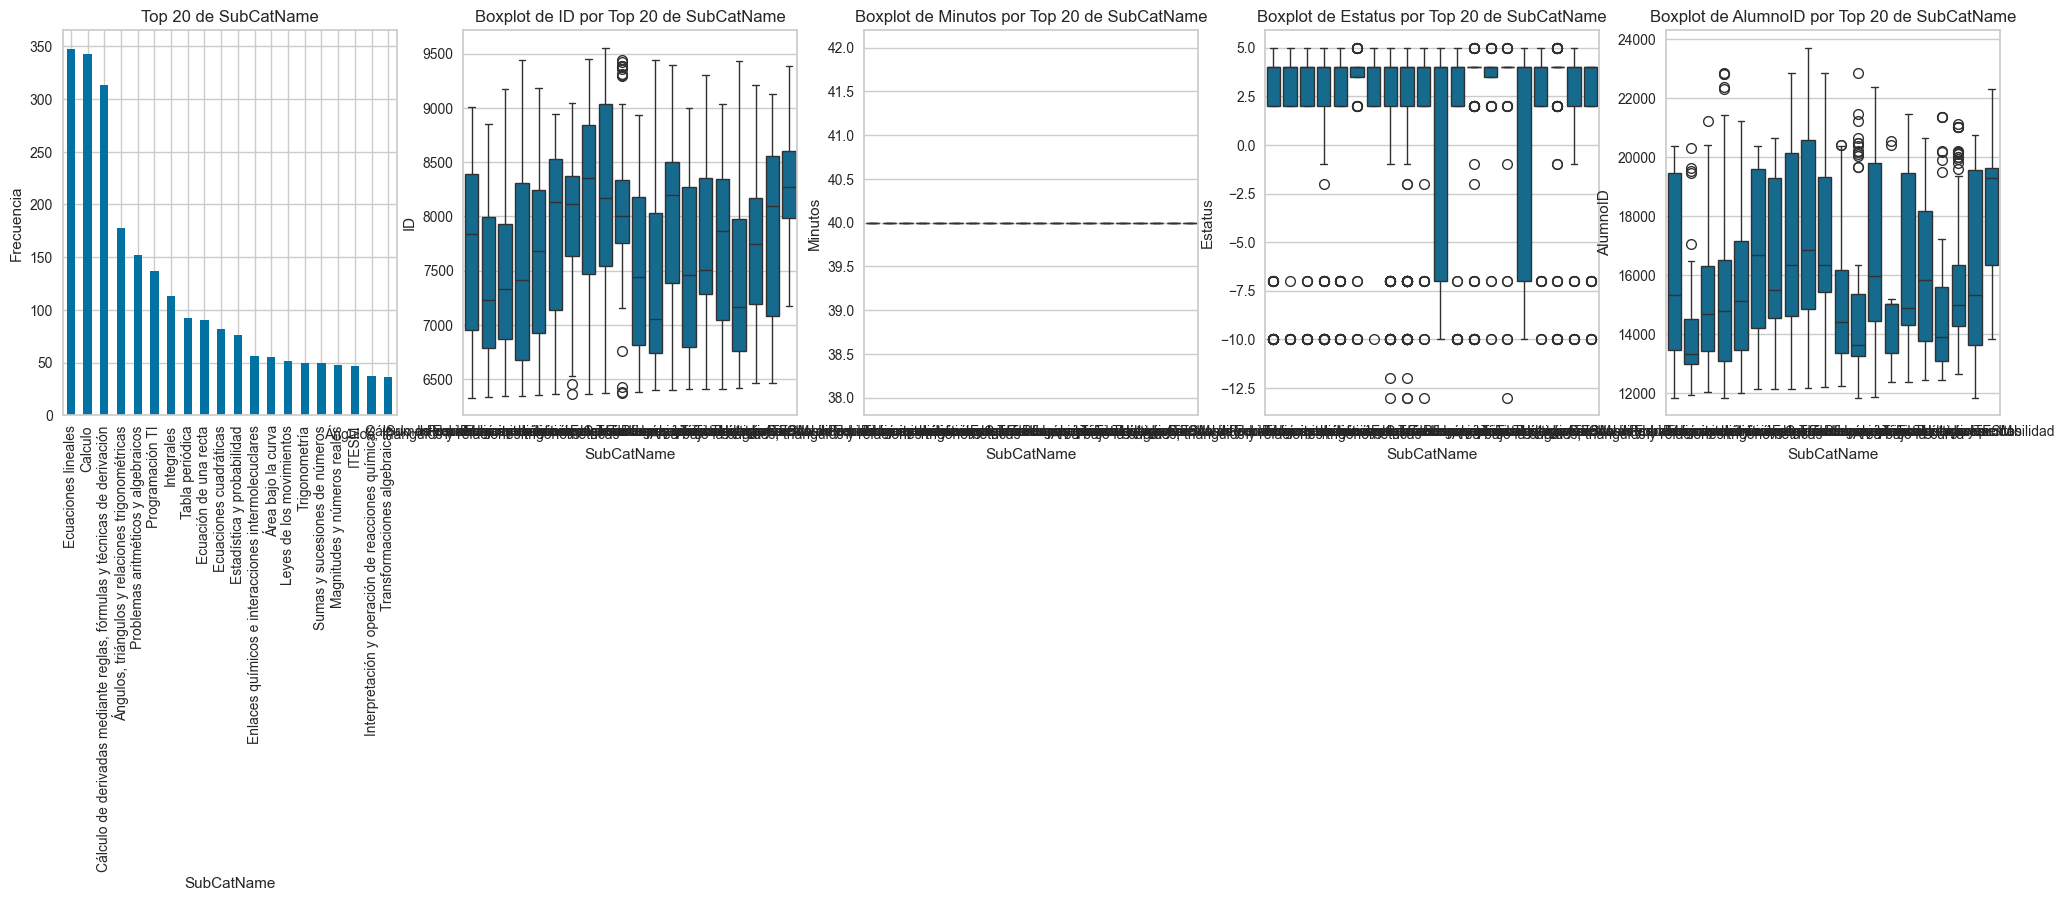

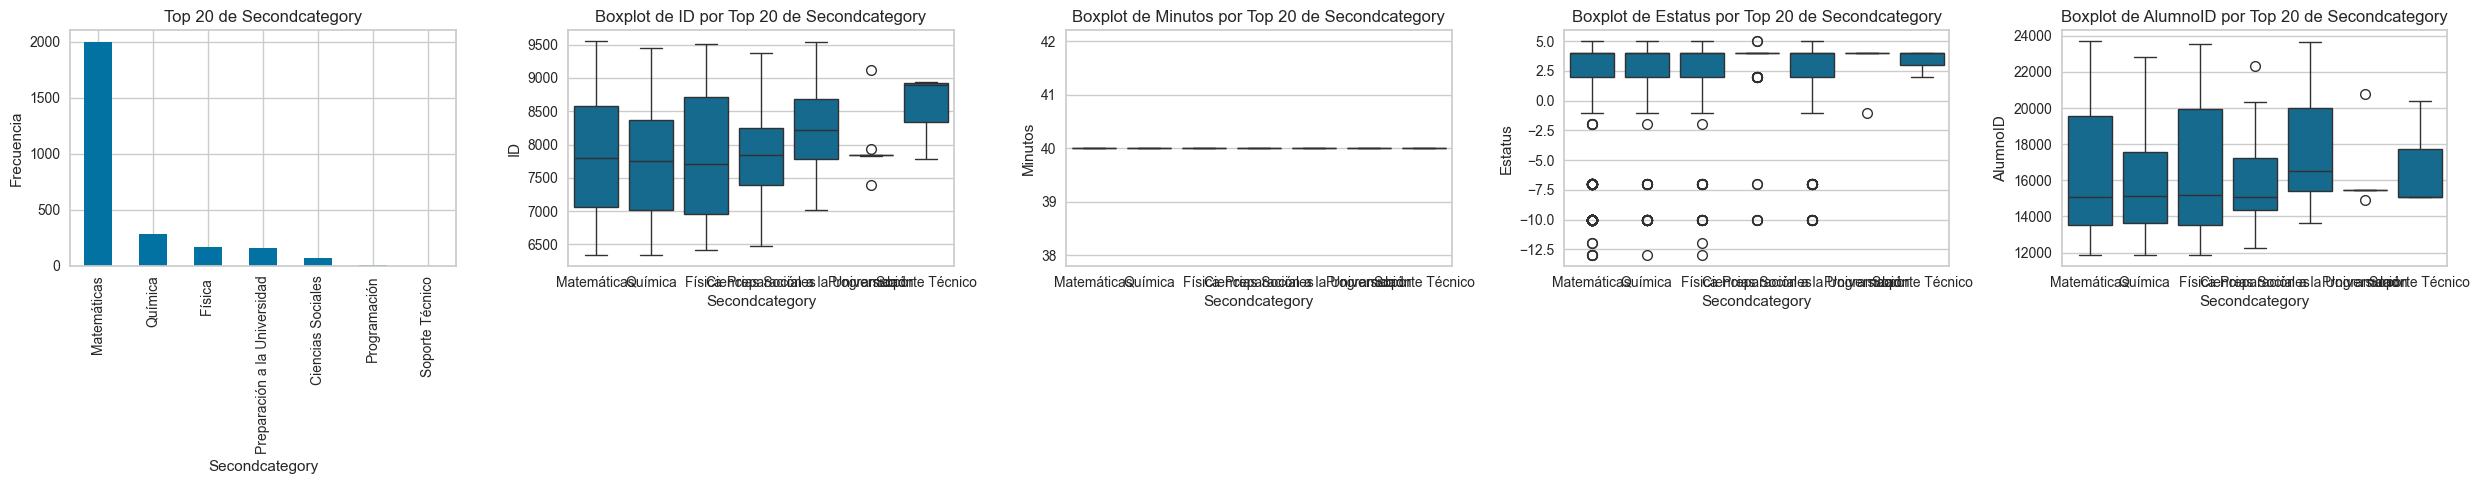

C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\3490881234.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


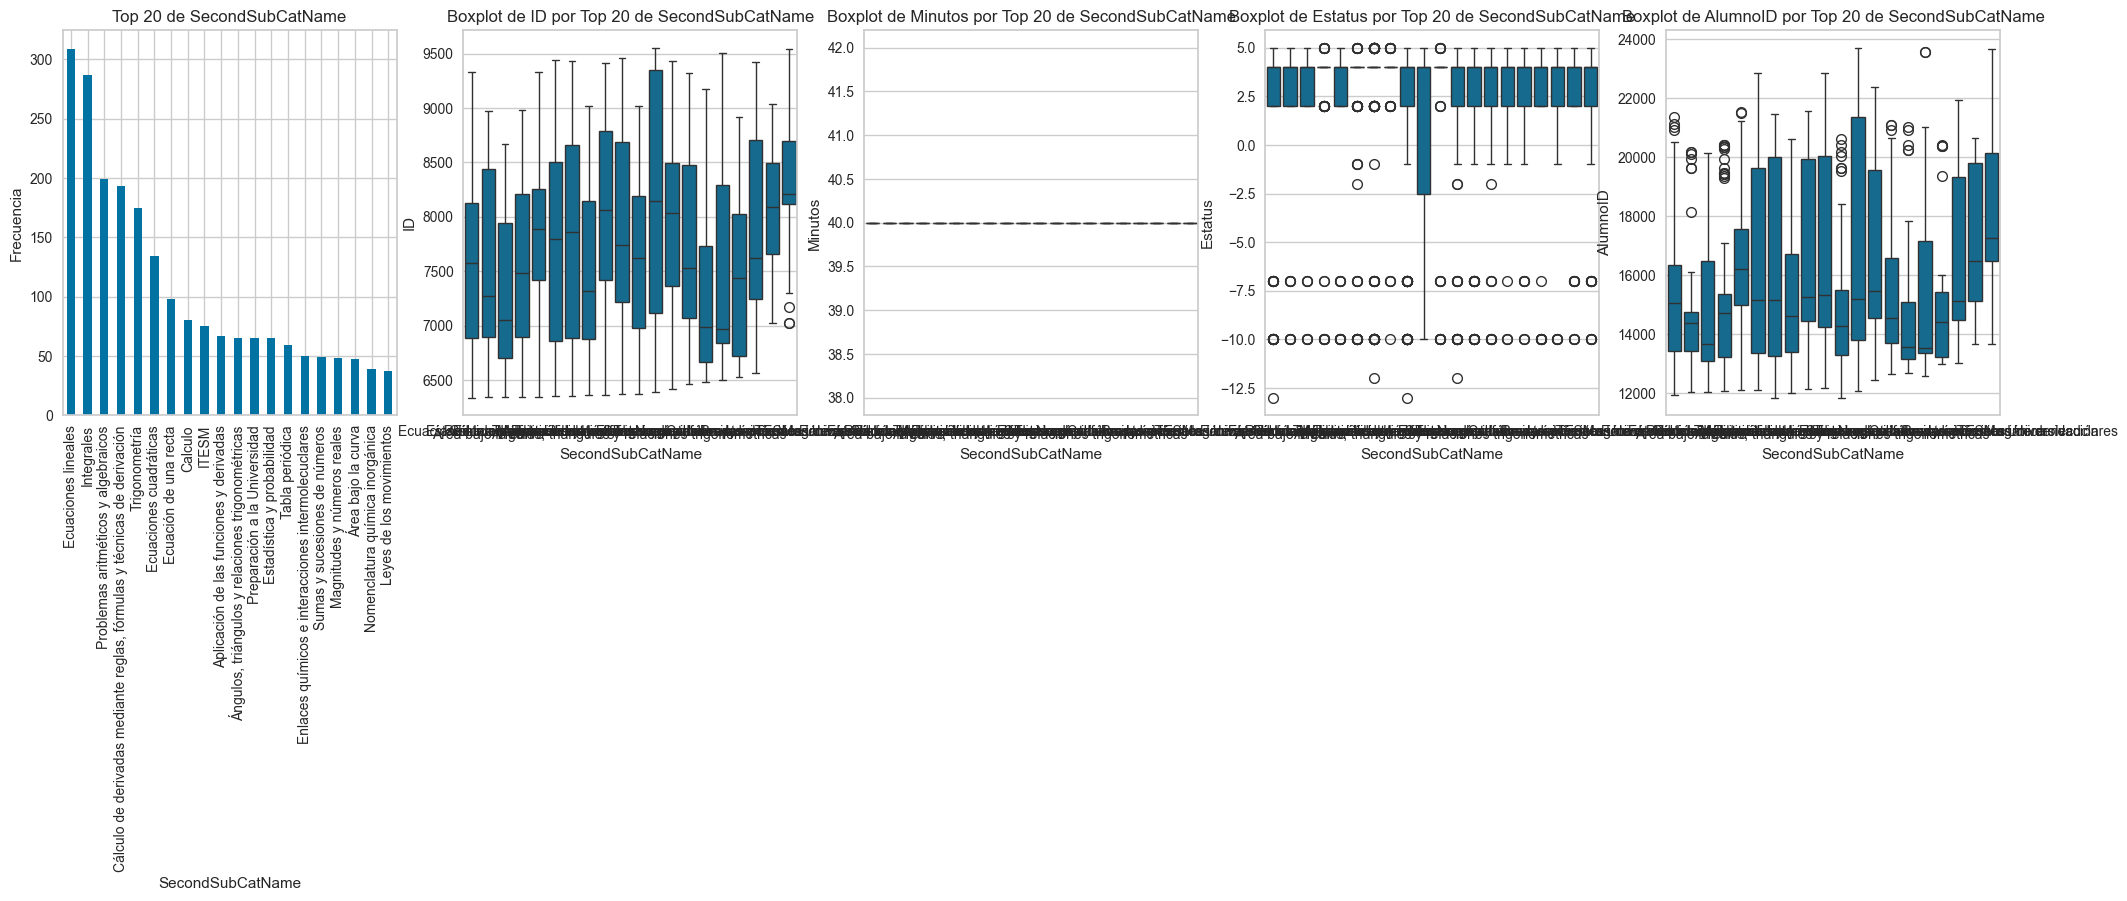

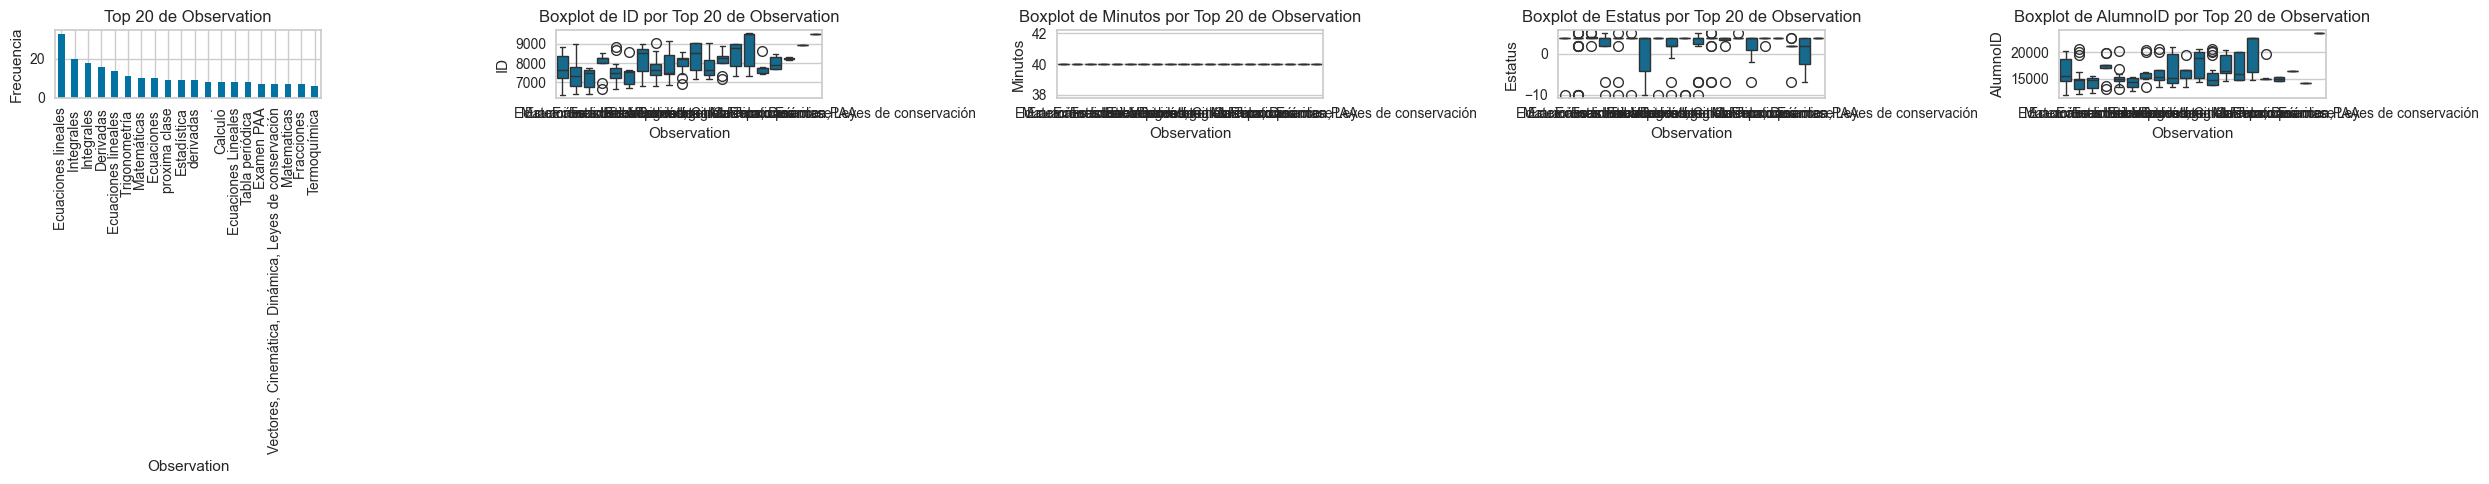

In [279]:
# Iterar sobre todas las columnas de tipo 'object' del DataFrame
for columna in misdatosNumTutorias.select_dtypes(include=['object']):
    # Seleccionar el top 20 de cada categoría
    top_20 = misdatosNumTutorias[columna].value_counts().head(20)

    # Crear una nueva figura para los subgráficos
    plt.figure(figsize=(25, 5))

    # Gráfico de barras para el top 20 de cada columna categórica
    plt.subplot(1, 5, 1)  # 1 fila, 5 columnas, posición 1
    top_20.plot(kind='bar')
    plt.title(f'Top 20 de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Para cada columna categórica, crear un gráfico de caja por categoría con todas las variables numéricas
    # Considerando solo las categorías en el top 20
    columnas_numericas = misdatosNumTutorias.select_dtypes(include=['number']).columns
    for idx, col_num in enumerate(columnas_numericas[:4]):  # Limitar a 4 variables numéricas
        # Filtrar los datos para incluir solo las categorías en el top 20
        datos_filtrados = misdatosNumTutorias[misdatosNumTutorias[columna].isin(top_20.index)]
        
        plt.subplot(1, 5, idx + 2)  # Posiciones 2 a 5
        sns.boxplot(x=columna, y=col_num, data=datos_filtrados)
        plt.title(f'Boxplot de {col_num} por Top 20 de {columna}')

    plt.tight_layout()
    plt.show()

¿Cuál es la cardinalidad de las variables categóricas?

In [280]:
# Seleccionar solo las columnas de tipo 'object'
columnas_object = misdatosNumTutorias.select_dtypes(include=['object'])

# Calcular la cardinalidad (número de valores únicos) para cada columna de tipo 'object'
cardinalidad = columnas_object.nunique()

# Mostrar la cardinalidad
print(cardinalidad)

EmailAlumno         1574
EmailTutor           731
Category               7
SubCatName            51
Secondcategory         7
SecondSubCatName      60
Observation         1790
dtype: int64


¿Existen patrones o agrupaciones (clusters) en los datos con características similares?

c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


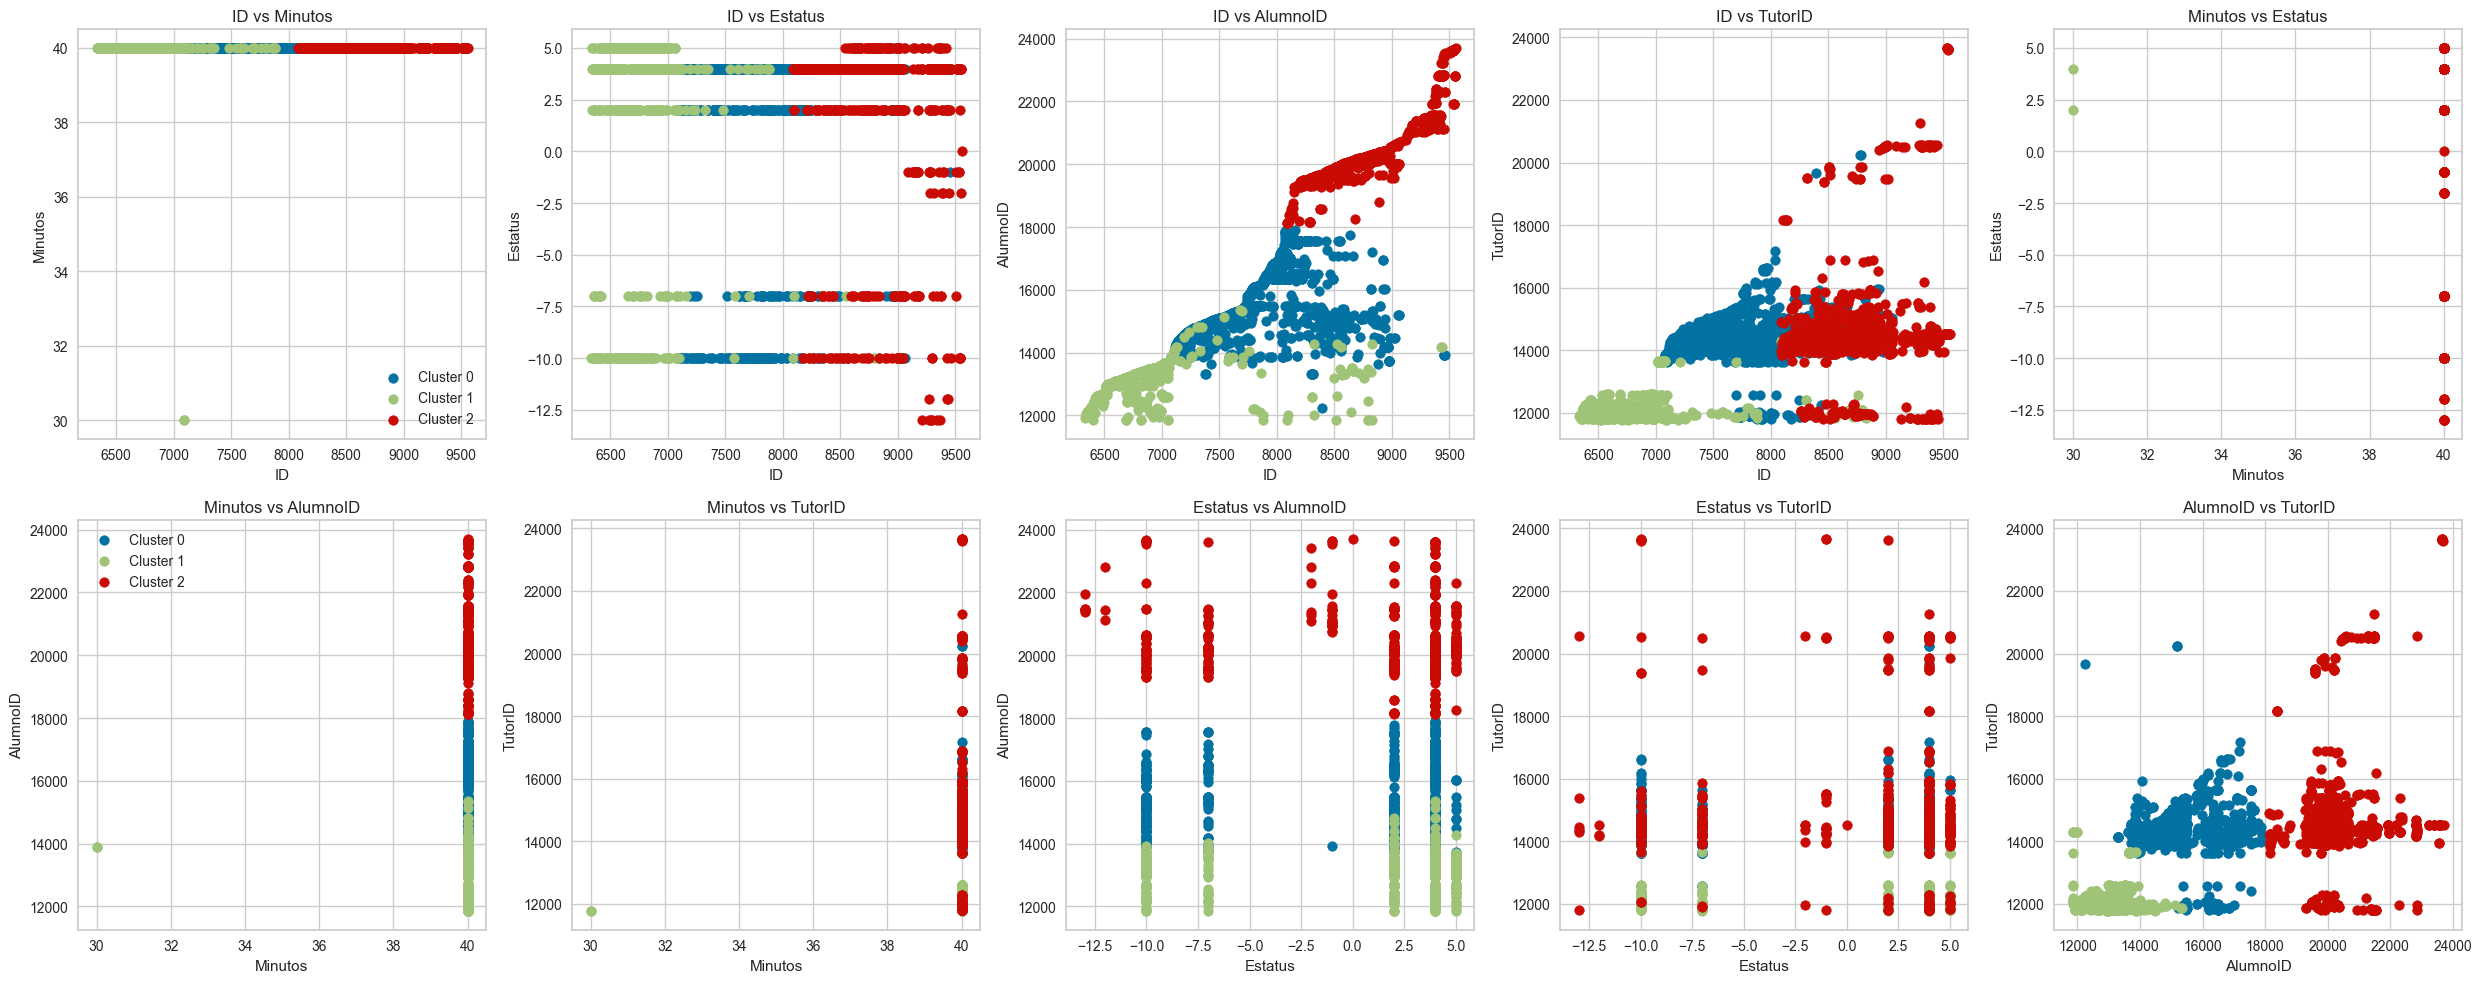

In [281]:
# Seleccionar columnas numéricas
columnas_numericas = misdatosNumTutorias.select_dtypes(include=['int64', 'float64']).columns

# Ejecutar K-Means
kmeans = KMeans(n_clusters=3)
misdatosNumTutorias['cluster'] = kmeans.fit_predict(misdatosNumTutorias[columnas_numericas])

# Combinaciones de todas las columnas numéricas
combinaciones = list(itertools.combinations(columnas_numericas, 2))

# Crear subplots
num_graficas = len(combinaciones)
num_filas = (num_graficas + 4) // 5  # Redondear hacia arriba
fig, axs = plt.subplots(num_filas, 5, figsize=(25, 5 * num_filas))
axs = axs.ravel()

for i, (col1, col2) in enumerate(combinaciones):
    for cluster in range(3):  # Asumiendo 3 clusters
        cluster_data = misdatosNumTutorias[misdatosNumTutorias['cluster'] == cluster]
        axs[i].scatter(cluster_data[col1], cluster_data[col2], label=f'Cluster {cluster}')
    
    axs[i].set_title(f'{col1} vs {col2}')
    axs[i].set_xlabel(col1)
    axs[i].set_ylabel(col2)
    if i % 5 == 0:  # Añadir leyenda solo en la primera gráfica de cada fila para evitar la congestión
        axs[i].legend()

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()

- ID vs Minutos y Minutos vs Estatus: Parece haber muy poca o ninguna variabilidad dentro de los clústeres en relación con la variable 'Minutos'. Esto sugiere que 'Minutos' no es un buen discriminador para la separación de los clústeres en este conjunto de datos.

- ID vs Estatus: Los clústeres parecen estar mejor definidos con respecto al 'Estatus', lo que sugiere que esta variable podría ser un buen discriminador para la separación de clústeres.

- ID vs AlumnoID y Estatus vs AlumnoID: Se observa una clara separación de clústeres con la variable 'AlumnoID', lo que indica que esta variable contribuye significativamente a la definición de los clústeres.

- ID vs TutorID, Minutos vs TutorID y Estatus vs TutorID: Estos gráficos muestran cierta superposición entre los clústeres, pero también cierta tendencia de separación, lo que sugiere que 'TutorID' puede ser moderadamente útil para la separación de clústeres.

- AlumnoID vs TutorID: Aquí también vemos una separación de clústeres, especialmente entre el clúster 0 y los otros dos. Esto podría significar que la combinación de 'AlumnoID' y 'TutorID' tiene un patrón que el algoritmo K-Means pudo identificar.

¿Hay desequilibrio en las clases de la variable objetivo?

C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\2136277636.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


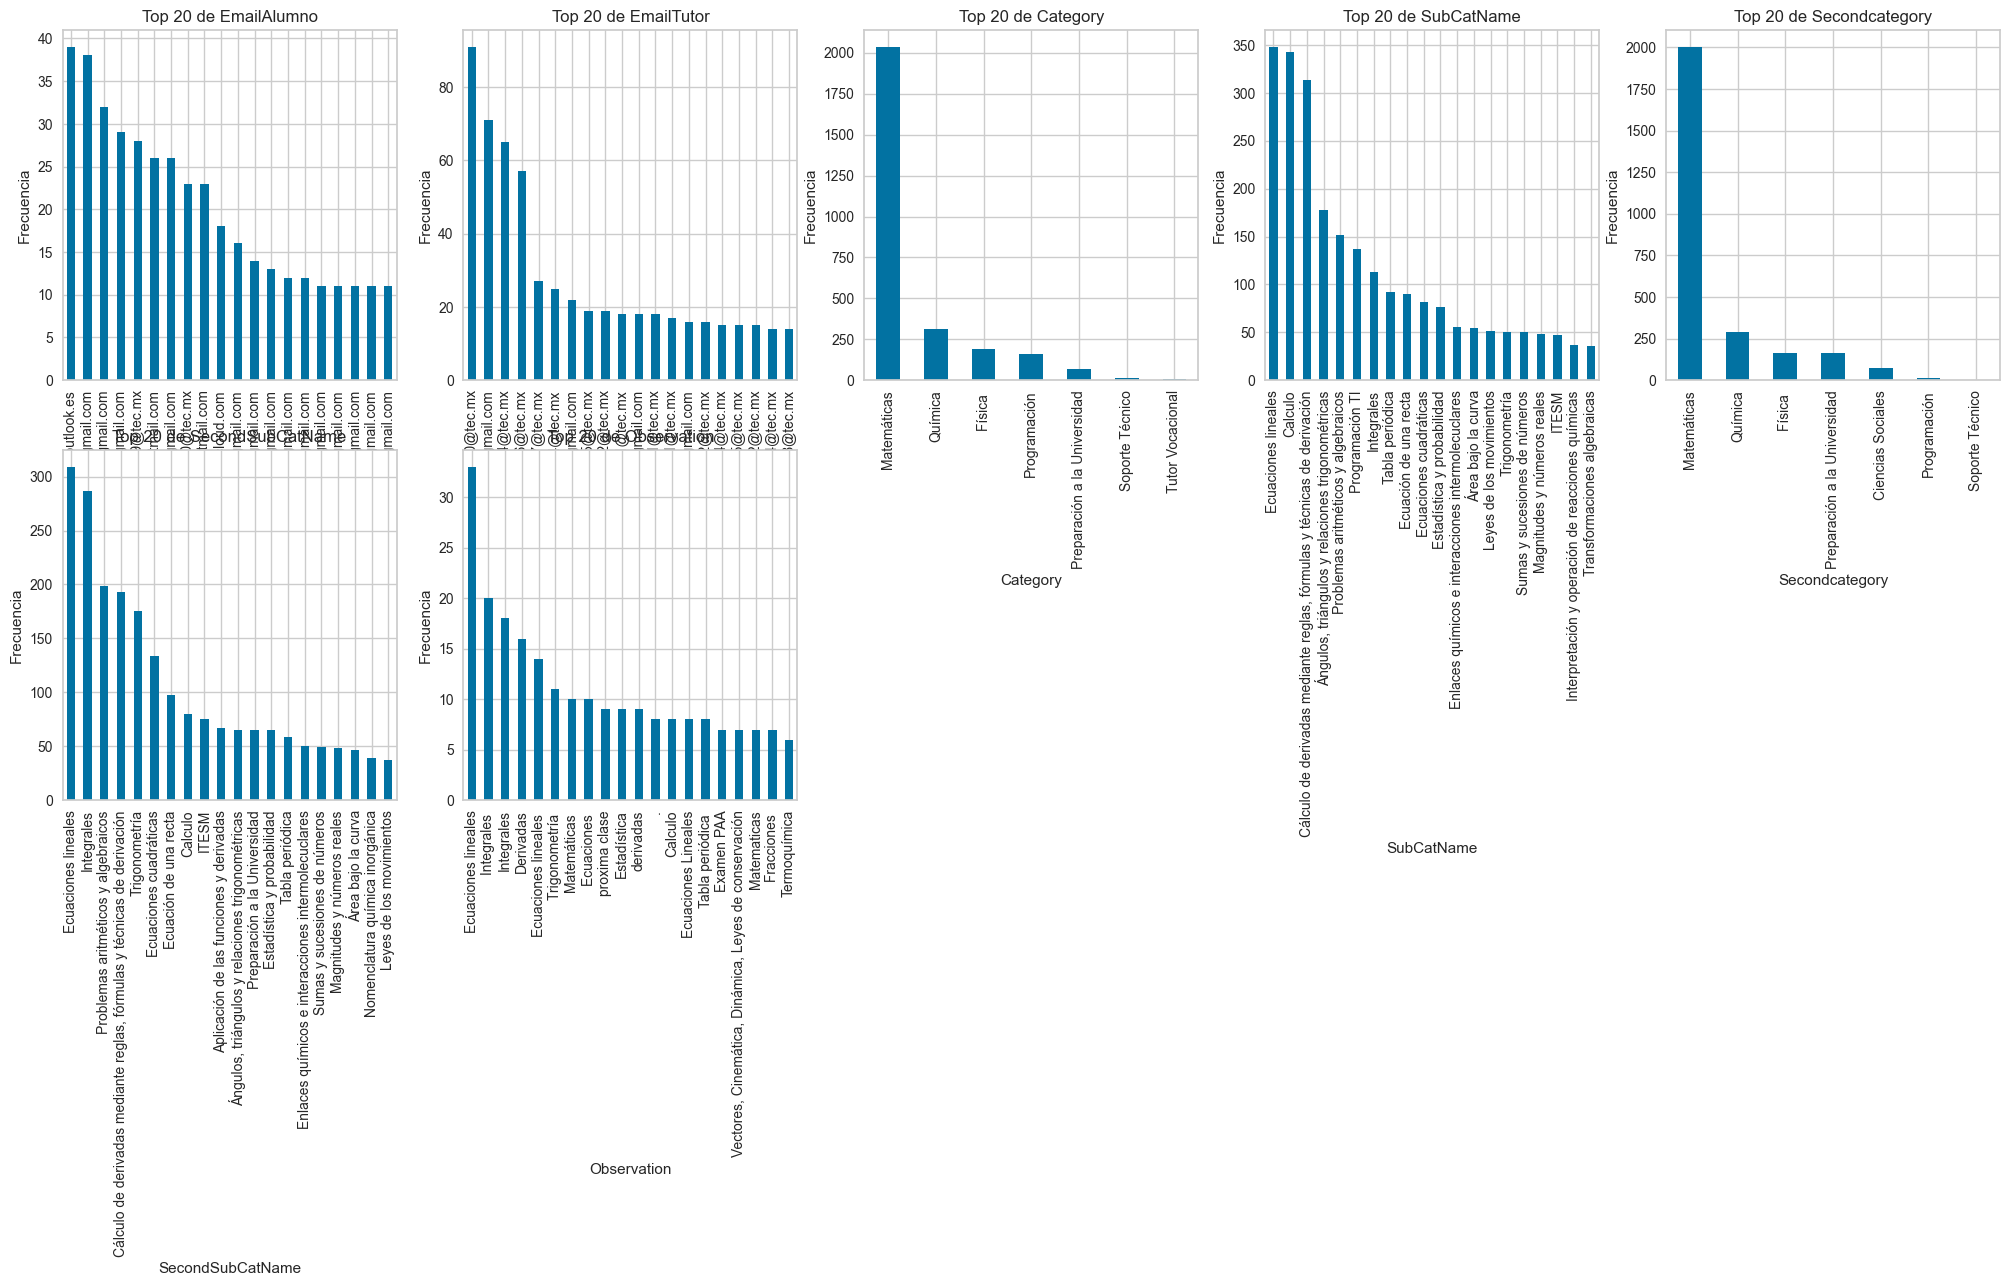

In [282]:
# Identificar columnas categóricas
columnas_categoricas = misdatosNumTutorias.select_dtypes(include=['object', 'category']).columns

# Crear subplots
num_columnas = len(columnas_categoricas)
num_filas = (num_columnas + 4) // 5  # Redondear hacia arriba para asegurar que todas las columnas se incluyan
fig, axs = plt.subplots(num_filas, 5, figsize=(25, 5 * num_filas))
axs = axs.ravel()

# Iterar sobre las columnas categóricas y crear gráficos de barras para el top 20
for i, columna in enumerate(columnas_categoricas):
    top_20 = misdatosNumTutorias[columna].value_counts().head(20)
    top_20.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Top 20 de {columna}')
    axs[i].set_xlabel(columna)
    axs[i].set_ylabel('Frecuencia')

# Ocultar los ejes que no se usan (si los hay)
for i in range(len(columnas_categoricas), len(axs)):
    axs[i].set_visible(False)

# Ajustar el layout y mostrar gráfico
plt.tight_layout()
plt.show()


# Tematicas brindadas

In [283]:
misdatosTematicasbrindadas = pd.read_excel("Temáticas brindadas por tutor 23JAN (1).xlsx")
misdatosTematicasbrindadas.describe()

OID     UserType
count   1294.000000  1294.000000
mean   14588.673107     1.143740
std     2226.410474     0.703139
min    11763.000000     1.000000
25%    12598.250000     1.000000
50%    14420.500000     1.000000
75%    15330.750000     1.000000
max    23676.000000     6.000000

In [284]:
misdatosTematicasbrindadas

OID                          Email           Name             Gender  \
0     11766           edgar.luna@kavak.com          Edgar             Hombre   
1     11776               vascencio@tec.mx            Vic                NaN   
2     11778  marcovillalobos92@hotmail.com  Marco Antonio                  H   
3     11784           lab.crearh@gmail.com         Carlos                NaN   
4     11786           frantostav@gmail.com     Francisco                 NaN   
...     ...                            ...            ...                ...   
1289  14335               A01369561@tec.mx     José Pablo             Hombre   
1290  23638         vanillajs293@gmail.com     javascript             Hombre   
1291  20672                j.zavala@tec.mx     Jacqueline  Prefiero no decir   
1292  14356               A00834601@tec.mx        Corina               Mujer   
1293  15248               a01662781@tec.mx          Jorge             Hombre   

                Campus         Category  \
0            Monterrey              NaN   
1                  NaN              NaN   
2            Monterrey              NaN   
3                  NaN              NaN   
4                  NaN              NaN   
...                ...              ...   
1289          Santa Fe      Matemáticas   
1290          Irapuato  Soporte Técnico   
1291  Estado de México     Programación   
1292         Monterrey      Matemáticas   
1293  Ciudad de México      Matemáticas   

                                            subcategory  UserType  \
0                                                   NaN         2   
1                                                   NaN         1   
2                                                   NaN         2   
3                                                   NaN         1   
4                                                   NaN         1   
...                                                 ...       ...   
1289  Cálculo de derivadas mediante reglas, fórmulas...         1   
1290                                           SoyTutor         6   
1291                                             Python         1   
1292                                         Integrales         1   
1293                         Estadística y probabilidad         1   

         SecondCategory  SecondSubcategory  
0                   NaN                NaN  
1                   NaN                NaN  
2                   NaN                NaN  
3                   NaN                NaN  
4                   NaN                NaN  
...                 ...                ...  
1289  Ciencias Sociales  Ciencias Sociales  
1290       Programación         JavaScript  
1291       Programación              C/C++  
1292       Programación              C/C++  
1293       Programación                  R  

[1294 rows x 10 columns]

In [285]:
print(misdatosTematicasbrindadas.dtypes)

print(misdatosTematicasbrindadas.nunique())

OID                   int64
Email                object
Name                 object
Gender               object
Campus               object
Category             object
subcategory          object
UserType              int64
SecondCategory       object
SecondSubcategory    object
dtype: object
OID                  1294
Email                1292
Name                  808
Gender                  5
Campus                 26
Category                7
subcategory            54
UserType                3
SecondCategory          7
SecondSubcategory      61
dtype: int64


In [286]:
# Contar NaN y 0
nan_count = misdatosTematicasbrindadas.isna().sum()
zero_count = misdatosTematicasbrindadas.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 OID                    0
Email                  0
Name                   0
Gender               246
Campus               242
Category             261
subcategory          261
UserType               0
SecondCategory       323
SecondSubcategory    323
dtype: int64

Conteo de 0 por columna:
 OID                  0
Email                0
Name                 0
Gender               0
Campus               0
Category             0
subcategory          0
UserType             0
SecondCategory       0
SecondSubcategory    0
dtype: int64

Total de NaN en el DataFrame: 1656
Total de 0 en el DataFrame: 0


C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\1068931356.py:37: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


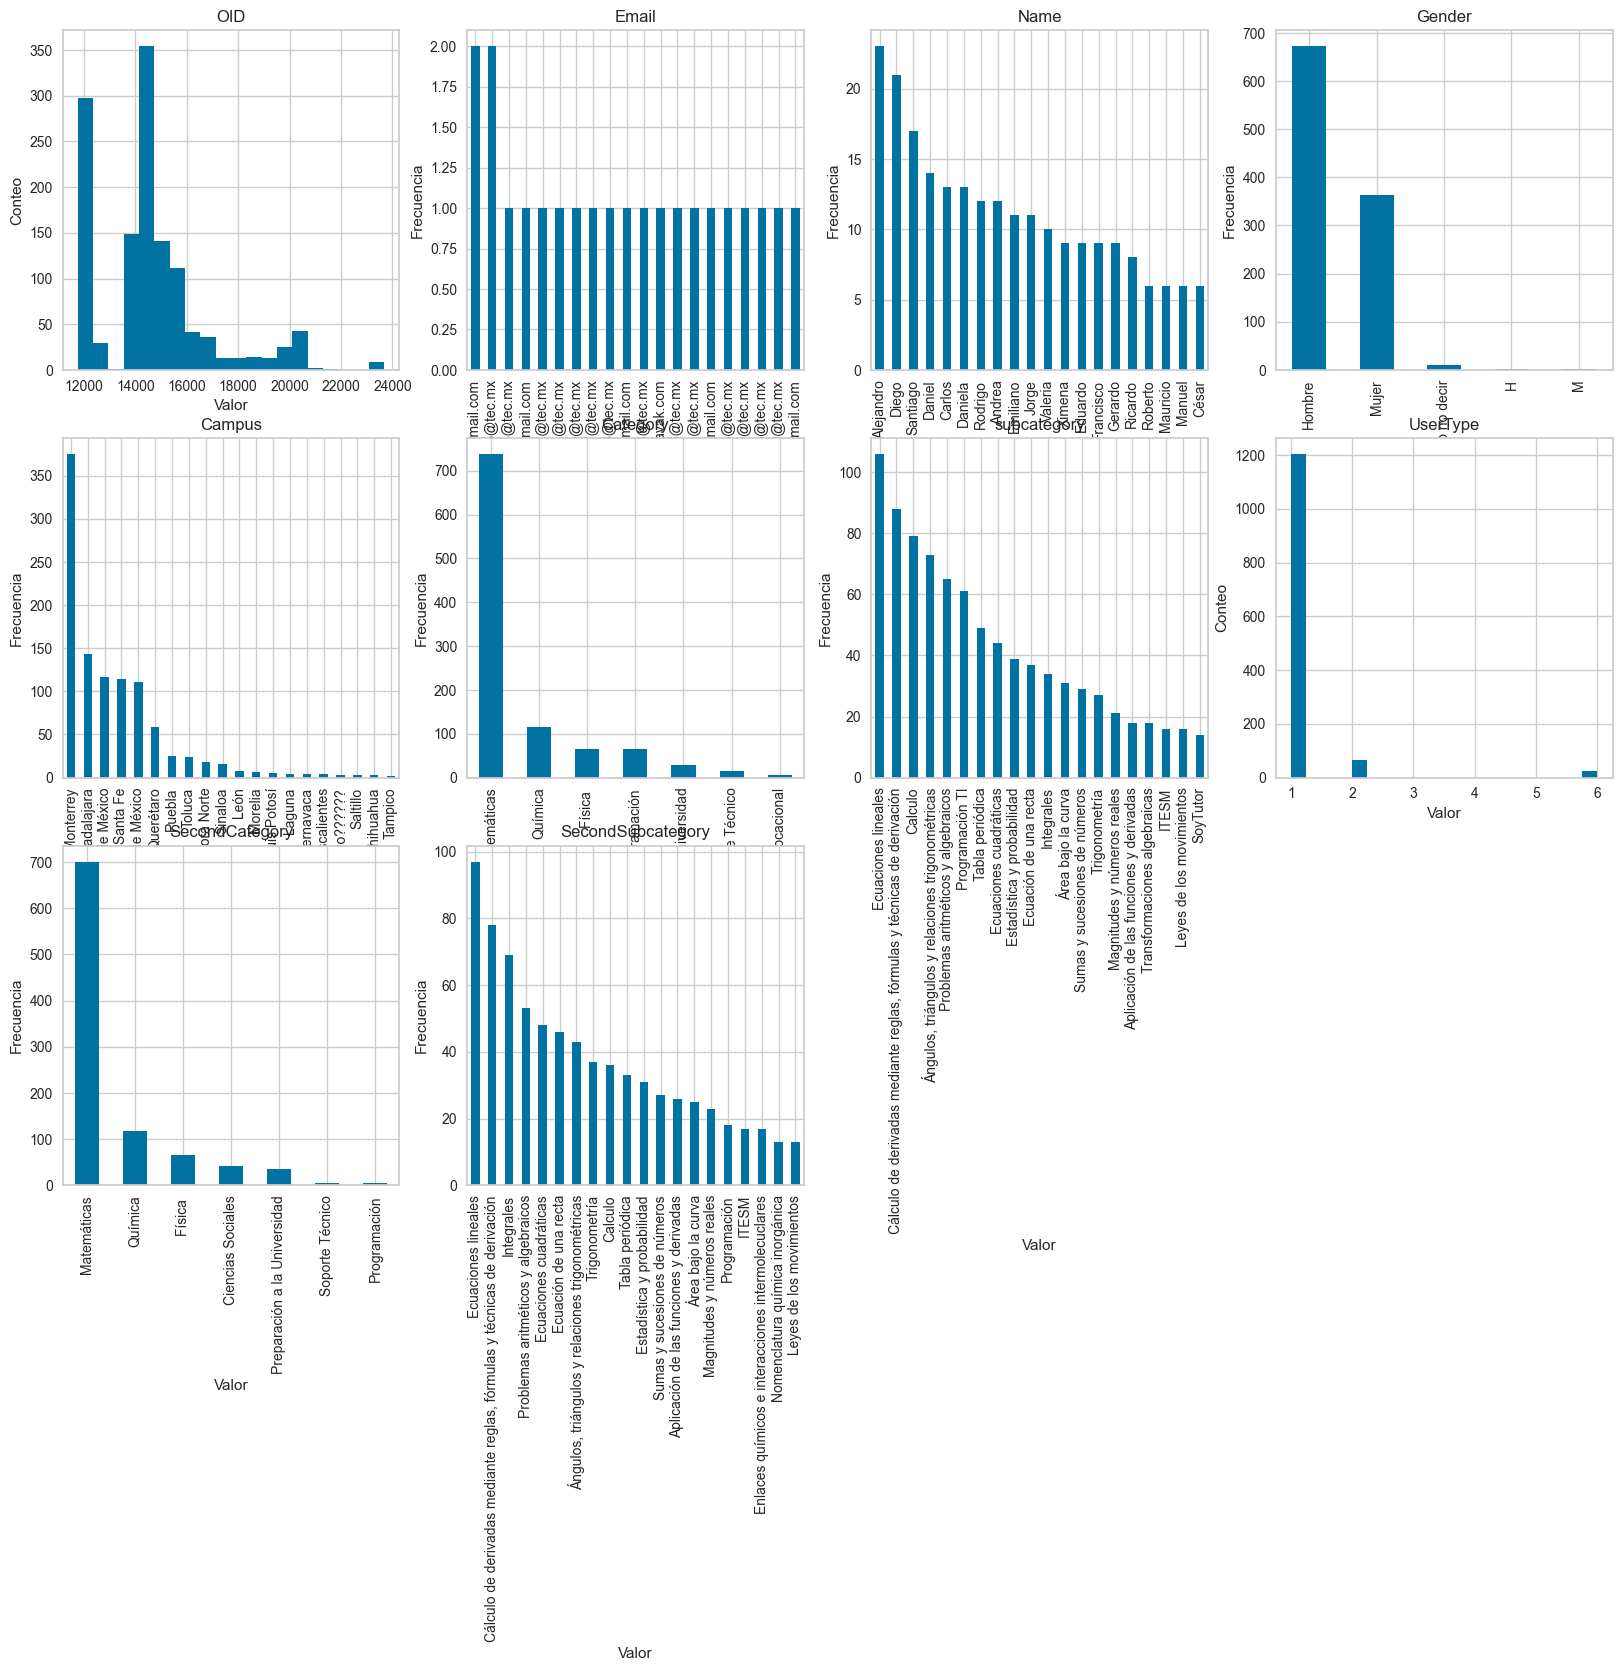

In [287]:
# Contar el número de columnas categóricas y numéricas (int64)
num_columnas_graficar = sum(misdatosTematicasbrindadas.dtypes.apply(lambda x: x.name).isin(['object', 'category', 'int64']))

# Determinar el número de filas necesarias para los subgráficos
filas = (num_columnas_graficar + 3) // 4  # Redondear hacia arriba para asegurar que todas las columnas se incluyan

# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(filas, 4, figsize=(20, 5 * filas))
axs = axs.ravel()  # Convertir los ejes en un array 1D para facilitar su manejo

# Contador para los ejes
ax_idx = 0

# Iterar sobre todas las columnas del DataFrame
for columna in misdatosTematicasbrindadas.columns:
    # Comprobar si la columna es categórica o numérica (int64)
    if misdatosTematicasbrindadas[columna].dtype == 'object' or misdatosTematicasbrindadas[columna].dtype.name in ['category', 'int64']:
        # Conteo de categorías y selección del top 20 (para categóricas) o histograma (para numéricas)
        if misdatosTematicasbrindadas[columna].dtype == 'object' or misdatosTematicasbrindadas[columna].dtype.name == 'category':
            conteo_categorias = misdatosTematicasbrindadas[columna].value_counts().head(20)
            conteo_categorias.plot(kind='bar', ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Frecuencia')
        else:
            misdatosTematicasbrindadas[columna].hist(bins=20, ax=axs[ax_idx])
            axs[ax_idx].set_ylabel('Conteo')

        axs[ax_idx].set_title(f'{columna}')
        axs[ax_idx].set_xlabel('Valor')

        # Incrementar el índice del eje
        ax_idx += 1

# Ocultar los ejes que no se usan (si los hay)
for i in range(ax_idx, len(axs)):
    axs[i].set_visible(False)

plt.tight_layout()
plt.show()

-  ¿Hay correlación entre las variables dependientes e independientes?

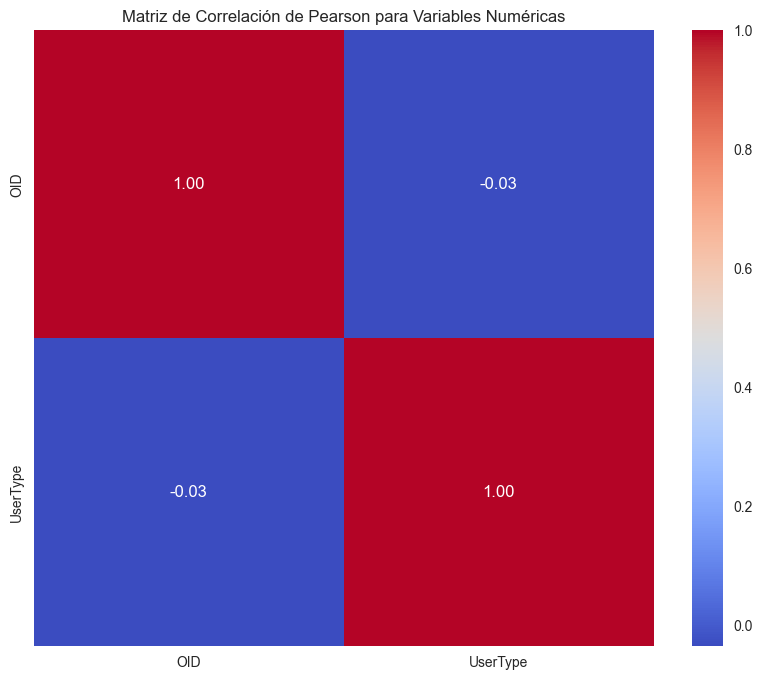

In [288]:
# Filtrar solo las columnas numéricas (int64)
columnas_numericas = misdatosTematicasbrindadas.select_dtypes(include=['int64'])

# Calcular la matriz de correlación de Pearson
matriz_correlacion = columnas_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación de Pearson para Variables Numéricas")
plt.show()

¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

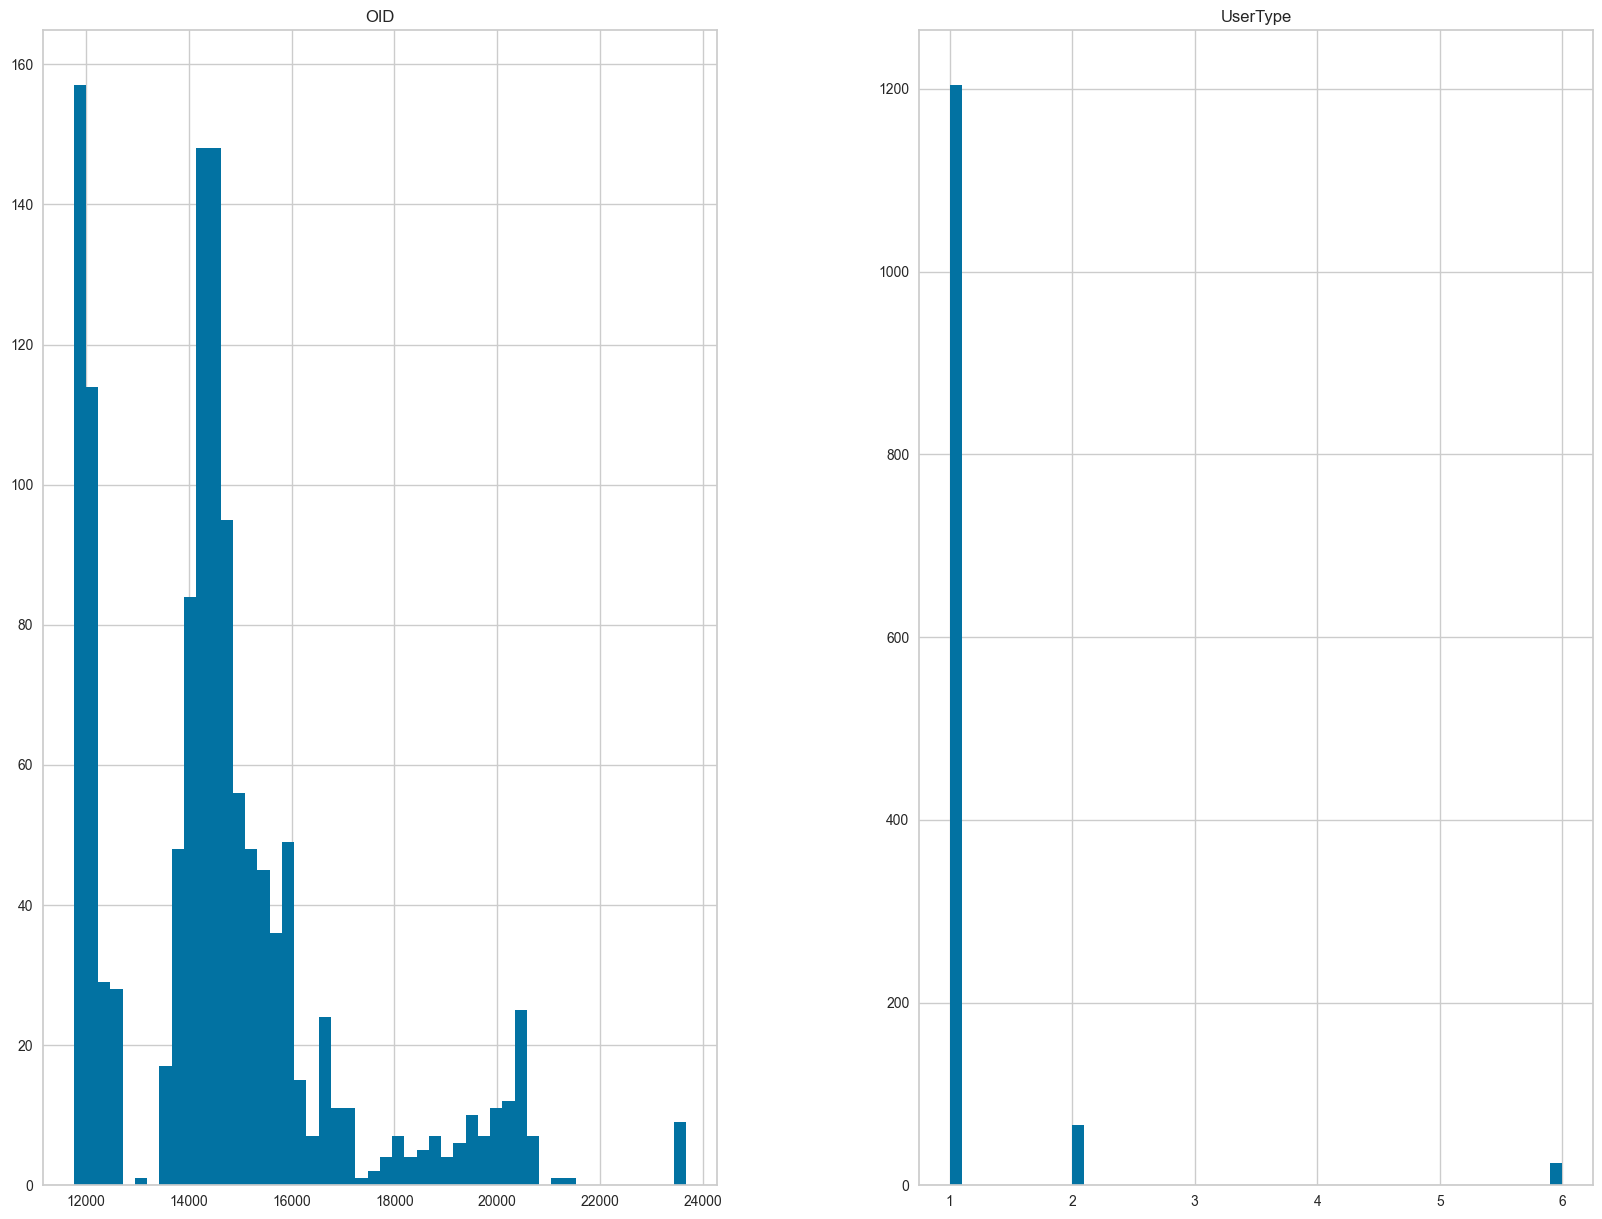

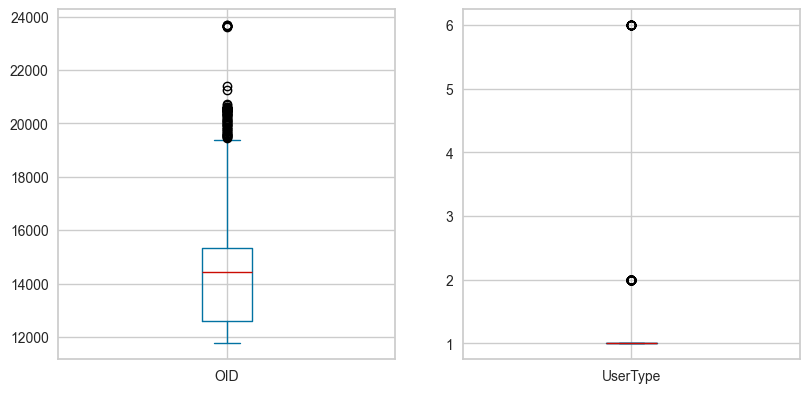

In [289]:
misdatosTematicasbrindadas.hist(bins=50, figsize=(20,15))
plt.show()

# Gráficos de caja para identificar outliers y distribución
misdatosTematicasbrindadas.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,10))
plt.show()

- ¿Cómo se distribuyen los datos en función de diferentes categorías?

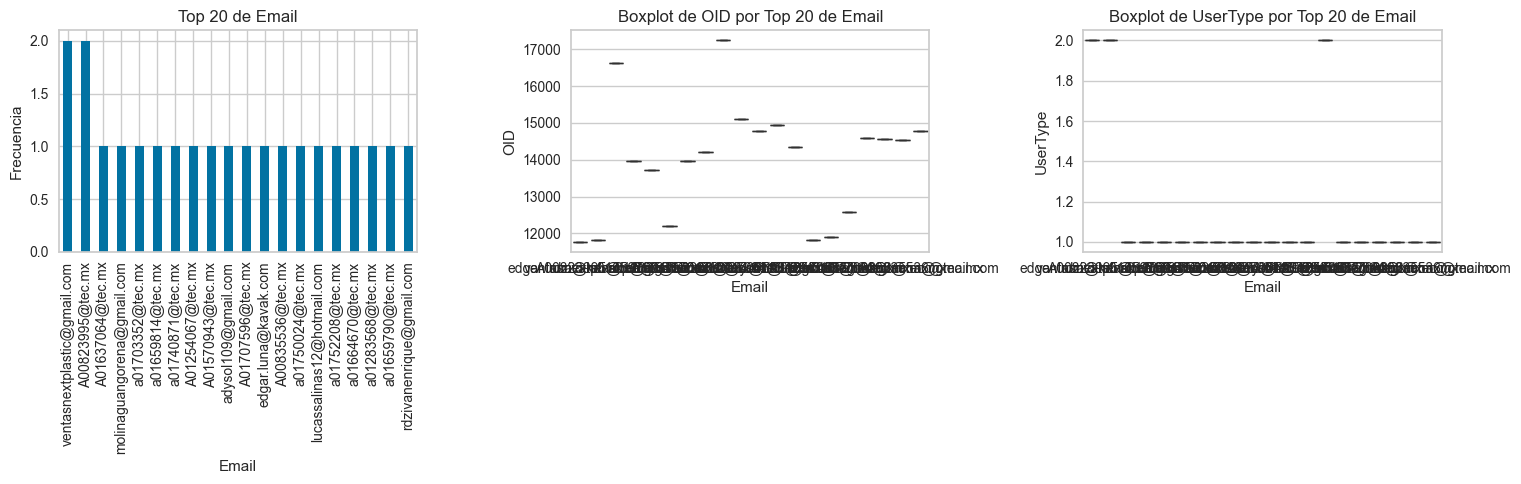

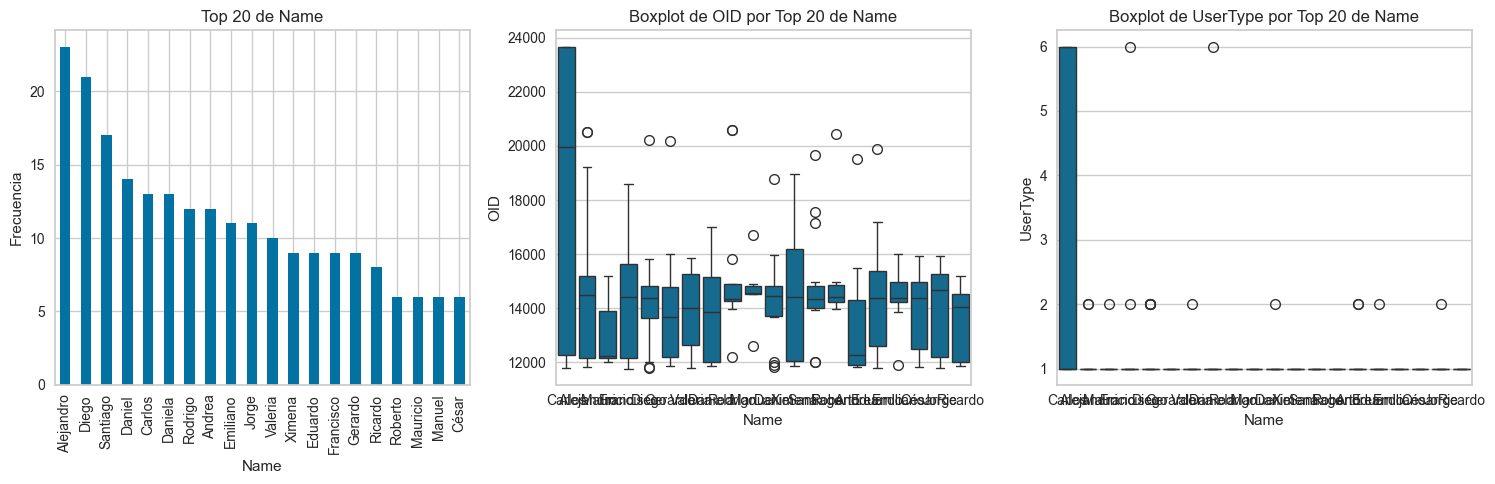

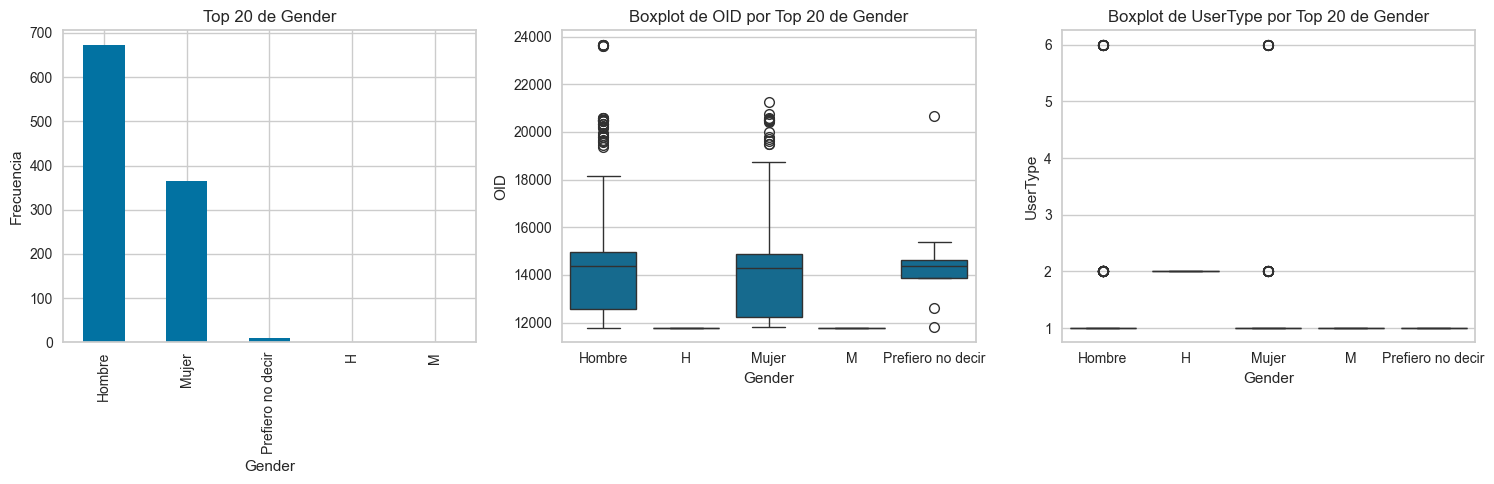

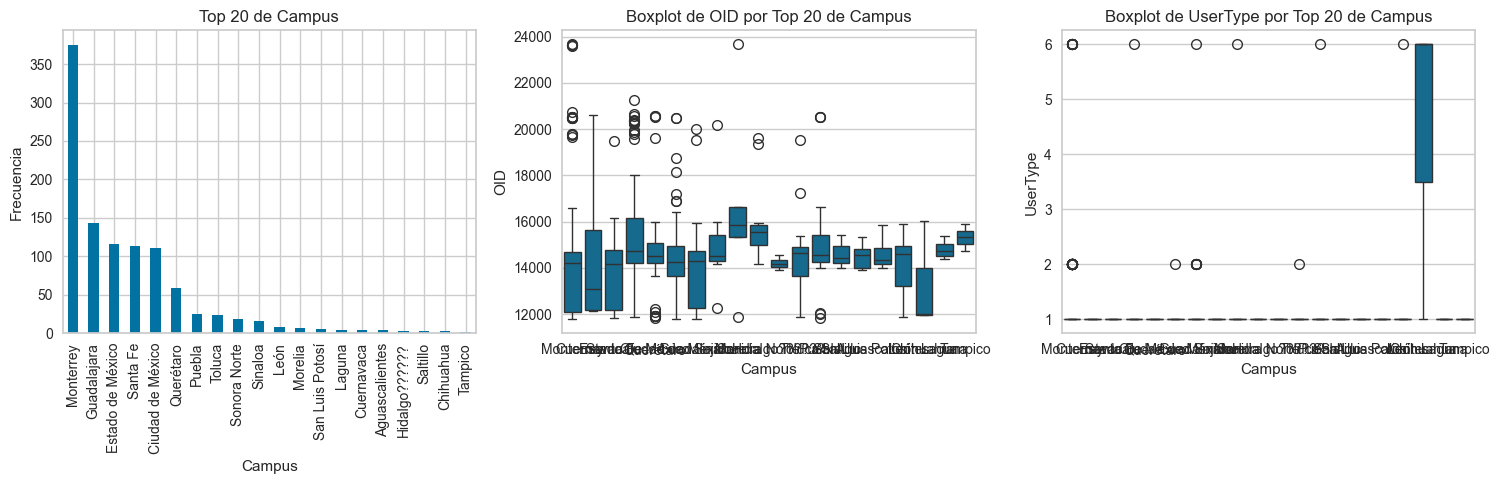

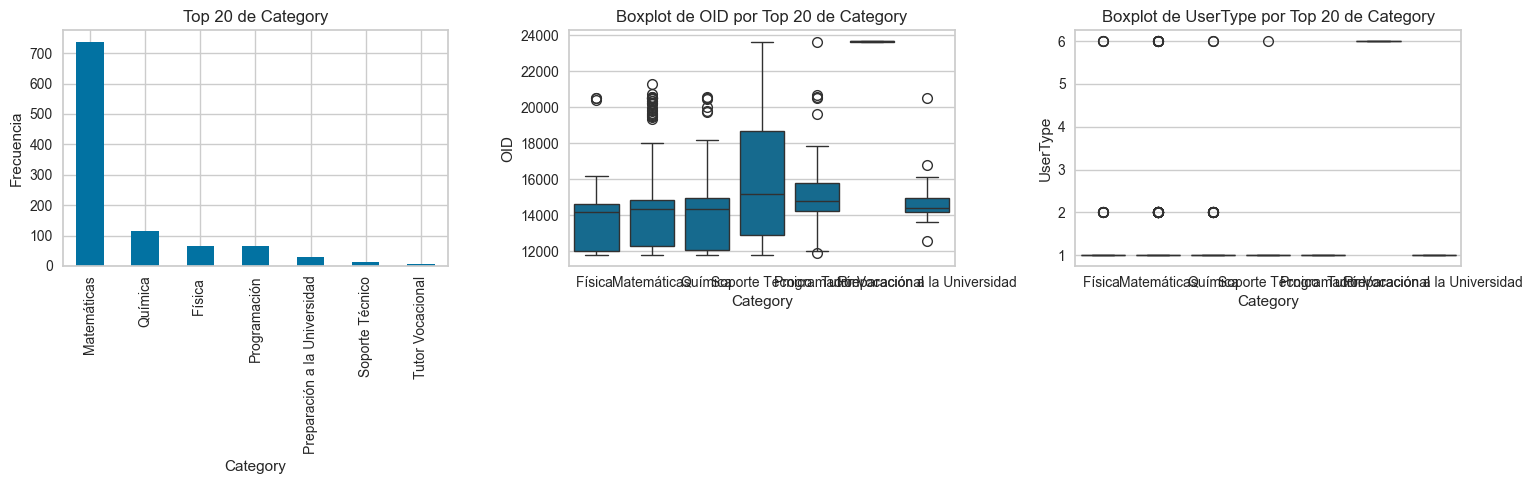

C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\33551643.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


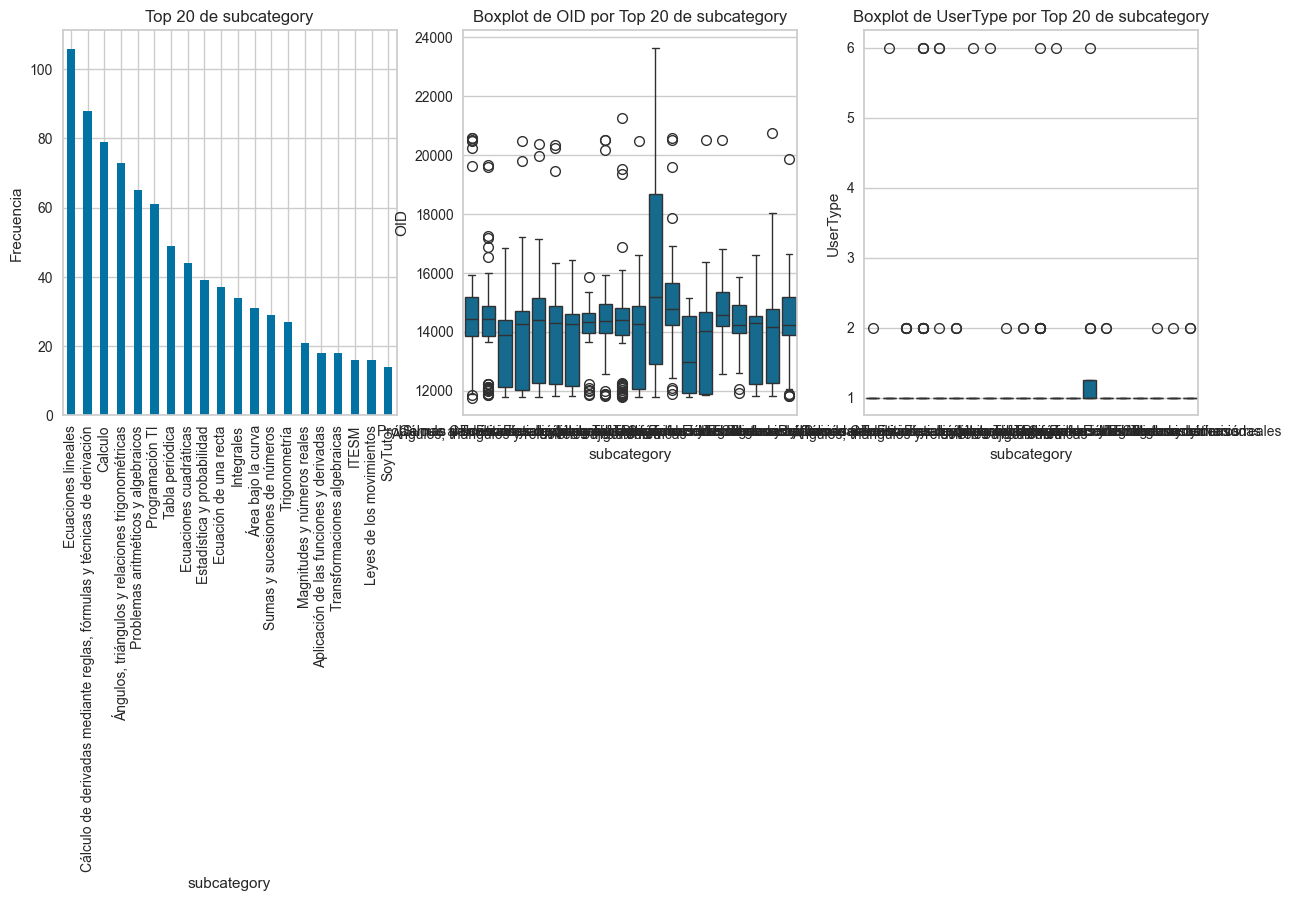

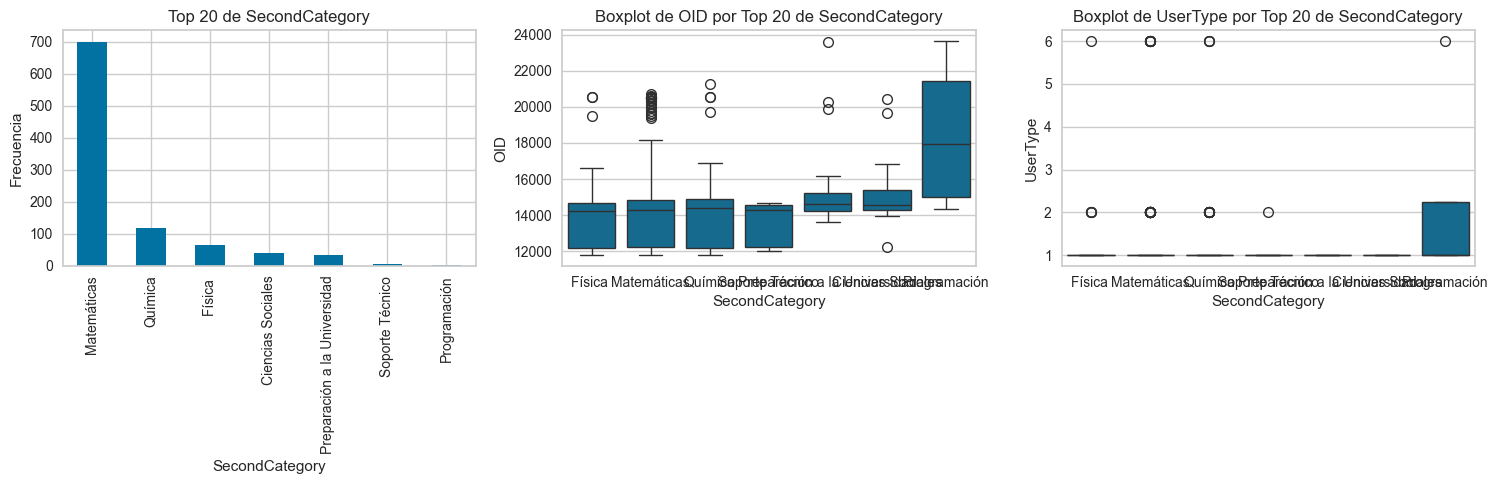

C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\33551643.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


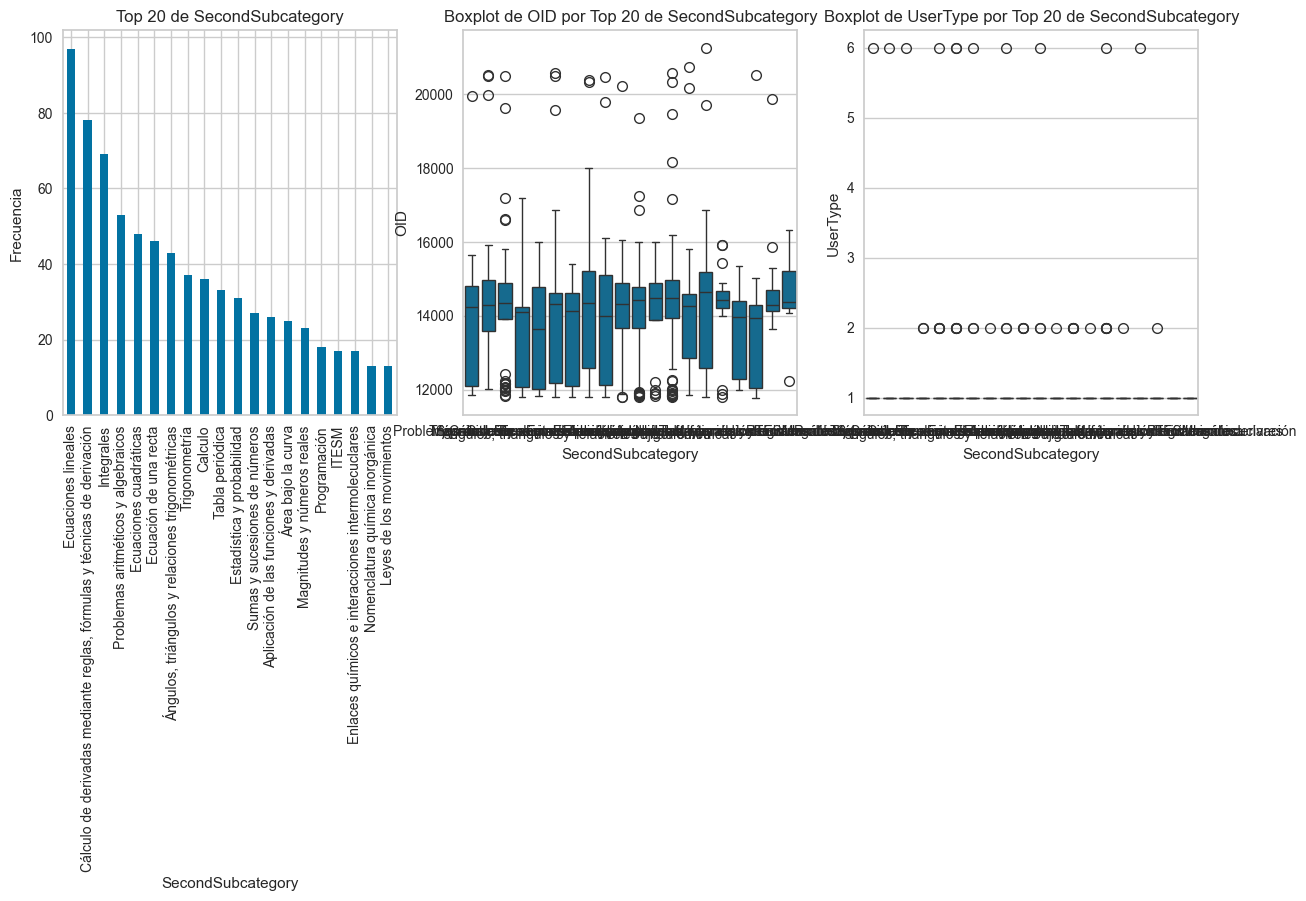

In [290]:
# Iterar sobre todas las columnas de tipo 'object' del DataFrame
for columna in misdatosTematicasbrindadas.select_dtypes(include=['object']):
    # Seleccionar el top 20 de cada categoría
    top_20 = misdatosTematicasbrindadas[columna].value_counts().head(20)

    # Crear una nueva figura para los subgráficos
    plt.figure(figsize=(25, 5))

    # Gráfico de barras para el top 20 de cada columna categórica
    plt.subplot(1, 5, 1)  # 1 fila, 5 columnas, posición 1
    top_20.plot(kind='bar')
    plt.title(f'Top 20 de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

    # Para cada columna categórica, crear un gráfico de caja por categoría con todas las variables numéricas
    # Considerando solo las categorías en el top 20
    columnas_numericas = misdatosTematicasbrindadas.select_dtypes(include=['number']).columns
    for idx, col_num in enumerate(columnas_numericas[:4]):  # Limitar a 4 variables numéricas
        # Filtrar los datos para incluir solo las categorías en el top 20
        datos_filtrados = misdatosTematicasbrindadas[misdatosTematicasbrindadas[columna].isin(top_20.index)]
        
        plt.subplot(1, 5, idx + 2)  # Posiciones 2 a 5
        sns.boxplot(x=columna, y=col_num, data=datos_filtrados)
        plt.title(f'Boxplot de {col_num} por Top 20 de {columna}')

    plt.tight_layout()
    plt.show()

¿Cuál es la cardinalidad de las variables categóricas?

In [291]:
# Seleccionar solo las columnas de tipo 'object'
columnas_object = misdatosTematicasbrindadas.select_dtypes(include=['object'])

# Calcular la cardinalidad (número de valores únicos) para cada columna de tipo 'object'
cardinalidad = columnas_object.nunique()

# Mostrar la cardinalidad
print(cardinalidad)


Email                1292
Name                  808
Gender                  5
Campus                 26
Category                7
subcategory            54
SecondCategory          7
SecondSubcategory      61
dtype: int64


In [292]:
misdatosTematicasbrindadas

OID                          Email           Name             Gender  \
0     11766           edgar.luna@kavak.com          Edgar             Hombre   
1     11776               vascencio@tec.mx            Vic                NaN   
2     11778  marcovillalobos92@hotmail.com  Marco Antonio                  H   
3     11784           lab.crearh@gmail.com         Carlos                NaN   
4     11786           frantostav@gmail.com     Francisco                 NaN   
...     ...                            ...            ...                ...   
1289  14335               A01369561@tec.mx     José Pablo             Hombre   
1290  23638         vanillajs293@gmail.com     javascript             Hombre   
1291  20672                j.zavala@tec.mx     Jacqueline  Prefiero no decir   
1292  14356               A00834601@tec.mx        Corina               Mujer   
1293  15248               a01662781@tec.mx          Jorge             Hombre   

                Campus         Category  \
0            Monterrey              NaN   
1                  NaN              NaN   
2            Monterrey              NaN   
3                  NaN              NaN   
4                  NaN              NaN   
...                ...              ...   
1289          Santa Fe      Matemáticas   
1290          Irapuato  Soporte Técnico   
1291  Estado de México     Programación   
1292         Monterrey      Matemáticas   
1293  Ciudad de México      Matemáticas   

                                            subcategory  UserType  \
0                                                   NaN         2   
1                                                   NaN         1   
2                                                   NaN         2   
3                                                   NaN         1   
4                                                   NaN         1   
...                                                 ...       ...   
1289  Cálculo de derivadas mediante reglas, fórmulas...         1   
1290                                           SoyTutor         6   
1291                                             Python         1   
1292                                         Integrales         1   
1293                         Estadística y probabilidad         1   

         SecondCategory  SecondSubcategory  
0                   NaN                NaN  
1                   NaN                NaN  
2                   NaN                NaN  
3                   NaN                NaN  
4                   NaN                NaN  
...                 ...                ...  
1289  Ciencias Sociales  Ciencias Sociales  
1290       Programación         JavaScript  
1291       Programación              C/C++  
1292       Programación              C/C++  
1293       Programación                  R  

[1294 rows x 10 columns]

# Primeras Conclusiones

El análisis de los cuatro conjuntos de datos ha revelado conexiones entre las variables, pero no se ha identificado una vía directa para proceder con el entrenamiento de un modelo predictivo. Por ejemplo, dentro del conjunto de datos de evaluaciones, es evidente que existe una interacción que va del tutor al alumno. Sin embargo, esta información por sí sola no es suficiente para determinar la eficacia del tutor en términos de su impacto en el rendimiento del alumno.

Para avanzar, se propone combinar este conjunto de datos con otro que contenga información específica sobre los tipos de tutorías impartidas. La fusión de estos datos podría proporcionar un contexto más amplio y permitir una comprensión más profunda de cómo las sesiones de tutoría se correlacionan con las evaluaciones recibidas. Esto podría implicar explorar si ciertos tipos de tutorías están asociados con evaluaciones más positivas o si las características de las tutorías (como la duración, el tema o la frecuencia) pueden influir en el desempeño percibido del tutor.

Al correlacionar las evaluaciones de los tutores con los detalles de las sesiones de tutoría, se espera encontrar patrones o tendencias que puedan señalar indicadores de un tutor efectivo o identificar áreas de mejora. Este enfoque podría eventualmente llevar a un modelo que prediga los resultados de las sesiones de tutoría o evalúe la calidad de los tutores, lo cual sería de gran valor para mejorar la experiencia educativa del alumno.

- # Gráficos de barras (Top 20 de cada categoría): 

* En los gráficos de barras se puede observar que ciertas categorías, respuestas o emails tienen frecuencias mucho más altas que otras, lo que indica que algunos valores son mucho más comunes.

- # Boxplots de IDAppointment: 
* Estos gráficos indican la distribución de los ID de citas para las top 20 respuestas y otras categorías. En algunos casos, hay una distribución amplia, lo que podría indicar una mayor variedad en los ID de citas asociados a ciertas respuestas o categorías. También se observan algunos valores atípicos.

- # Boxplots de Status: 
* Se puede ver la distribución del 'Status' en relación con las top 20 respuestas y categorías. Algunas respuestas parecen tener una mayor variabilidad en 'Status' que otras.

- # Boxplots de Evaluator y EvaluatorUserType: 
* Estos gráficos muestran cómo se distribuyen los IDs de los evaluadores y los tipos de usuario de los evaluadores entre las diferentes respuestas y categorías. En algunos casos, los boxplots son estrechos, lo que indica una menor variabilidad en los IDs de los evaluadores para esas respuestas específicas.

- # Boxplots de EmailAlumno y EmailTutor: 
* Los boxplots asociados con los correos electrónicos de alumnos y tutores sugieren variaciones en los ID de citas. Esto podría reflejar la frecuencia de interacción o la cantidad de citas que involucran a los alumnos y tutores más comunes.

- # Consistencia en EvaluatorUserType: 
* Los boxplots de EvaluatorUserType parecen ser consistentes sin mucha variabilidad, lo que sugiere que esta variable no cambia mucho entre las diferentes respuestas o categorías del top 20.

- # Variables relacionadas con nombres (evaluatedname y Evaluatorname): 
* Las frecuencias y las distribuciones en estos gráficos podrían dar información sobre quiénes son los evaluados y los evaluadores más activos o más frecuentes en el conjunto de datos.

- # Observaciones y preguntas (Observation y Question): 
* Las frecuencias más altas en las observaciones podrían indicar temas o asuntos comunes en las citas, mientras que la distribución de las variables numéricas podría sugerir patrones en la longitud de las citas o en el 'Status' relacionado con ciertos temas o preguntas.

- # Top 20 de Observation/Question/Secondcategory/SecondSubCatName/SubCatName:

* Los gráficos de barras indican las observaciones, preguntas, categorías secundarias y subcategorías más comunes en el conjunto de datos.
* Hay una caída notable en la frecuencia después del primero o los primeros pocos ítems más comunes, lo que sugiere que hay algunas observaciones o preguntas que son mucho más prevalentes que otras.

- # Boxplots de IDAppointment:

* La distribución de ID de citas varía significativamente en las categorías top, con algunos boxplots mostrando una mayor dispersión que otros.
* Algunas categorías tienen muchos valores atípicos, lo que puede indicar inconsistencias o casos especiales en cómo se asignan o registran las citas.

- # Boxplots de Status:

* La variable 'Status' parece tener una distribución más centrada alrededor de ciertos valores en todas las categorías, pero con diferentes grados de dispersión y valores atípicos.
* Esto podría ser indicativo de cómo las diferentes categorías influyen o están asociadas con el 'Status' de algo, posiblemente el resultado o la condición de una cita.

- # Boxplots de Evaluator y EvaluatorUserType:

* Los evaluadores parecen estar distribuidos uniformemente a través de las diferentes categorías, pero hay algunas diferencias en la centralidad y la dispersión de sus IDs.
* El 'EvaluatorUserType' parece ser bastante constante con poca variabilidad.

- # Relación con variables numéricas:

* En varios boxplots, las variables numéricas asociadas con categorías como 'Secondcategory' y 'SubCatName' muestran que ciertas categorías pueden estar asociadas con valores más altos o más bajos de estas variables.

# Unir DS para encontrar mejores relaciones

### Despues de una breve junta con el equipo de Soy Tutor se determina que el DS de las evaluaciones estan conjuntas las evaluaciones de los tutores a alumnos y de alumnos a tutores, por lo que necesitamos separarlas para darles un tratamiento parecido, pero con enfoques diferentes.

In [293]:
# Definimos una función para buscar si alguna palabra en la lista de palabras clave está en la pregunta
def contains_tutor_words(question, keywords):
    return any(keyword in question.lower() for keyword in keywords)

# Lista de palabras clave relacionadas con 'tutor'
tutor_keywords = ['tutor', 'tutoria']

# Creamos una máscara booleana para las filas que contienen las palabras clave
mask = misdatosEvaluaciones['Question'].apply(lambda x: contains_tutor_words(x, tutor_keywords))

# Creamos los DataFrames separados basados en la máscara
dsTutor = misdatosEvaluaciones[mask]
dsAlumno = misdatosEvaluaciones[~mask]

dsTutor

IDAppointment  Status  Evaluator                  Evaluatorname  \
0               8361       4      19447     gabyfernandez854@gmail.com   
5               8537       4      14889  reginaserranoromero@gmail.com   
6               8101       4      15038               a00825658@tec.mx   
8               8922       4      16940     beckargp22092006@gmail.com   
11              8997       5      20558           claulis799@gmail.com   
...              ...     ...        ...                            ...   
11450           8672       5      14344        omarsaidm2002@gmail.com   
11451           6954       4      13525            osedbarca@gmail.com   
11452           7535       4      15122      sofia.cubillas@anahuac.mx   
11457           7185       4      14285            danyarabo@gmail.com   
11458           8412       4      14278              bayrebe@gmail.com   

       EvaluatorUserType  Evaluated               evaluatedname  \
0                      8      14566            a01178149@tec.mx   
5                      8      14430            A01737094@tec.mx   
6                      1      16352  danielperdomo58@outlook.es   
8                      8      14154            A01352112@tec.mx   
11                     4      20517            A01737630@tec.mx   
...                  ...        ...                         ...   
11450                  1      20132    paupartida0120@gmail.com   
11451                  3      12596            a00825130@Tec.mx   
11452                  8      14864            A01024820@tec.mx   
11457                  1      14402            A01742512@tec.mx   
11458                  8      14251            A00835680@tec.mx   

       evaluatedUsertype  QuestionType  \
0                      1             2   
5                      1             2   
6                      8             1   
8                      1             1   
11                     1             1   
...                  ...           ...   
11450                  3             1   
11451                  1             1   
11452                  1             1   
11457                  8             1   
11458                  1             1   

                                                Question  \
0       ¿Cómo calificarías la calidad del desempeño d...   
5       ¿Cómo calificarías la calidad del desempeño d...   
6       ¿Qué actividades acordaron para la próxima tu...   
8      ¿De qué otra temática te gustaría recibir tuto...   
11     ¿Tienes algún comentario para mejorar el servi...   
...                                                  ...   
11450   ¿Qué actividades acordaron para la próxima tu...   
11451  ¿De qué otra temática te gustaría recibir tuto...   
11452                   ¿Tuviste la sesión con el tutor?   
11457   ¿Qué actividades acordaron para la próxima tu...   
11458  ¿De qué otra temática te gustaría recibir tuto...   

                                                  Answer  cluster  
0                                                      1        0  
5                                                      5        1  
6                                                    NaN        1  
8                                                    NaN        0  
11                                                   NaN        0  
...                                                  ...      ...  
11450                                            Ninguna        2  
11451                                                NaN        1  
11452                                       Tomas Pikman        1  
11457  Acordamos revisar componentes faltantes de las...        1  
11458                                        Integrales         1  

[5092 rows x 12 columns]

In [294]:
dsAlumno

IDAppointment  Status  Evaluator               Evaluatorname  \
1               8504       4      19883            a01753728@tec.mx   
2               7754       4      15401            A01385134@tec.mx   
3               7107       4      11818            a01654087@tec.mx   
4               8609       4      14524            a01799906@tec.mx   
7               6433       4      11962            A01633290@tec.mx   
...              ...     ...        ...                         ...   
11456           7513       4      14373            A01748695@tec.mx   
11459           7345       4      14172            a01661437@tec.mx   
11460           7365       4      14640            a00835803@tec.mx   
11461           8772       4      19469  juliocesar.2002@icloud.com   
11462           6459       5      12110        cindygfc01@gmail.com   

       EvaluatorUserType  Evaluated                 evaluatedname  \
1                      7      19866              a01750754@tec.mx   
2                      1      15823              a01385118@tec.mx   
3                      1      14074              a01658389@tec.mx   
4                      1      19886              A01745719@tec.mx   
7                      1      12604          alexialg05@gmail.com   
...                  ...        ...                           ...   
11456                  1      14764              A01748513@tec.mx   
11459                  1      14865              A01654903@tec.mx   
11460                  1      14896      Monik.mejorado@gmail.com   
11461                  1      20203              a01784104@tec.mx   
11462                  1      12628  montserrat4muraira@gmail.com   

       evaluatedUsertype  QuestionType  \
1                      1             3   
2                      8             3   
3                      8             1   
4                      7             1   
7                      3             2   
...                  ...           ...   
11456                  8             3   
11459                  8             2   
11460                  9             1   
11461                  3             2   
11462                  3             3   

                                                Question Answer  cluster  
1      Considero que en esta sesión tuve el avance co...      5        0  
2      Considero que el alumne está comprometide con ...      4        1  
3      ¿Tienes algún comentario para mejorar el servi...     No        1  
4                      ¿Tuviste la sesión con el alumne?     Si        2  
7       ¿Cómo calificarías la calidad del desempeño d...      5        1  
...                                                  ...    ...      ...  
11456  Considero que el alumne está comprometide con ...      4        1  
11459   ¿Cómo calificarías la calidad del desempeño d...      5        1  
11460                  ¿Tuviste la sesión con el alumne?     Sí        1  
11461   ¿Cómo calificarías la calidad del desempeño d...      4        0  
11462  Considero que el alumne está comprometide con ...      4        1  

[6371 rows x 12 columns]

### Ahora segun el diccionario dado junto al DS

-9 = Tutor NO se conectó a la sesión y Alumno SÍ se conectó.

-8 = Alumno NO se conectó a la sesión y Tutor SÍ se conectó.

-7 = Alumno en espera de que Tutor se conecte a la sesión de tutoring.

-6 = Tutor en espera de que Alumno se conecte a la sesión de tutoring.

-3 = Sesión de tutoring cancelada por Tutor.

-1 = Sesión pendiente de aceptar/rechazar por parte del Tutor. (No Aplica)

0 = Sesión de tutoring aceptada. (En automático)

2 = Sesión cancelada.

4 = Sesión de tutoring finalizada exitosamente.

5 = Sesión finalizada por el Tutor. (antes de tiempo)

Estaríamos buscando los códigos 4 y 5 que representan sesiones finalizadas exitosamente y sesiones finalizadas por el tutor antes de tiempo, respectivamente.

In [295]:
completed_sessions = [4, 5]

# Filtramos el DataFrame para dejar solo las filas con los códigos de estatus deseados.
dsTutor = dsTutor[dsTutor['Status'].isin(completed_sessions)]
dsAlumno = dsAlumno[dsAlumno['Status'].isin(completed_sessions)]

In [296]:
dsTutor

IDAppointment  Status  Evaluator                  Evaluatorname  \
0               8361       4      19447     gabyfernandez854@gmail.com   
5               8537       4      14889  reginaserranoromero@gmail.com   
6               8101       4      15038               a00825658@tec.mx   
8               8922       4      16940     beckargp22092006@gmail.com   
11              8997       5      20558           claulis799@gmail.com   
...              ...     ...        ...                            ...   
11450           8672       5      14344        omarsaidm2002@gmail.com   
11451           6954       4      13525            osedbarca@gmail.com   
11452           7535       4      15122      sofia.cubillas@anahuac.mx   
11457           7185       4      14285            danyarabo@gmail.com   
11458           8412       4      14278              bayrebe@gmail.com   

       EvaluatorUserType  Evaluated               evaluatedname  \
0                      8      14566            a01178149@tec.mx   
5                      8      14430            A01737094@tec.mx   
6                      1      16352  danielperdomo58@outlook.es   
8                      8      14154            A01352112@tec.mx   
11                     4      20517            A01737630@tec.mx   
...                  ...        ...                         ...   
11450                  1      20132    paupartida0120@gmail.com   
11451                  3      12596            a00825130@Tec.mx   
11452                  8      14864            A01024820@tec.mx   
11457                  1      14402            A01742512@tec.mx   
11458                  8      14251            A00835680@tec.mx   

       evaluatedUsertype  QuestionType  \
0                      1             2   
5                      1             2   
6                      8             1   
8                      1             1   
11                     1             1   
...                  ...           ...   
11450                  3             1   
11451                  1             1   
11452                  1             1   
11457                  8             1   
11458                  1             1   

                                                Question  \
0       ¿Cómo calificarías la calidad del desempeño d...   
5       ¿Cómo calificarías la calidad del desempeño d...   
6       ¿Qué actividades acordaron para la próxima tu...   
8      ¿De qué otra temática te gustaría recibir tuto...   
11     ¿Tienes algún comentario para mejorar el servi...   
...                                                  ...   
11450   ¿Qué actividades acordaron para la próxima tu...   
11451  ¿De qué otra temática te gustaría recibir tuto...   
11452                   ¿Tuviste la sesión con el tutor?   
11457   ¿Qué actividades acordaron para la próxima tu...   
11458  ¿De qué otra temática te gustaría recibir tuto...   

                                                  Answer  cluster  
0                                                      1        0  
5                                                      5        1  
6                                                    NaN        1  
8                                                    NaN        0  
11                                                   NaN        0  
...                                                  ...      ...  
11450                                            Ninguna        2  
11451                                                NaN        1  
11452                                       Tomas Pikman        1  
11457  Acordamos revisar componentes faltantes de las...        1  
11458                                        Integrales         1  

[5072 rows x 12 columns]

In [297]:
dsAlumno

IDAppointment  Status  Evaluator               Evaluatorname  \
1               8504       4      19883            a01753728@tec.mx   
2               7754       4      15401            A01385134@tec.mx   
3               7107       4      11818            a01654087@tec.mx   
4               8609       4      14524            a01799906@tec.mx   
7               6433       4      11962            A01633290@tec.mx   
...              ...     ...        ...                         ...   
11456           7513       4      14373            A01748695@tec.mx   
11459           7345       4      14172            a01661437@tec.mx   
11460           7365       4      14640            a00835803@tec.mx   
11461           8772       4      19469  juliocesar.2002@icloud.com   
11462           6459       5      12110        cindygfc01@gmail.com   

       EvaluatorUserType  Evaluated                 evaluatedname  \
1                      7      19866              a01750754@tec.mx   
2                      1      15823              a01385118@tec.mx   
3                      1      14074              a01658389@tec.mx   
4                      1      19886              A01745719@tec.mx   
7                      1      12604          alexialg05@gmail.com   
...                  ...        ...                           ...   
11456                  1      14764              A01748513@tec.mx   
11459                  1      14865              A01654903@tec.mx   
11460                  1      14896      Monik.mejorado@gmail.com   
11461                  1      20203              a01784104@tec.mx   
11462                  1      12628  montserrat4muraira@gmail.com   

       evaluatedUsertype  QuestionType  \
1                      1             3   
2                      8             3   
3                      8             1   
4                      7             1   
7                      3             2   
...                  ...           ...   
11456                  8             3   
11459                  8             2   
11460                  9             1   
11461                  3             2   
11462                  3             3   

                                                Question Answer  cluster  
1      Considero que en esta sesión tuve el avance co...      5        0  
2      Considero que el alumne está comprometide con ...      4        1  
3      ¿Tienes algún comentario para mejorar el servi...     No        1  
4                      ¿Tuviste la sesión con el alumne?     Si        2  
7       ¿Cómo calificarías la calidad del desempeño d...      5        1  
...                                                  ...    ...      ...  
11456  Considero que el alumne está comprometide con ...      4        1  
11459   ¿Cómo calificarías la calidad del desempeño d...      5        1  
11460                  ¿Tuviste la sesión con el alumne?     Sí        1  
11461   ¿Cómo calificarías la calidad del desempeño d...      4        0  
11462  Considero que el alumne está comprometide con ...      4        1  

[6349 rows x 12 columns]

En question type, se necesita limpiar para dejar solo lass preguntas 2 y 3 Existen 3 tipos de pregunta:

3) Estrellas = Rango es del 1-5
2) Radio = Rango es del 1-5 (Muy en Desacuerdo, En Desacuerdo, Neutral, De Acuerdo, Muy en Deacuerdo)
1) Comentario = Campo abierto

In [298]:
# Filtramos el DataFrame para dejar solo las filas con los tipos de pregunta 2 y 3.
dsAlumnoComentarios = dsAlumno[dsAlumno['QuestionType'].isin([1])]
dsTutorComentarios = dsTutor[dsTutor['QuestionType'].isin([1])]

dsAlumnoFinal = dsAlumno[dsAlumno['QuestionType'].isin([2, 3])]
dsTutorFinal = dsTutor[dsTutor['QuestionType'].isin([2, 3])]

In [299]:
dsTutorComentarios

IDAppointment  Status  Evaluator               Evaluatorname  \
6               8101       4      15038            a00825658@tec.mx   
8               8922       4      16940  beckargp22092006@gmail.com   
11              8997       5      20558        claulis799@gmail.com   
18              7332       4      14842           sofrv09@gmail.com   
19              7635       4      14455            aairyc@gmail.com   
...              ...     ...        ...                         ...   
11450           8672       5      14344     omarsaidm2002@gmail.com   
11451           6954       4      13525         osedbarca@gmail.com   
11452           7535       4      15122   sofia.cubillas@anahuac.mx   
11457           7185       4      14285         danyarabo@gmail.com   
11458           8412       4      14278           bayrebe@gmail.com   

       EvaluatorUserType  Evaluated                      evaluatedname  \
6                      1      16352         danielperdomo58@outlook.es   
8                      8      14154                   A01352112@tec.mx   
11                     4      20517                   A01737630@tec.mx   
18                     8      14213                   A01285253@tec.mx   
19                     1      15280  josephine.esposito.2000@gmail.com   
...                  ...        ...                                ...   
11450                  1      20132           paupartida0120@gmail.com   
11451                  3      12596                   a00825130@Tec.mx   
11452                  8      14864                   A01024820@tec.mx   
11457                  1      14402                   A01742512@tec.mx   
11458                  8      14251                   A00835680@tec.mx   

       evaluatedUsertype  QuestionType  \
6                      8             1   
8                      1             1   
11                     1             1   
18                     1             1   
19                     8             1   
...                  ...           ...   
11450                  3             1   
11451                  1             1   
11452                  1             1   
11457                  8             1   
11458                  1             1   

                                                Question  \
6       ¿Qué actividades acordaron para la próxima tu...   
8      ¿De qué otra temática te gustaría recibir tuto...   
11     ¿Tienes algún comentario para mejorar el servi...   
18     ¿De qué otra temática te gustaría recibir tuto...   
19      ¿Qué actividades acordaron para la próxima tu...   
...                                                  ...   
11450   ¿Qué actividades acordaron para la próxima tu...   
11451  ¿De qué otra temática te gustaría recibir tuto...   
11452                   ¿Tuviste la sesión con el tutor?   
11457   ¿Qué actividades acordaron para la próxima tu...   
11458  ¿De qué otra temática te gustaría recibir tuto...   

                                                  Answer  cluster  
6                                                    NaN        1  
8                                                    NaN        0  
11                                                   NaN        0  
18                                                   NaN        1  
19     Repasar ejercicios que tenga de clase para pre...        1  
...                                                  ...      ...  
11450                                            Ninguna        2  
11451                                                NaN        1  
11452                                       Tomas Pikman        1  
11457  Acordamos revisar componentes faltantes de las...        1  
11458                                        Integrales         1  

[4105 rows x 12 columns]

In [300]:
dsAlumnoComentarios

IDAppointment  Status  Evaluator                Evaluatorname  \
3               7107       4      11818             a01654087@tec.mx   
4               8609       4      14524             a01799906@tec.mx   
13              7679       4      14967             A01424046@tec.mx   
16              8937       4      14280             a01285521@tec.mx   
17              7528       4      14255             A01643020@tec.mx   
...              ...     ...        ...                          ...   
11448           7471       4      14202             a01285609@tec.mx   
11453           6412       5      11804             A00826897@tec.mx   
11454           7186       4      14190  josuedelvalle2003@gmail.com   
11455           7690       4      15179             a01664060@tec.mx   
11460           7365       4      14640             a00835803@tec.mx   

       EvaluatorUserType  Evaluated                 evaluatedname  \
3                      1      14074              a01658389@tec.mx   
4                      1      19886              A01745719@tec.mx   
13                     1      15340     samantha.colo@outlook.com   
16                     1      14777              a01286733@tec.mx   
17                     1      15110              a01644045@tec.mx   
...                  ...        ...                           ...   
11448                  1      15063  orozcogomezmiranda@gmail.com   
11453                  2      12441          italiagar1@gmail.com   
11454                  1      14544  hernandezsamuel255@yahoo.com   
11455                  1      15370              a01661749@tec.mx   
11460                  1      14896      Monik.mejorado@gmail.com   

       evaluatedUsertype  QuestionType  \
3                      8             1   
4                      7             1   
13                     8             1   
16                     8             1   
17                     8             1   
...                  ...           ...   
11448                  8             1   
11453                  3             1   
11454                  8             1   
11455                  9             1   
11460                  9             1   

                                                Question  \
3      ¿Tienes algún comentario para mejorar el servi...   
4                      ¿Tuviste la sesión con el alumne?   
13     ¿Tienes algún comentario para mejorar el servi...   
16                     ¿Tuviste la sesión con el alumne?   
17                     ¿Tuviste la sesión con el alumne?   
...                                                  ...   
11448                  ¿Tuviste la sesión con el alumne?   
11453  ¿Tienes algún comentario para mejorar el servi...   
11454                  ¿Tuviste la sesión con el alumne?   
11455                  ¿Tuviste la sesión con el alumne?   
11460                  ¿Tuviste la sesión con el alumne?   

                      Answer  cluster  
3                         No        1  
4                         Si        2  
13                       NaN        1  
16                        Si        1  
17                       Sí.        1  
...                      ...      ...  
11448                     Si        1  
11453                    NaN        1  
11454  Si, samuel hehrnandez        1  
11455     Jaqueline Gallegos        1  
11460                     Sí        1  

[2587 rows x 12 columns]

In [301]:
dsTutorFinal

IDAppointment  Status  Evaluator                  Evaluatorname  \
0               8361       4      19447     gabyfernandez854@gmail.com   
5               8537       4      14889  reginaserranoromero@gmail.com   
15              8048       4      17239         arelyashley0@gmail.com   
27              9405       4      22302      manning18200429@gmail.com   
65              7408       4      14960         marianamv743@gmail.com   
...              ...     ...        ...                            ...   
11378           6503       4      12708           aduenas1@hotmail.com   
11385           7050       4      12587        ximena_orta@hotmail.com   
11386           7813       4      12216   lopezanalucia.0918@gmail.com   
11388           8922       4      16940     beckargp22092006@gmail.com   
11408           7861       4      13351           ccivic2002@gmail.com   

       EvaluatorUserType  Evaluated                    evaluatedname  \
0                      8      14566                 a01178149@tec.mx   
5                      8      14430                 A01737094@tec.mx   
15                     8      14869                 A00835528@tec.mx   
27                     7      14300                 a01658305@tec.mx   
65                     8      14741                 a00832646@tec.mx   
...                  ...        ...                              ...   
11378                  3      11863                 a01641792@tec.mx   
11385                  3      12430           edanvicencio@gmail.com   
11386                  5      12168  luismaximilianolr2002@gmail.com   
11388                  8      14154                 A01352112@tec.mx   
11408                  3      11962                 A01633290@tec.mx   

       evaluatedUsertype  QuestionType  \
0                      1             2   
5                      1             2   
15                     1             2   
27                     1             2   
65                     1             2   
...                  ...           ...   
11378                  1             2   
11385                  1             2   
11386                  1             2   
11388                  1             2   
11408                  1             2   

                                                Question Answer  cluster  
0       ¿Cómo calificarías la calidad del desempeño d...      1        0  
5       ¿Cómo calificarías la calidad del desempeño d...      5        1  
15      ¿Cómo calificarías la calidad del desempeño d...      5        0  
27      ¿Cómo calificarías la calidad del desempeño d...      5        0  
65      ¿Cómo calificarías la calidad del desempeño d...      5        1  
...                                                  ...    ...      ...  
11378   ¿Cómo calificarías la calidad del desempeño d...      5        1  
11385   ¿Cómo calificarías la calidad del desempeño d...      5        1  
11386   ¿Cómo calificarías la calidad del desempeño d...      5        1  
11388   ¿Cómo calificarías la calidad del desempeño d...      5        0  
11408   ¿Cómo calificarías la calidad del desempeño d...      5        1  

[967 rows x 12 columns]

In [302]:
nan_count = dsTutorFinal.isna().sum()
zero_count = dsTutorFinal.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 IDAppointment        0
Status               0
Evaluator            0
Evaluatorname        0
EvaluatorUserType    0
Evaluated            0
evaluatedname        0
evaluatedUsertype    0
QuestionType         0
Question             0
Answer               0
cluster              0
dtype: int64

Conteo de 0 por columna:
 IDAppointment          0
Status                 0
Evaluator              0
Evaluatorname          0
EvaluatorUserType      0
Evaluated              0
evaluatedname          0
evaluatedUsertype      0
QuestionType           0
Question               0
Answer                 0
cluster              270
dtype: int64

Total de NaN en el DataFrame: 0
Total de 0 en el DataFrame: 270


In [303]:
dsAlumnoFinal

IDAppointment  Status  Evaluator               Evaluatorname  \
1               8504       4      19883            a01753728@tec.mx   
2               7754       4      15401            A01385134@tec.mx   
7               6433       4      11962            A01633290@tec.mx   
9               6659       5      12062            A01749489@tec.mx   
10              8078       4      14650            A01706524@TEC.MX   
...              ...     ...        ...                         ...   
11445           7543       4      14722      ivanzamorapl@gmail.com   
11456           7513       4      14373            A01748695@tec.mx   
11459           7345       4      14172            a01661437@tec.mx   
11461           8772       4      19469  juliocesar.2002@icloud.com   
11462           6459       5      12110        cindygfc01@gmail.com   

       EvaluatorUserType  Evaluated                             evaluatedname  \
1                      7      19866                          a01750754@tec.mx   
2                      1      15823                          a01385118@tec.mx   
7                      1      12604                      alexialg05@gmail.com   
9                      1      13142  baltazarverasteguih_a@sanpatricio.edu.mx   
10                     1      16352                danielperdomo58@outlook.es   
...                  ...        ...                                       ...   
11445                  1      15133                  fernadahdz2006@gmail.com   
11456                  1      14764                          A01748513@tec.mx   
11459                  1      14865                          A01654903@tec.mx   
11461                  1      20203                          a01784104@tec.mx   
11462                  1      12628              montserrat4muraira@gmail.com   

       evaluatedUsertype  QuestionType  \
1                      1             3   
2                      8             3   
7                      3             2   
9                      3             2   
10                     8             3   
...                  ...           ...   
11445                  8             3   
11456                  8             3   
11459                  8             2   
11461                  3             2   
11462                  3             3   

                                                Question Answer  cluster  
1      Considero que en esta sesión tuve el avance co...      5        0  
2      Considero que el alumne está comprometide con ...      4        1  
7       ¿Cómo calificarías la calidad del desempeño d...      5        1  
9       ¿Cómo calificarías la calidad del desempeño d...      5        1  
10     Considero que el alumne está comprometide con ...      4        1  
...                                                  ...    ...      ...  
11445  Considero que el alumne está comprometide con ...      5        1  
11456  Considero que el alumne está comprometide con ...      4        1  
11459   ¿Cómo calificarías la calidad del desempeño d...      5        1  
11461   ¿Cómo calificarías la calidad del desempeño d...      4        0  
11462  Considero que el alumne está comprometide con ...      4        1  

[3762 rows x 12 columns]

In [304]:
nan_count = dsAlumnoFinal.isna().sum()
zero_count = dsAlumnoFinal.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 IDAppointment        0
Status               0
Evaluator            0
Evaluatorname        0
EvaluatorUserType    0
Evaluated            0
evaluatedname        0
evaluatedUsertype    0
QuestionType         0
Question             0
Answer               0
cluster              0
dtype: int64

Conteo de 0 por columna:
 IDAppointment          0
Status                 0
Evaluator              0
Evaluatorname          0
EvaluatorUserType      0
Evaluated              0
evaluatedname          0
evaluatedUsertype      0
QuestionType           0
Question               0
Answer               209
cluster              311
dtype: int64

Total de NaN en el DataFrame: 0
Total de 0 en el DataFrame: 520


Se necesita convertir la columna 'Answer' a un formato numérico para poder calcular el promedio de manera adecuada. Si dicha columna contiene calificaciones como estrellas o rangos, se deben transformar a un formato numérico que sea apto para el análisis.

Una vez que se asegura que 'Answer' es una columna numérica, se procede a agrupar el DataFrame por las columnas de interés, que en este caso podrían ser los nombres de los tutores y los alumnos evaluados. Se utiliza la función groupby de pandas para realizar esta tarea.

Al agrupar los datos, se calcula el promedio de la columna 'Answer' para cada grupo. Para las columnas de texto, como las preguntas y las materias impartidas, se concatenan los textos dentro de cada grupo. Esto se puede realizar aplicando funciones personalizadas dentro del método agg de pandas.

El DataFrame resultante, grouped_df, contendrá el promedio de las respuestas numéricas y las versiones concatenadas de las preguntas y las materias impartidas. Se renombran las columnas para reflejar que ahora contienen valores promediados y concatenados.

Con el DataFrame preparado de esta manera, es posible aplicar técnicas de aprendizaje no supervisado, como el clustering o la detección de patrones. Se debe tener cuidado al concatenar texto para evitar cadenas excesivamente largas que podrían complicar el análisis. Si las preguntas o materias impartidas son categorías discretas y no textos libres, se podría considerar la aplicación de técnicas de aprendizaje no supervisado.

In [305]:
import pandas as pd

# Asumiendo que tienes tus DataFrames iniciales: dsTutorFinal y misdatosNumTutorias

# Primero, asegúrate de que la columna 'Answer' sea numérica. Si es necesario, conviértela a tipo float.
dsTutorFinal['Answer'] = pd.to_numeric(dsTutorFinal['Answer'], errors='coerce')

# Realiza la fusión (merge) de los DataFrames.
merged_df_tutor = pd.merge(
    dsTutorFinal, 
    misdatosNumTutorias, 
    left_on=['evaluatedname', 'Evaluatorname'], 
    right_on=['EmailTutor', 'EmailAlumno'], 
    how='inner'
)

merged_df_tutor['ConocimientosImpartidos'] = merged_df_tutor[['Category', 'SubCatName', 'Secondcategory', 'SecondSubCatName']] \
    .astype(str) \
    .agg(' - '.join, axis=1)

# Calcula el promedio de la columna 'Answer' agrupado por tutor.
# Asumiendo que 'EmailTutor' es la columna que identifica a cada tutor.
average_answer_by_tutor = merged_df_tutor.groupby('EmailTutor')['Answer'].mean().reset_index(name='AverageAnswerByTutor')

# Une el promedio calculado con el DataFrame principal.
merged_df_tutor = pd.merge(
    merged_df_tutor,
    average_answer_by_tutor,
    on='EmailTutor',
    how='left'
)

# Limpia el DataFrame resultante eliminando columnas innecesarias.
merged_df_tutor.drop(columns=['Category', 'SubCatName', 'Secondcategory', 'SecondSubCatName', 'IDAppointment', 'Status', 'Evaluator', 'EvaluatorUserType', 'Evaluated', 'evaluatedUsertype','QuestionType'
                              ,'cluster_x','ID','Minutos','Estatus','AlumnoID','TutorID','cluster_y','Answer'], inplace=True)

# El DataFrame 'merged_df_tutor' ahora incluye una columna 'AverageAnswerByTutor' con el promedio de 'Answer' por tutor.

# Eliminando duplicados para asegurar una única fila por cada combinación de tutor y alumno.
merged_df_tutor = merged_df_tutor.drop_duplicates(subset=['EmailTutor', 'EmailAlumno']).reset_index()

# El DataFrame 'merged_df_tutor' ahora está limpio y contiene una única fila por cada par único de tutor y alumno,
# junto con las columnas 'AverageAnswerByTutor' y 'ConocimientosImpartidos'.

merged_df_tutor


C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\3600658071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsTutorFinal['Answer'] = pd.to_numeric(dsTutorFinal['Answer'], errors='coerce')


index                    Evaluatorname           evaluatedname  \
0        0       gabyfernandez854@gmail.com        a01178149@tec.mx   
1        2    reginaserranoromero@gmail.com        A01737094@tec.mx   
2        6           arelyashley0@gmail.com        A00835528@tec.mx   
3        7        manning18200429@gmail.com        a01658305@tec.mx   
4       16           marianamv743@gmail.com        a00832646@tec.mx   
..     ...                              ...                     ...   
683   2673          alpacasquad08@gmail.com        A01709967@tec.mx   
684   2674          luisferhardy@icloud.com        A01636057@tec.mx   
685   2675         Monik.mejorado@gmail.com        a00835803@tec.mx   
686   2676  zamoraperezlaraduaren@gmail.com  ivanzamorapl@gmail.com   
687   2677             aduenas1@hotmail.com        a01641792@tec.mx   

                                              Question   FechayHoraTutoria  \
0     ¿Cómo calificarías la calidad del desempeño d... 2023-05-15 13:00:00   
1     ¿Cómo calificarías la calidad del desempeño d... 2023-03-10 15:00:00   
2     ¿Cómo calificarías la calidad del desempeño d... 2023-04-25 16:40:00   
3     ¿Cómo calificarías la calidad del desempeño d... 2023-11-16 18:40:00   
4     ¿Cómo calificarías la calidad del desempeño d... 2023-03-10 17:40:00   
..                                                 ...                 ...   
683   ¿Cómo calificarías la calidad del desempeño d... 2023-03-10 18:00:00   
684   ¿Cómo calificarías la calidad del desempeño d... 2023-03-10 15:40:00   
685   ¿Cómo calificarías la calidad del desempeño d... 2023-03-10 19:40:00   
686   ¿Cómo calificarías la calidad del desempeño d... 2023-06-23 13:40:00   
687   ¿Cómo calificarías la calidad del desempeño d... 2022-10-31 14:00:00   

                         EmailAlumno              EmailTutor  \
0         gabyfernandez854@gmail.com        a01178149@tec.mx   
1      reginaserranoromero@gmail.com        A01737094@tec.mx   
2             arelyashley0@gmail.com        A00835528@tec.mx   
3          manning18200429@gmail.com        a01658305@tec.mx   
4             marianamv743@gmail.com        a00832646@tec.mx   
..                               ...                     ...   
683          alpacasquad08@gmail.com        A01709967@tec.mx   
684          luisferhardy@icloud.com        A01636057@tec.mx   
685         Monik.mejorado@gmail.com        a00835803@tec.mx   
686  zamoraperezlaraduaren@gmail.com  ivanzamorapl@gmail.com   
687             aduenas1@hotmail.com        a01641792@tec.mx   

                                           Observation  \
0             límites, graphic funcions, y derivadasss   
1                                 Derivadas básicas \n   
2                     Leyes del movimiento y formulas    
3                               Tengo una tarea de C++   
4                            Sobre la tabla periódica    
..                                                 ...   
683                                      Programación    
684  Hola, me gustaría mucho tocar el tema de Famil...   
685                   Repasar jerarquía de operaciones   
686                                       Probabilidad   
687                                                NaN   

                               ConocimientosImpartidos  AverageAnswerByTutor  
0    Química - Enlaces químicos e interacciones int...                   4.4  
1    Matemáticas - Problemas aritméticos y algebrai...                   5.0  
2    Física  - Leyes de los movimientos - Ciencias ...                   5.0  
3    Programación - C/C++ - Matemáticas - Aplicació...                   5.0  
4    Química - Modelo atómico y sus aplicaciones - ...                   5.0  
..                                                 ...                   ...  
683  Preparación a la Universidad - ITESM - Ciencia...                   5.0  
684  Química - Tabla periódica - Química - Enlaces ...                   5.0  
685  Matemáticas - Problemas aritmétic

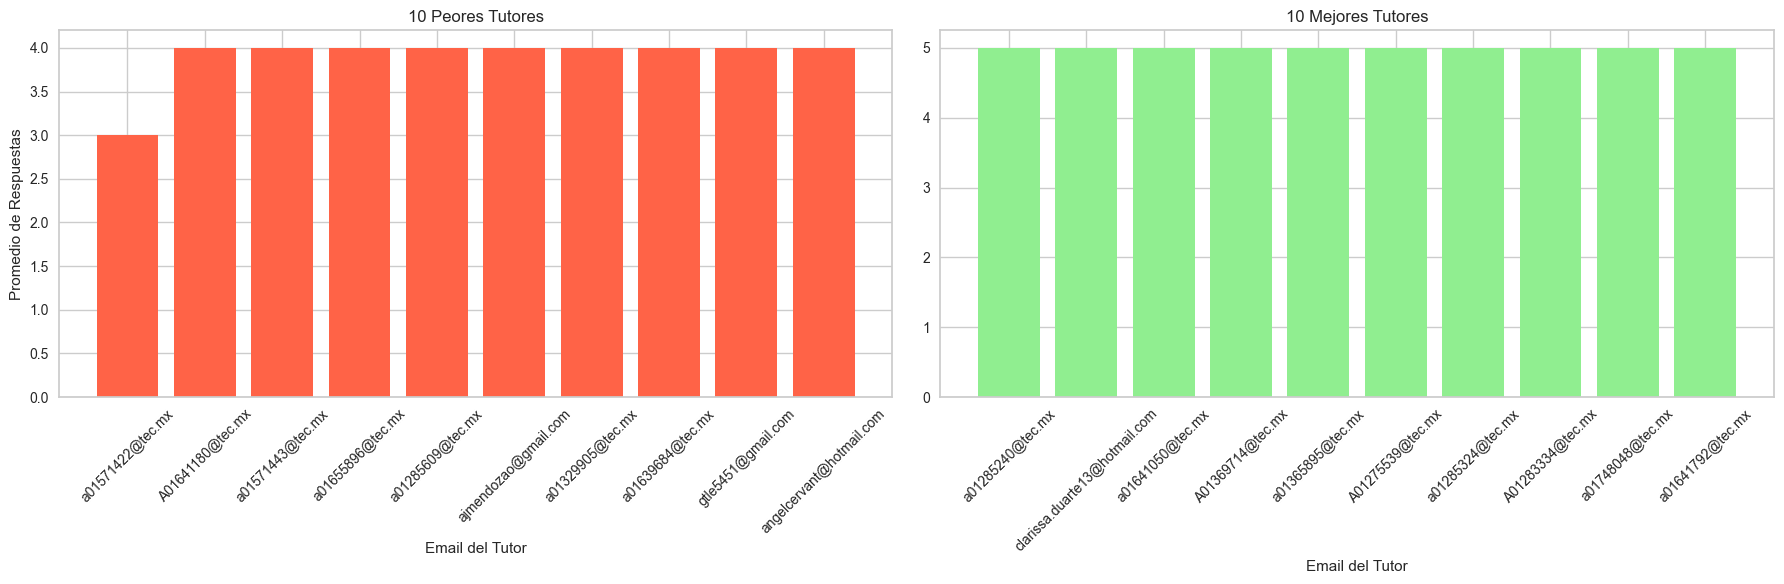

In [306]:
# Ordenando el DataFrame por 'AverageAnswerByTutor'
df_sorted_tutor = merged_df_tutor.sort_values('AverageAnswerByTutor', ascending=True)

# Como solo tenemos 4 tutores en el ejemplo, para fines ilustrativos, dividiré este conjunto para mostrar cómo lo harías.
# En un caso real, usarías df_sorted.head(10) para los 10 peores y df_sorted.tail(10) para los 10 mejores.

# Seleccionando los 2 "peores" y 2 "mejores" para nuestro ejemplo
worst_tutors = df_sorted_tutor.head(10) # En la práctica, cambiarías el 2 por 10
best_tutors = df_sorted_tutor.tail(10) # Ídem

# Graficando
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Graficando los 10 peores
axes[0].bar(worst_tutors['EmailTutor'], worst_tutors['AverageAnswerByTutor'], color='tomato')
axes[0].set_title('10 Peores Tutores')
axes[0].set_xlabel('Email del Tutor')
axes[0].set_ylabel('Promedio de Respuestas')
axes[0].tick_params(axis='x', rotation=45)

# Graficando los 10 mejores
axes[1].bar(best_tutors['EmailTutor'], best_tutors['AverageAnswerByTutor'], color='lightgreen')
axes[1].set_title('10 Mejores Tutores')
axes[1].set_xlabel('Email del Tutor')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [307]:
# Primero, asegúrate de que la columna 'Answer' sea numérica. Si es necesario, conviértela a tipo float.
dsAlumnoFinal['Answer'] = pd.to_numeric(dsAlumnoFinal['Answer'], errors='coerce')

# Calcula el promedio de la columna 'Answer'.
average_answer = dsAlumnoFinal['Answer'].mean()

# Realiza la fusión (merge) de los DataFrames.
merged_df_Alum = pd.merge(
    dsAlumnoFinal, 
    misdatosNumTutorias, 
    left_on=['evaluatedname', 'Evaluatorname'], 
    right_on=['EmailTutor', 'EmailAlumno'], 
    how='inner'
)

merged_df_Alum['ConocimientosImpartidos'] = merged_df_Alum[['Category', 'SubCatName', 'Secondcategory', 'SecondSubCatName']] \
    .astype(str) \
    .agg(' - '.join, axis=1)

# Calcula el promedio de la columna 'Answer' agrupado por tutor.
# Asumiendo que 'EmailTutor' es la columna que identifica a cada tutor.
average_answer_by_Alum = merged_df_Alum.groupby('EmailAlumno')['Answer'].mean().reset_index(name='AverageAnswerByTutor')

# Une el promedio calculado con el DataFrame principal.
merged_df_Alum = pd.merge(
    merged_df_Alum,
    average_answer_by_Alum,
    on='EmailAlumno',
    how='left'
)

# Eliminando duplicados para asegurar una única fila por cada combinación de tutor y alumno.
merged_df_Alum = merged_df_Alum.drop_duplicates(subset=['EmailTutor', 'EmailAlumno']).reset_index()

# 'average_answer' contiene el promedio de la columna 'Answer'.
# 'merged_df_tutor' ahora tiene una nueva columna 'ConocimientosImpartidos' con la información combinada.
merged_df_Alum.drop(columns=['Category', 'SubCatName', 'Secondcategory', 'SecondSubCatName', 'IDAppointment', 'Status', 'Evaluator', 'Evaluatorname', 'EvaluatorUserType', 'Evaluated', 'evaluatedname', 'evaluatedUsertype','QuestionType'
                              ,'cluster_x','ID','Minutos','Estatus','AlumnoID','TutorID','Observation','cluster_y'], inplace=True)
merged_df_Alum

C:\Users\rigob\AppData\Local\Temp\ipykernel_23996\3010301949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsAlumnoFinal['Answer'] = pd.to_numeric(dsAlumnoFinal['Answer'], errors='coerce')


index                                           Question  Answer  \
0        0  Considero que en esta sesión tuve el avance co...       5   
1        2  Considero que en esta sesión tuve el avance co...       5   
2       23  Considero que en esta sesión tuve el avance co...       1   
3       24  Considero que en esta sesión tuve el avance co...       5   
4       25   ¿Cómo calificarías la calidad del desempeño d...       5   
..     ...                                                ...     ...   
657   2409  Considero que en esta sesión tuve el avance co...       5   
658   2410  Considero que en esta sesión tuve el avance co...       5   
659   2413  Considero que en esta sesión tuve el avance co...       5   
660   2414  Considero que en esta sesión tuve el avance co...       4   
661   2415  Considero que en esta sesión tuve el avance co...       5   

      FechayHoraTutoria                  EmailAlumno        EmailTutor  \
0   2023-05-30 18:00:00             a01753728@tec.mx  a01750754@tec.mx   
1   2022-11-14 18:00:00        maryplata91@gmail.com  a01027074@tec.mx   
2   2022-10-11 10:45:00  ian.kleiman@olamiort.edu.mx  A01633290@tec.mx   
3   2023-03-13 19:20:00             a01029784@tec.mx  A01028375@tec.mx   
4   2023-03-08 18:00:00             A01026150@tec.mx  a01661433@tec.mx   
..                  ...                          ...               ...   
657 2023-03-14 18:45:00  rodrigo.marquina1@gmail.com  a01706702@tec.mx   
658 2022-11-16 15:30:00             A01754617@tec.mx  A01378405@tec.mx   
659 2023-03-15 17:00:00           A01174315@itesm.mx  a01663713@tec.mx   
660 2023-03-08 10:00:00             a01028193@tec.mx  A01198338@tec.mx   
661 2023-03-10 17:40:00          olafahg@outlook.com  a01323265@tec.mx   

                               ConocimientosImpartidos  AverageAnswerByTutor  
0    Matemáticas - Magnitudes y números reales - Pr...                   5.0  
1    Matemáticas - Cálculo de derivadas mediante re...                   5.0  
2    Matemáticas - Ecuaciones lineales - Matemática...                   1.0  
3    Matemáticas - Cálculo de derivadas mediante re...                   5.0  
4    Matemáticas - Ecuaciones lineales - Matemática...                   4.5  
..                                                 ...                   ...  
657  Matemáticas - Problemas aritméticos y algebrai...                   5.0  
658  Soporte Técnico - SoyTutor - Matemáticas - Cal...                   5.0  
659  Matemáticas - Estadística y probabilidad - Mat...                   5.0  
660  Matemáticas - Ecuaciones cuadráticas - Matemát...                   4.0  
661  Física  - Tipos de movimientos - Ciencias Soci...                   5.0  

[662 rows x 8 columns]

In [308]:
merged_df_Alum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    662 non-null    int64         
 1   Question                 662 non-null    object        
 2   Answer                   662 non-null    int64         
 3   FechayHoraTutoria        662 non-null    datetime64[ns]
 4   EmailAlumno              662 non-null    object        
 5   EmailTutor               662 non-null    object        
 6   ConocimientosImpartidos  662 non-null    object        
 7   AverageAnswerByTutor     662 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 41.5+ KB


In [309]:
nan_count = merged_df_Alum.isna().sum()
zero_count = merged_df_Alum.eq(0).sum()

# Mostrar los resultados
print("Conteo de NaN por columna:\n", nan_count)
print("\nConteo de 0 por columna:\n", zero_count)
print("\nTotal de NaN en el DataFrame:", nan_count.sum())
print("Total de 0 en el DataFrame:", zero_count.sum())

Conteo de NaN por columna:
 index                      0
Question                   0
Answer                     0
FechayHoraTutoria          0
EmailAlumno                0
EmailTutor                 0
ConocimientosImpartidos    0
AverageAnswerByTutor       0
dtype: int64

Conteo de 0 por columna:
 index                       1
Question                    0
Answer                     33
FechayHoraTutoria           0
EmailAlumno                 0
EmailTutor                  0
ConocimientosImpartidos     0
AverageAnswerByTutor       15
dtype: int64

Total de NaN en el DataFrame: 0
Total de 0 en el DataFrame: 49


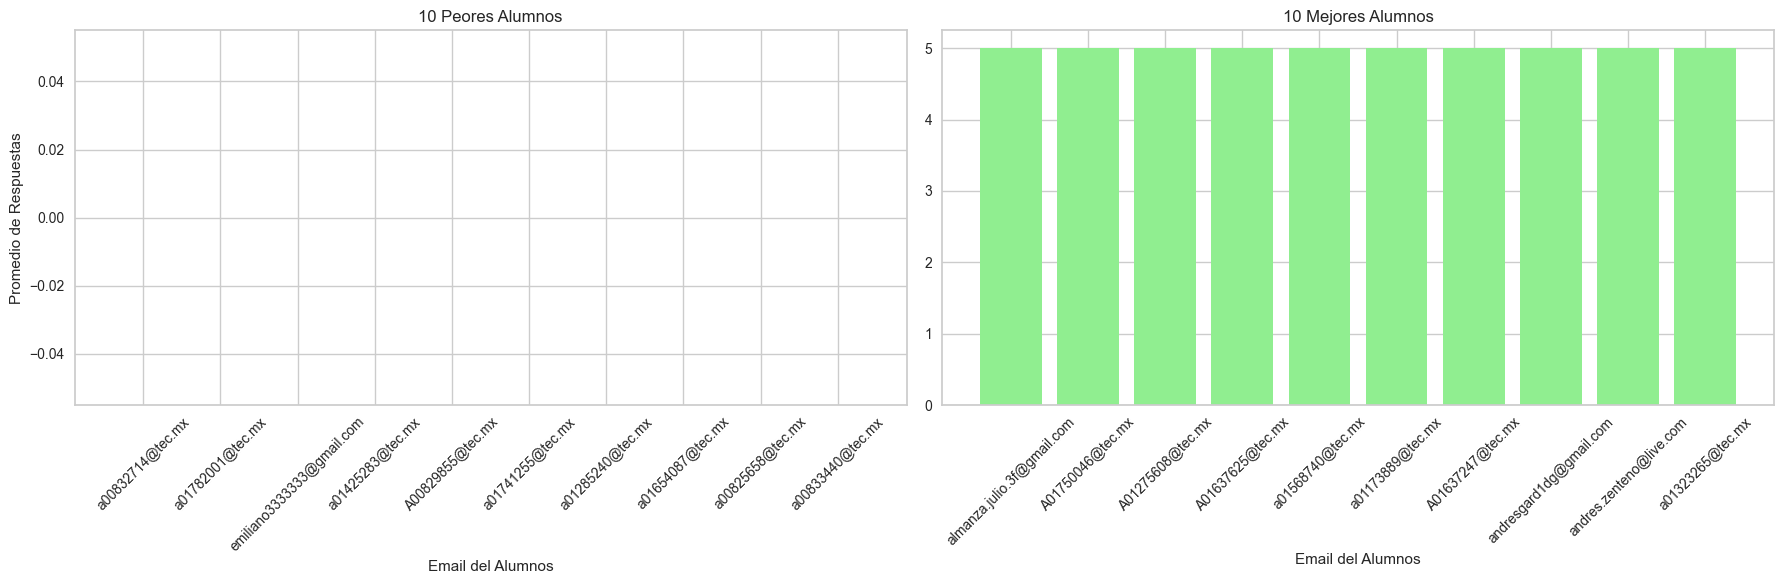

In [310]:
# Ordenando el DataFrame por 'AverageAnswerByTutor'
df_sorted_alum = merged_df_Alum.sort_values('AverageAnswerByTutor', ascending=True)

# Como solo tenemos 4 tutores en el ejemplo, para fines ilustrativos, dividiré este conjunto para mostrar cómo lo harías.
# En un caso real, usarías df_sorted.head(10) para los 10 peores y df_sorted.tail(10) para los 10 mejores.

# Seleccionando los 2 "peores" y 2 "mejores" para nuestro ejemplo
worst_Alumn = df_sorted_alum.head(10) # En la práctica, cambiarías el 2 por 10
best_Alum = df_sorted_alum.tail(10) # Ídem

# Graficando
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Graficando los 10 peores
axes[0].bar(worst_Alumn['EmailTutor'], worst_Alumn['AverageAnswerByTutor'], color='tomato')
axes[0].set_title('10 Peores Alumnos')
axes[0].set_xlabel('Email del Alumnos')
axes[0].set_ylabel('Promedio de Respuestas')
axes[0].tick_params(axis='x', rotation=45)

# Graficando los 10 mejores
axes[1].bar(best_Alum['EmailTutor'], best_Alum['AverageAnswerByTutor'], color='lightgreen')
axes[1].set_title('10 Mejores Alumnos')
axes[1].set_xlabel('Email del Alumnos')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Los DataFrames para los científicos de datos, ingenieros industriales e ingenieros de software han sido cargados correctamente y cada uno contiene una columna jobdescription que proporciona descripciones de los puestos de trabajo. Para extraer palabras clave que indiquen qué se espera de cada puesto, se puede realizar un análisis de texto básico.

Un enfoque sencillo sería identificar palabras o frases frecuentes en las descripciones de los trabajos. Este proceso puede incluir:

Limpiar el texto: Eliminar etiquetas HTML, signos de puntuación, y convertir el texto a minúsculas.
Dividir el texto en palabras (tokenización).
Contar la frecuencia de cada palabra y seleccionar las más comunes.
Este análisis puede proporcionar una visión general de los temas o habilidades comúnmente mencionados en las descripciones de los trabajos. Sin embargo, para obtener una lista más precisa de competencias técnicas o habilidades específicas, se podrían aplicar técnicas más avanzadas de procesamiento de lenguaje natural.

Se va a realizar un análisis básico de frecuencia de palabras para cada DataFrame. Este análisis proporcionará una idea de las palabras clave más comunes en las descripciones de los trabajos. Sin embargo, ten en cuenta que este enfoque puede incluir palabras comunes que no son específicamente competencias o habilidades técnicas. ​​

Científicos de Datos:

Las palabras más comunes incluyen "data", "and", "to", "of", "the", "in", "for", "a", "or", "with".
Es interesante observar que "data" es una palabra clave prominente, lo que indica una fuerte orientación hacia el trabajo con datos.
Ingenieros Industriales:

Las palabras más comunes incluyen "and", "to", "in", "of", "the", "industrial", "for", "a", "amp", "engineering".
Las palabras "industrial" y "engineering" destacan, sugiriendo un enfoque en la ingeniería industrial.
Ingenieros de Software:

Las palabras más comunes incluyen "and", "to", "software", "in", "of", "the", "or", "for", "amp", "a".
La palabra "software" es notablemente común, lo que refleja un énfasis en el desarrollo de software.
Ten en cuenta que este análisis incluye palabras comunes de relleno (como "and", "to", "of", "the", "in") que no son específicas de las competencias o habilidades técnicas. ​

In [136]:
data_scientists_df = pd.read_csv(r"C:\Users\rigob\OneDrive\Documents\Maestria2\Trimestre 6\Proyecto\datascientists.csv")
industrial_engineers_df = pd.read_csv(r"C:\Users\rigob\OneDrive\Documents\Maestria2\Trimestre 6\Proyecto\industrial_engineers.csv")
software_engineers_df = pd.read_csv(r"C:\Users\rigob\OneDrive\Documents\Maestria2\Trimestre 6\Proyecto\software_engineers.csv")


# Descargar stopwords
nltk.download('stopwords')

# Extender la lista de stopwords con términos específicos irrelevantes
extended_common_words = set(stopwords.words('english')) | {'amp', 'unhidewhenusedfalse', 'lockedfalse', 'wlsdexception', 'priority', 'semihiddenfalse','year', 'years', 
                                                           'experience','yrs','experience', 'years', 'work', 'job', 'related', 'must', 'exp', 'degree','accent', 'inc', 'ca','nbsp',
                                                           'apply', 'new', 'using','position', 'resume', 'time', 'preferred','resume', 'using', 'new','big','team',
                                                           'candidates', 'jose', 'seek', 'information', 'equal','bull','namemedium','role','req','various', 'several', 'large', 'numerous', 'candidate', 'seek', 
                                                           'including', 'equivalent', 'opportunity', 'ability', 'role', 'duties', 'responsibilities', 'requirements','field','wwwjobpostingtodaycom','hr','yr','well',
                                                           'salesforce','walmart','salary','spring','across','per','senior','skills','zero', 'one', 'two', 'three', 'four', 'five','six', 'seven', 'eight', 'nine', 'ten',
                                                           'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen','sixteen', 'seventeen', 'eighteen', 'nineteen', 'twenty','thirty', 'forty', 'fifty', 'sixty', 
                                                           'seventy', 'eighty', 'ninety','hundred', 'thousand', 'million', 'billion', 'trillion','sw','seeks','sunnyvale','mdash','list','telescope','office','care','xml',
                                                           'childrens','attn','incl','multiple','del','engg','staff','san','resumes','sci','followers','coordinate','utilizing','working','eoe','websphere','webbased','cvr',
                                                           'company','development','develop','developer','andor','january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october',
                                                           'november', 'december','lead','will', 'would', 'can', 'could', 'shall', 'should', 'may', 'might', 'must', 'ought',
    'a', 'the', 'an', 'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'its', 'our', 'their',
    'what', 'which', 'who', 'whom', 'whose', 'whichever', 'whoever', 'whomever',
    'am', 'is', 'are', 'was', 'were', 'be', 'being', 'been',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'about', 'above', 'across', 'after', 'against', 'along', 'amid', 'among', 'around', 'at', 'before', 'behind', 'below',
    'beneath', 'beside', 'between', 'beyond', 'but', 'by', 'concerning', 'considering', 'despite', 'down', 'during',
    'except', 'for', 'from', 'in', 'inside', 'into', 'like', 'near', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over',
    'past', 'regarding', 'since', 'through', 'throughout', 'to', 'toward', 'under', 'underneath', 'until', 'up', 'upon',
    'with', 'within', 'without',
    'i', 'me', 'you', 'he', 'him', 'she', 'it', 'we', 'us', 'they', 'them',
    'myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves',
    'mine', 'yours', 'his', 'hers', 'ours', 'theirs',
    'all', 'another', 'any', 'anybody', 'anyone', 'anything', 'each', 'either', 'everybody', 'everyone', 'everything', 'both',
    'few', 'many', 'neither', 'nobody', 'none', 'no one', 'nothing', 'one', 'other', 'others', 'several', 'some', 'somebody',
    'someone', 'something', 'such',
    'fewer', 'little', 'much', 'more', 'most', 'several', 'some', 'such',
    'there', 'here', 'where', 'when', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'so','full','changes'}

def clean_text(text):
    text = re.sub('<.*?>', '', text)  # Eliminar etiquetas HTML
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\b[^c\s]\b', '', text)  # Eliminar palabras de una sola letra que no sean 'c'
    text = re.sub(r'\b\w{2}\b', '', text)  # Eliminar palabras de dos letras
    text = re.sub(r'\b\w+ing\b', '', text)  # Eliminar palabras que terminan en 'ing'
    return text
# Función para remover palabras comunes
def remove_common_words(counter, common_words):
    return Counter({word: freq for word, freq in counter.items() if word not in common_words})


def remove_common_words(counter, common_words):
    return Counter({word: freq for word, freq in counter.items() if word not in common_words})

def extract_keywords(text):
    words = re.findall(r'\w+', clean_text(text))
    return Counter(words)


# Aplicar extracción de palabras clave a las descripciones de trabajo
ds_keywords = extract_keywords(' '.join(data_scientists_df['jobdescription']))
ie_keywords = extract_keywords(' '.join(industrial_engineers_df['jobdescription']))
se_keywords = extract_keywords(' '.join(software_engineers_df['jobdescription']))

# Eliminar palabras comunes
ds_keywords_filtered = remove_common_words(ds_keywords, extended_common_words)
ie_keywords_filtered = remove_common_words(ie_keywords, extended_common_words)
se_keywords_filtered = remove_common_words(se_keywords, extended_common_words)

# Obtener las 10 palabras más comunes después de quitar las palabras comunes
ds_top_keywords_filtered = ds_keywords_filtered.most_common(300)
ie_top_keywords_filtered = ie_keywords_filtered.most_common(300)
se_top_keywords_filtered = se_keywords_filtered.most_common(300)

ds_top_keywords_filtered, ie_top_keywords_filtered, se_top_keywords_filtered



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rigob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


([('data', 833),
  ('science', 210),
  ('research', 130),
  ('analytics', 125),
  ('scientist', 99),
  ('business', 97),
  ('software', 94),
  ('engineer', 86),
  ('computer', 82),
  ('design', 81),
  ('solutions', 65),
  ('systems', 62),
  ('statistical', 61),
  ('analysis', 58),
  ('sql', 57),
  ('management', 52),
  ('statistics', 51),
  ('support', 49),
  ('university', 48),
  ('machine', 46),
  ('requires', 46),
  ('applications', 45),
  ('python', 44),
  ('models', 42),
  ('tools', 40),
  ('grid', 40),
  ('faculty', 39),
  ('required', 38),
  ('enterprise', 37),
  ('algorithms', 34),
  ('projects', 34),
  ('processes', 34),
  ('masters', 34),
  ('provide', 33),
  ('strong', 33),
  ('computational', 33),
  ('etl', 33),
  ('students', 32),
  ('transform', 32),
  ('predictive', 32),
  ('plus', 32),
  ('performance', 31),
  ('seattle', 31),
  ('implement', 31),
  ('product', 31),
  ('quantitative', 31),
  ('sources', 30),
  ('teams', 30),
  ('mathematics', 30),
  ('positions', 30),
 

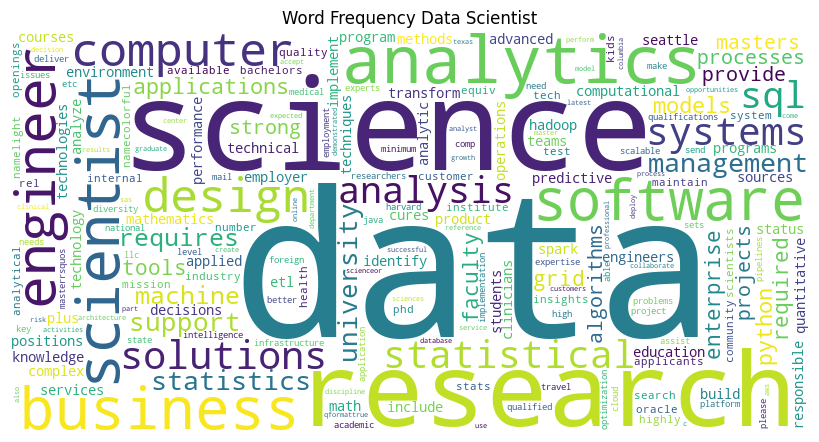

In [137]:
from wordcloud import WordCloud


word_freq_dict = dict(ds_top_keywords_filtered)


wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq_dict)

                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Word Frequency Data Scientist")
plt.axis("off") 
plt.tight_layout(pad = 0) 

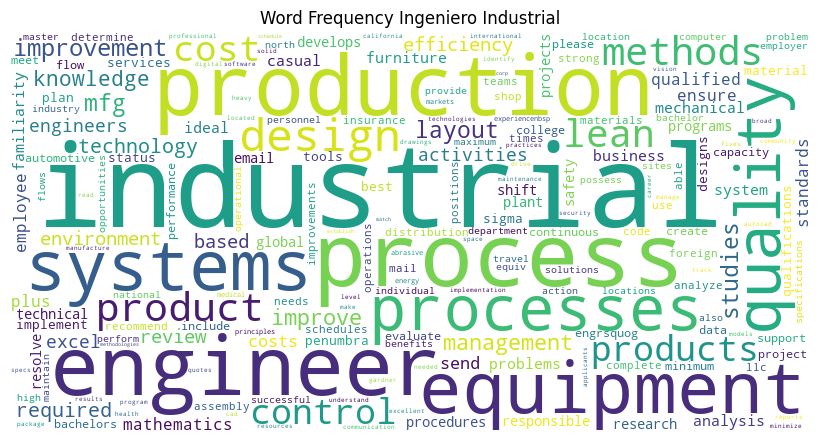

In [138]:
word_freq_dict = dict(ie_top_keywords_filtered)


wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq_dict)

                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Word Frequency Ingeniero Industrial")
plt.axis("off") 
plt.tight_layout(pad = 0) 

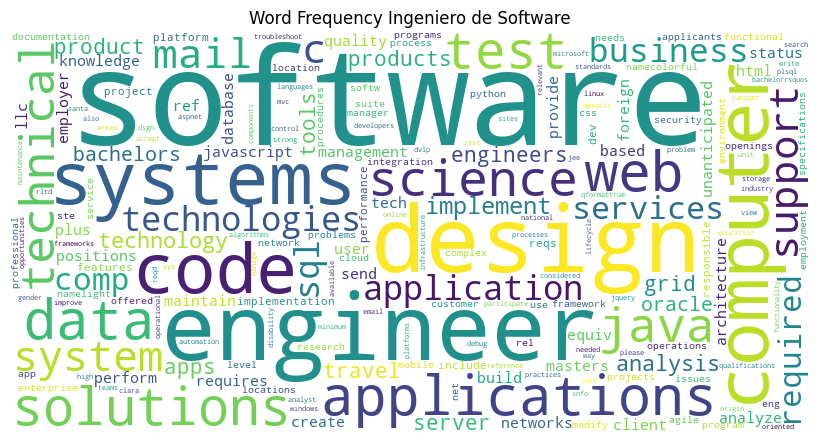

In [139]:
word_freq_dict = dict(se_top_keywords_filtered)


wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq_dict)

                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Word Frequency Ingeniero de Software")
plt.axis("off") 
plt.tight_layout(pad = 0) 

Traducimos las palabras al idioma español

In [140]:
df_ds = pd.DataFrame(ds_top_keywords_filtered, columns=['Palabra', 'Frecuencia'])
df_ie = pd.DataFrame(ie_top_keywords_filtered, columns=['Palabra', 'Frecuencia'])
df_se = pd.DataFrame(se_top_keywords_filtered, columns=['Palabra', 'Frecuencia'])

df_ds.to_excel("ds_top_keywords_filtered.xlsx", index=False)
df_ie.to_excel("ie_top_keywords_filtered.xlsx", index=False)
df_se.to_excel("se_top_keywords_filtered.xlsx", index=False)

In [141]:
import json
import deepl

# Leer el archivo config.json y extraer la clave API
with open('KeyDeepL.json', 'r') as file:
    config = json.load(file)
    deepl_auth_key = config['deepl_auth_key']

# Inicializar el traductor de DeepL con la clave API
translator = deepl.Translator(deepl_auth_key)

In [142]:


def translate_keywords_only_words(keywords, dest_language='ES'):  # Asumiendo que quieres traducir al español
    translated_keywords = []
    for word, _ in keywords:  # Ignorando la parte de frecuencia
        try:
            result = translator.translate_text(word, target_lang=dest_language)
            translated_keywords.append(result.text)
        except Exception as e:
            translated_keywords.append(f"Error: {str(e)}")
    return translated_keywords

# Ejemplo de uso, asegúrate de que `ds_top_keywords_filtered` y otros sean listas de tuplas (palabra, frecuencia)
translated_ds_keywords = translate_keywords_only_words(ds_top_keywords_filtered, 'ES')  # Traduce al español
translated_ie_keywords = translate_keywords_only_words(ie_top_keywords_filtered, 'ES')
translated_se_keywords = translate_keywords_only_words(se_top_keywords_filtered, 'ES')

# Imprime los resultados para verificación
print(translated_ds_keywords, translated_ie_keywords, translated_se_keywords)


['datos', 'ciencia', 'investigación', 'análisis', 'científico', 'empresa', 'software', 'ingeniero', 'ordenador', 'diseño', 'soluciones', 'sistemas', 'estadística', 'análisis', 'sql', 'gestión', 'estadísticas', 'soporte', 'universidad', 'máquina', 'requiere', 'aplicaciones', 'python', 'modelos', 'herramientas', 'cuadrícula', 'profesorado', 'obligatorio', 'empresa', 'algoritmos', 'proyectos', 'procesa', 'masters', 'proporcionar', 'fuerte', 'computacional', 'etl', 'estudiantes', 'transform', 'predictivo', 'más', 'rendimiento', 'seattle', 'implementar', 'producto', 'cuantitativo', 'fuentes', 'equipos', 'matemáticas', 'puestos', 'responsable', 'tecnologías', 'conocimiento', 'cura', 'educación', 'métodos', 'medio ambiente', 'técnico', 'aplicado', 'incluir', 'ingenieros', 'técnicas', 'decisiones', 'hadoop', 'complejo', 'identificar', 'empresario', 'programa', 'servicios', 'estado', 'programas', 'médicos', 'operaciones', 'tecnología', 'chispa', 'carreras', 'avanzado', 'matemáticas', 'analítica

In [163]:
len(translated_ds_keywords)

300

In [164]:
# Crear DataFrame con las aptitudes traducidas
carreras_top_caracteristicas = pd.DataFrame({
    'Vacante': ['Científico de Datos', 'Ingeniero Industrial', 'Ingeniero de Software'],
    'Aptitudes': [translated_ds_keywords, translated_ie_keywords, translated_se_keywords]
})

carreras_top_caracteristicas

Vacante                                          Aptitudes
0    Científico de Datos  [datos, ciencia, investigación, análisis, cien...
1   Ingeniero Industrial  [industrial, proceso, producción, ingeniero, e...
2  Ingeniero de Software  [software, ingeniero, diseño, sistemas, ordena...

c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                 Vacante  Cluster
0    Científico de Datos        2
1   Ingeniero Industrial        0
2  Ingeniero de Software        1


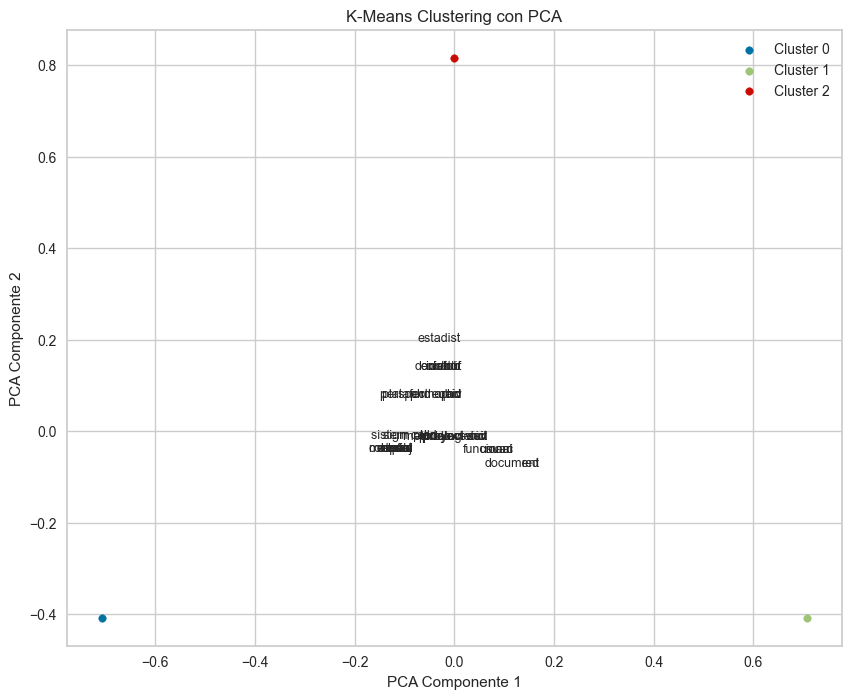

In [165]:

# Concatena todas las listas de aptitudes en una sola lista de strings, una por vacante
aptitudes_text = [' '.join(aptitudes) for aptitudes in carreras_top_caracteristicas['Aptitudes']]

def custom_preprocessor(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    # Dividir el texto en palabras y eliminar las que están en la lista extendida de stopwords
    words = text.split()
    words = [word for word in words if word not in extended_common_words]
    # Volver a unir las palabras en una cadena de texto
    text = ' '.join(words)
    return text



def custom_tokenizer(text):
    stemmer = SnowballStemmer('spanish')
    words = word_tokenize(text)
    return [stemmer.stem(word) for word in words]

vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"),
                             ngram_range=(1, 2),
                             max_df=0.5,
                             min_df=0.1,
                             max_features=500,  # Ajustar el número de características
                             preprocessor=custom_preprocessor,
                             tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(aptitudes_text)

# K-Means Clustering
n_clusters = len(carreras_top_caracteristicas['Vacante'].unique())  # Un cluster por categoría de vacante
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Asignar los clusters a cada vacante
carreras_top_caracteristicas['Cluster'] = kmeans.labels_

# Analizar los resultados
print(carreras_top_caracteristicas[['Vacante', 'Cluster']])

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Graficar los clusters
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    # Puntos del cluster
    points = reduced_data[kmeans.labels_ == i]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i}')
    
    # Anotar con las palabras más representativas
    # Identificar las palabras más representativas para cada cluster
    words = vectorizer.get_feature_names_out()
    top_word_indices = kmeans.cluster_centers_.argsort()[:, -1:-11:-1][i]  # Índices de las 10 palabras más representativas
    top_words = [words[index] for index in top_word_indices]
    for word_index in top_word_indices:
        plt.annotate(words[word_index], 
                     xy=(pca.components_[0, word_index], pca.components_[1, word_index]),
                     xytext=(5, 2), 
                     textcoords='offset points',
                     ha='right', 
                     va='bottom',
                     fontsize=9)

plt.title('K-Means Clustering con PCA')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.legend()
plt.show()

In [166]:
# Vectorizamos los conocimientos impartidos de los tutores
tutores_vectorizados = vectorizer.transform(merged_df_tutor['ConocimientosImpartidos'])

# Usamos el modelo K-Means para asignar a cada tutor el cluster que mejor representa sus conocimientos.
merged_df_tutor['Cluster'] = kmeans.predict(tutores_vectorizados)


# Asignar clusters a las vacantes
carreras_top_caracteristicas['Cluster'] = kmeans.predict(X)

# Calcular la carrera más representativa para cada cluster
carrera_por_cluster = {}
for cluster in carreras_top_caracteristicas['Cluster'].unique():
    carreras_en_cluster = carreras_top_caracteristicas[carreras_top_caracteristicas['Cluster'] == cluster]['Vacante']
    carrera_mas_frecuente = carreras_en_cluster.mode()[0]
    carrera_por_cluster[cluster] = carrera_mas_frecuente

# Comparar los clusters de los tutores con las carreras más representativas de cada cluster
for index, row in merged_df_tutor.iterrows():
    tutor_cluster = row['Cluster']
    carrera_recomendada = carrera_por_cluster[tutor_cluster]
    print(f"Tutor: {row['EmailTutor']} - Cluster: {tutor_cluster} - Carrera Recomendada: {carrera_recomendada}")

Tutor: a01178149@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A01737094@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A00835528@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: a01658305@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: a00832646@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A01633290@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A01633290@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A01633821@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A01625764@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A01197808@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: johannacg@yahoo.com - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A01750046@tec.mx - Cluster: 2 - Carrera Recomendada: Científico de Datos
Tutor: A00836197@tec.mx - Cluster: 2 

In [167]:
usuario_excluir = 'A01636057@tec.mx'

# Filtrar el DataFrame para excluir este usuario
df_filtrado = merged_df_tutor.loc[merged_df_tutor['EmailTutor'] == usuario_excluir,'ConocimientosImpartidos']

df_filtrado

684    Química - Tabla periódica - Química - Enlaces ...
Name: ConocimientosImpartidos, dtype: object

In [168]:
translated_ds_keywords = [elemento for elemento in translated_ds_keywords if "Error: 'NoneType' object is not iterable" not in elemento]
translated_ie_keywords = [elemento for elemento in translated_ie_keywords if "Error: 'NoneType' object is not iterable" not in elemento]
translated_se_keywords = [elemento for elemento in translated_se_keywords if "Error: 'NoneType' object is not iterable" not in elemento]

df_ds = pd.DataFrame(translated_ds_keywords, columns=['Palabra'])
df_ie = pd.DataFrame(translated_ie_keywords, columns=['Palabra'])
df_se = pd.DataFrame(translated_se_keywords, columns=['Palabra'])

df_ds.to_excel("translated_ds_keywords.xlsx", index=False)
df_ie.to_excel("translated_ie_keywords.xlsx", index=False)
df_se.to_excel("translated_se_keywords.xlsx", index=False)




In [169]:
# Creamos un nuevo DataFrame para almacenar los resultados
nuevas_filas = []

# Iteramos sobre cada fila del DataFrame original
for index, row in carreras_top_caracteristicas.iterrows():
    vacante = row['Vacante']
    aptitudes = row['Aptitudes']  # Aptitudes ya es una lista

    # Creamos una nueva fila para cada aptitud
    for aptitud in aptitudes:
        nuevas_filas.append({'Vacante': vacante, 'Aptitud': aptitud})

# Convertimos la lista de nuevas filas en un DataFrame
df_expandido_Carreras = pd.DataFrame(nuevas_filas)

df_expandido_Carreras

Vacante        Aptitud
0      Científico de Datos          datos
1      Científico de Datos        ciencia
2      Científico de Datos  investigación
3      Científico de Datos       análisis
4      Científico de Datos     científico
..                     ...            ...
895  Ingeniero de Software     beneficios
896  Ingeniero de Software    actividades
897  Ingeniero de Software   metodologías
898  Ingeniero de Software         visite
899  Ingeniero de Software     viabilidad

[900 rows x 2 columns]

In [170]:
y = df_expandido_Carreras[["Vacante"]]
x = df_expandido_Carreras[["Aptitud"]]

x



Aptitud
0            datos
1          ciencia
2    investigación
3         análisis
4       científico
..             ...
895     beneficios
896    actividades
897   metodologías
898         visite
899     viabilidad

[900 rows x 1 columns]

In [171]:
conocimientos = merged_df_tutor[['ConocimientosImpartidos']]
conocimientos


ConocimientosImpartidos
0    Química - Enlaces químicos e interacciones int...
1    Matemáticas - Problemas aritméticos y algebrai...
2    Física  - Leyes de los movimientos - Ciencias ...
3    Programación - C/C++ - Matemáticas - Aplicació...
4    Química - Modelo atómico y sus aplicaciones - ...
..                                                 ...
683  Preparación a la Universidad - ITESM - Ciencia...
684  Química - Tabla periódica - Química - Enlaces ...
685  Matemáticas - Problemas aritméticos y algebrai...
686  Matemáticas - Calculo - Química - Nomenclatura...
687  Matemáticas - Calculo - Matemáticas - Aplicaci...

[688 rows x 1 columns]

### Explicacion del codigo
Preparación de datos:

Primero, el usuario crea un objeto TfidfVectorizer, que es una herramienta para convertir una colección de documentos de texto brutos en una matriz de características TF-IDF (Frecuencia de término - Inversa de frecuencia de documento). Esta técnica pondera las palabras (términos) de manera que las palabras que son comunes en todos los documentos reciben una importancia menor, mientras que las palabras únicas reciben una importancia mayor. El vectorizador se ajusta a una columna 'Aptitud' de un DataFrame df_expandido_Carreras que contiene datos textuales, ignorando las palabras de parada en inglés.
Agrupamiento:

Luego, el usuario inicializa y ajusta un modelo KMeans con 3 clústeres. El estado aleatorio se fija en 42 para garantizar la reproducibilidad de los resultados. El modelo se ajusta a la matriz de características TF-IDF calculada, lo que resulta en la agrupación de los datos en 3 grupos distintos. Las etiquetas de clúster asignadas a cada punto de datos se agregan al DataFrame original como una nueva columna llamada 'Cluster'.
Asignación de Carreras a Clústeres:

Después del paso de agrupamiento, el usuario crea un mapeo manual que asigna cada clúster a una carrera específica basándose en la interpretación de las características de cada clúster. Esto se hace con un diccionario que mapea etiquetas de clústeres a títulos de carrera y luego aplicando este mapeo al DataFrame para crear una nueva columna 'AssignedCareer'.
Visualización de los Clústeres:

Para visualizar los clústeres en un espacio bidimensional, el usuario aplica PCA (Análisis de Componentes Principales) a la matriz de características para reducir su dimensionalidad a dos componentes. Esto se hace con el objeto PCA que se ajusta a los datos y luego se transforma en un conjunto de datos de menor dimensión. El resultado de la reducción de la dimensionalidad se visualiza utilizando un gráfico de dispersión, donde cada punto representa una aptitud, y el color del punto corresponde al clúster asignado.
Mostrar DataFrame Resultante:

Finalmente, el script está configurado para mostrar el DataFrame df_expandido_Carreras, que ahora incluiría las columnas originales, más las etiquetas de clúster asignadas y las carreras asignadas correspondientes.

### Grafico

Aquí hay algunos puntos clave que podemos inferir del gráfico:

Agrupamiento: Hay claramente un grupo dominante de puntos que están agrupados cerca del origen (cerca de 0 en PCA Componente 1 y PCA Componente 2). Esto indica que el algoritmo KMeans ha encontrado que estos puntos tienen características similares en el espacio reducido de PCA.

Punto atípico: Hay un punto distante (en turquesa claro) que ha sido asignado a su propio clúster. Este podría ser un punto atípico (outlier) en el conjunto de datos original o representar una variación significativa que lo distingue del grupo principal.

Número de clústeres: La barra de colores indica la existencia de posiblemente tres clústeres (asumiendo que los colores corresponden a diferentes clústeres). Sin embargo, solo se ve claramente un segundo clúster (el punto atípico). Es posible que haya un tercer clúster que no es visible en esta visualización o que los puntos del grupo principal puedan pertenecer a más de un clúster, pero están sobrepuestos y no se distinguen claramente en esta visualización bidimensional.

PCA Componentes: Los ejes 'PCA Componente 1' y 'PCA Componente 2' representan las direcciones de máxima varianza en el conjunto de datos transformado. Estos no son los atributos originales del conjunto de datos, sino combinaciones lineales de ellos que explican la mayor parte de la varianza.

Interpretación: Para interpretar los resultados de manera significativa, necesitaríamos entender los componentes originales del conjunto de datos y cómo se relacionan con los componentes principales derivados del PCA. Además, sería útil saber cuántos clústeres se especificaron para el algoritmo KMeans y tener conocimiento del contexto de los datos (por ejemplo, qué representan las aptitudes).

c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

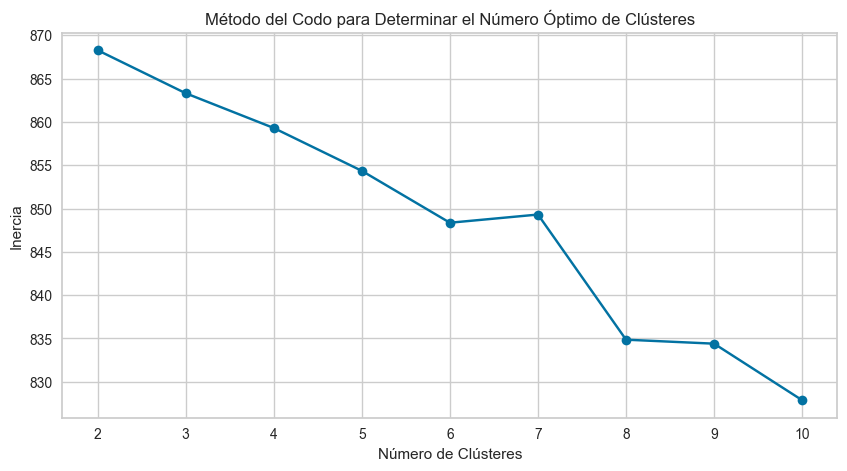

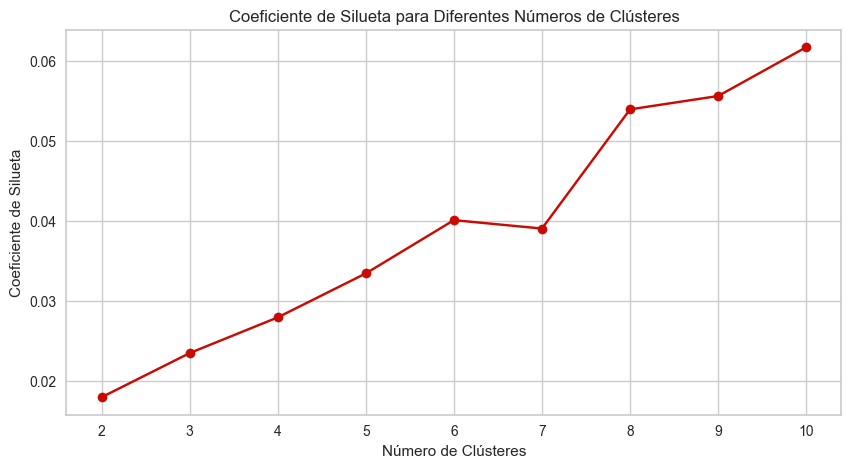

In [182]:
# Extender la lista de stopwords con términos específicos irrelevantes
extended_common_words = set(stopwords.words('spanish')) | {'desarrollo', 'empresa','mejor','desarroll'}

def custom_preprocessor(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    # Dividir el texto en palabras y eliminar las que están en la lista extendida de stopwords
    words = text.split()
    words = [word for word in words if word not in extended_common_words]
    # Volver a unir las palabras en una cadena de texto
    text = ' '.join(words)
    return text
# Suponiendo que `df` es tu DataFrame y ya contiene las columnas 'Vacante' y 'Aptitud'
# Preprocesamiento simplificado, se debe expandir según las necesidades
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df_expandido_Carreras['Aptitud'] = df_expandido_Carreras['Aptitud'].apply(clean_text)

def custom_tokenizer(text):
    stemmer = SnowballStemmer('spanish')
    words = word_tokenize(text)
    return [stemmer.stem(word) for word in words]

# Asumiendo que ya has definido custom_preprocessor y custom_tokenizer de acuerdo a tus necesidades
vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"), preprocessor=custom_preprocessor, tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(df_expandido_Carreras['Aptitud'])
# Suponiendo que 'X' ya está definido como la matriz TF-IDF de las aptitudes procesadas

# Rango de valores para el número de clústeres
range_n_clusters = list(range(2, 11))

# Lista para almacenar los valores medios de los coeficientes de silueta para cada k
silhouette_avg_scores = []

# Lista para almacenar las inercias (suma de las distancias al cuadrado desde cada punto hasta su centroide)
inertias = []

for n_clusters in range_n_clusters:
    # Ejecutar KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    # Calcular la inercia y añadirla a la lista de inercias
    inertias.append(kmeans.inertia_)
    
    # Calcular el coeficiente de silueta y añadirlo a la lista
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_avg_scores.append(silhouette_avg)

# Gráfica de la inercia ('Elbow Method')
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Gráfica de los coeficientes de silueta
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', color='r')
plt.title('Coeficiente de Silueta para Diferentes Números de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()

c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           Aptitud                Vacante       Vacante_Cluster
0            datos    Científico de Datos  Ingeniero Industrial
1          ciencia    Científico de Datos  Ingeniero Industrial
2    investigación    Científico de Datos  Ingeniero Industrial
3         análisis    Científico de Datos  Ingeniero Industrial
4       científico    Científico de Datos  Ingeniero Industrial
..             ...                    ...                   ...
895     beneficios  Ingeniero de Software  Ingeniero Industrial
896    actividades  Ingeniero de Software  Ingeniero Industrial
897   metodologías  Ingeniero de Software  Ingeniero Industrial
898         visite  Ingeniero de Software  Ingeniero Industrial
899     viabilidad  Ingeniero de Software  Ingeniero Industrial

[900 rows x 3 columns]


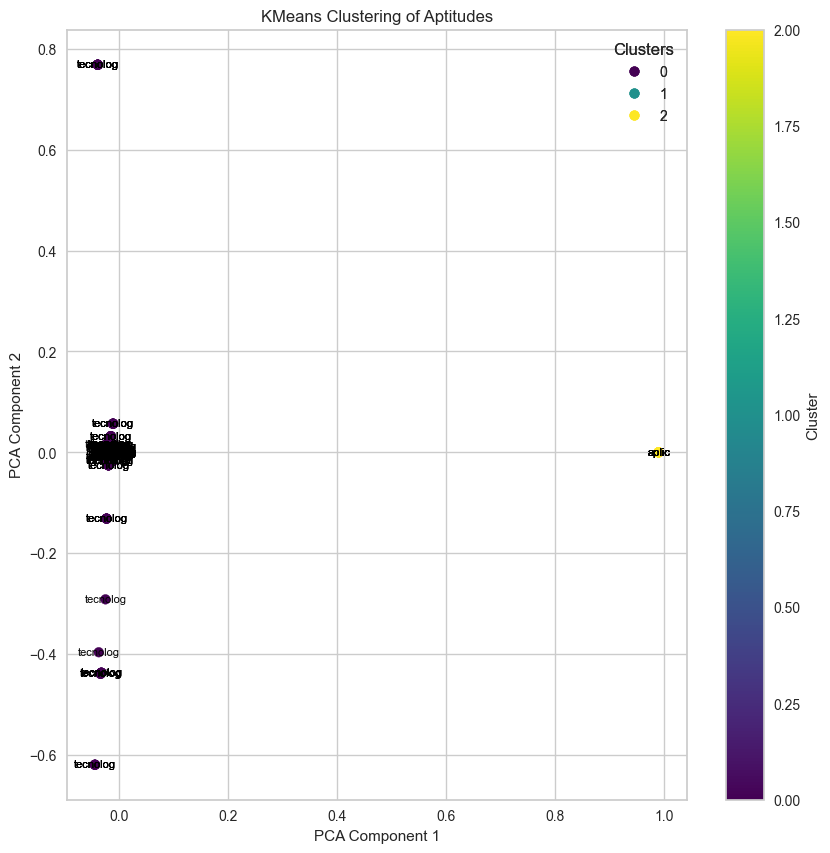

In [183]:

# Extender la lista de stopwords con términos específicos irrelevantes
extended_common_words = set(stopwords.words('spanish')) | {'desarrollo', 'empresa','mejor','desarroll'}

def custom_preprocessor(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    # Dividir el texto en palabras y eliminar las que están en la lista extendida de stopwords
    words = text.split()
    words = [word for word in words if word not in extended_common_words]
    # Volver a unir las palabras en una cadena de texto
    text = ' '.join(words)
    return text
# Suponiendo que `df` es tu DataFrame y ya contiene las columnas 'Vacante' y 'Aptitud'
# Preprocesamiento simplificado, se debe expandir según las necesidades
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df_expandido_Carreras['Aptitud'] = df_expandido_Carreras['Aptitud'].apply(clean_text)

def custom_tokenizer(text):
    stemmer = SnowballStemmer('spanish')
    words = word_tokenize(text)
    return [stemmer.stem(word) for word in words]

# Asumiendo que ya has definido custom_preprocessor y custom_tokenizer de acuerdo a tus necesidades
vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"), preprocessor=custom_preprocessor, tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(df_expandido_Carreras['Aptitud'])

# Ejecutar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajusta el número de clusters según sea necesario
kmeans.fit(X)

# Asignar cada aptitud a su cluster
df_expandido_Carreras['Cluster'] = kmeans.labels_

# Mapear los clusters a las categorías de vacantes más frecuentes
cluster_mapping = df_expandido_Carreras.groupby('Cluster')['Vacante'].agg(lambda x: x.value_counts().index[0])
df_expandido_Carreras['Vacante_Cluster'] = df_expandido_Carreras['Cluster'].map(cluster_mapping)

# Mostrar los resultados
print(df_expandido_Carreras[['Aptitud', 'Vacante', 'Vacante_Cluster']])


#Identificar las palabras más representativas para cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Visualización usando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Si decides probar t-SNE en lugar de PCA para la reducción de dimensionalidad:

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_data_tsne = tsne.fit_transform(X.toarray())

# Graficar
plt.figure(figsize=(10, 10))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')

# Título y etiquetas
plt.title('KMeans Clustering of Aptitudes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Añadir las palabras más representativas al gráfico
for i in range(reduced_data.shape[0]):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], 
             terms[order_centroids[kmeans.labels_[i], 0]], 
             ha='center', va='center', size=8, color='black')

# Crear una leyenda con los nombres de los clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.colorbar(scatter, label='Cluster')
plt.show()

In [184]:


# Asumiendo que 'df_expandido_Carreras' y el proceso de clustering ya están definidos.

# Contar cuántos objetos fueron asignados a cada cluster
cluster_counts = df_expandido_Carreras['Cluster'].value_counts()
print("Cantidad de objetos asignados a cada cluster:")
print(cluster_counts)

# Evaluación del modelo KMeans usando el coeficiente de silueta
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("El coeficiente de silueta promedio es:", silhouette_avg)

Cantidad de objetos asignados a cada cluster:
Cluster
0    887
2     10
1      3
Name: count, dtype: int64
El coeficiente de silueta promedio es: 0.023523988016144005


Este fragmento de código es una continuación del proceso de agrupamiento KMeans anterior. Aquí, el usuario está interesado en inspeccionar los términos o palabras clave que caracterizan a cada clúster generado por el algoritmo de KMeans. El propósito es obtener una mejor comprensión de lo que distingue a cada clúster, probablemente con la intención de interpretar los temas o conceptos subyacentes dentro de los datos de texto que han sido agrupados.

Extracción de Características:

El usuario obtiene primero los nombres de las características (palabras o términos) del modelo TfidfVectorizer que se utilizó para transformar los datos textuales en una matriz TF-IDF. Esto se hace a través del método get_feature_names_out() que devuelve un arreglo con los nombres de las características.
Definición de Función para Palabras Clave:

Luego, el usuario define una función get_top_keywords que tiene como objetivo extraer las palabras clave principales de cada clúster. La función toma un argumento n_terms que especifica el número de términos principales que se quieren obtener.
Obtención de Palabras Clave del Centroides:

Dentro de la función, se inicializa una lista vacía keywords_per_cluster. Luego, se itera sobre los centroides de los clústeres generados por el modelo KMeans (kmeans.cluster_centers_). Por cada centroide, se ordenan sus valores (que representan la importancia de cada término en el centroide) y se obtienen los índices de los n_terms más importantes. Estos índices se utilizan para acceder a los nombres de las características correspondientes en feature_names. Se agregan las palabras clave resultantes a la lista keywords_per_cluster.
Ejecución de la Función y Visualización:

Se llama a la función get_top_keywords con un valor (en este caso, 10) para extraer las 10 principales palabras clave de cada clúster. Se almacena el resultado en la variable top_keywords_per_cluster.
Impresión de Resultados:

Finalmente, se imprime la lista de palabras clave para cada clúster. Esto se hace iterando sobre la lista top_keywords_per_cluster y usando una declaración print para mostrar el número de clúster y las palabras clave asociadas

In [185]:
# Obtener los términos del vocabulario del vectorizador
feature_names = vectorizer.get_feature_names_out()


# Crear una función para obtener las palabras clave de cada centroide
def get_top_keywords(n_terms):
    keywords_per_cluster = []
    for i, centroid in enumerate(kmeans.cluster_centers_):
        sorted_centroid = centroid.argsort()[-n_terms:]
        keywords = [feature_names[ind] for ind in sorted_centroid]
        keywords_per_cluster.append(keywords)
    return keywords_per_cluster

# Obtener las palabras clave para cada cluster
top_keywords_per_cluster = get_top_keywords(20)

# Imprimir las palabras clave por cluster
for i, keywords in enumerate(top_keywords_per_cluster):
    print(f"Cluster {i}: {keywords}")


Cluster 0: ['mejor', 'manten', 'carrer', 'practic', 'gestion', 'problem', 'analisis', 'ingenier', 'proces', 'segur', 'proyect', 'program', 'sistem', 'client', 'diseñ', 'tecnic', 'bas', 'product', 'dat', 'tecnolog']
Cluster 1: ['entrad', 'engrsquog', 'engr', 'edad', 'eng', 'enfermed', 'energ', 'enebr', 'encontr', 'empresari', 'empres', 'emple', 'elimin', 'electron', 'electr', 'eficaci', 'efect', 'enfoqu', 'zon', 'integr']
Cluster 2: ['entrad', 'engrsquog', 'engr', 'eng', 'enfoqu', 'enfermed', 'energ', 'enebr', 'encontr', 'empresari', 'empres', 'emple', 'elimin', 'electron', 'electr', 'eficaci', 'efect', 'edad', 'zon', 'aplic']


Este código realiza una serie de operaciones para asignar tutores a clústeres basados en sus conocimientos y para mapear esas agrupaciones a carreras específicas basadas en la frecuencia de las vacantes. A continuación, se describe cada paso en tercera persona:

Vectorización de los Conocimientos de los Tutores:

El usuario vectoriza los conocimientos impartidos por los tutores utilizando el mismo TfidfVectorizer que se usó anteriormente para las aptitudes. Esto transforma la columna 'ConocimientosImpartidos' del DataFrame merged_df_tutor en una matriz TF-IDF que numéricamente representa la importancia de las palabras dentro del conjunto de documentos proporcionados.
Asignación de Clústeres a Tutores:

A continuación, el usuario utiliza el modelo KMeans previamente entrenado para predecir y asignar a cada tutor el clúster que mejor representa sus conocimientos. Esta asignación se basa en la similitud entre los vectores TF-IDF de los conocimientos de los tutores y los centroides de los clústeres del modelo KMeans. El resultado se almacena en una nueva columna 'Cluster' en el DataFrame merged_df_tutor.
Asignación de Clústeres a Vacantes:

De manera similar, el usuario asigna clústeres a las vacantes dentro del DataFrame df_expandido_Carreras utilizando el mismo modelo KMeans y la matriz TF-IDF generada a partir de los datos de 'Aptitud'.
Cálculo de la Carrera más Representativa por Clúster:

El usuario crea un diccionario carrera_por_cluster para mapear cada clúster a la carrera más frecuentemente asociada con él. Para cada clúster único en df_expandido_Carreras, el usuario encuentra todas las vacantes asociadas con ese clúster y determina la carrera más frecuente (la moda) dentro de ese conjunto.
Comparación de Clústeres de Tutores con Carreras:

Finalmente, el usuario itera sobre cada tutor en merged_df_tutor y compara el clúster asignado a ese tutor con las carreras más representativas de cada clúster. Para cada tutor, el usuario imprime su correo electrónico, el clúster asignado y la carrera recomendada según el clúster al que pertenecen.

In [186]:
# Vectorizamos los conocimientos impartidos de los tutores
tutores_vectorizados = vectorizer.transform(merged_df_tutor['ConocimientosImpartidos'])

# Usamos el modelo K-Means para asignar a cada tutor el cluster que mejor representa sus conocimientos.
merged_df_tutor['Cluster'] = kmeans.predict(tutores_vectorizados)


# Asignar clusters a las vacantes
df_expandido_Carreras['Cluster'] = kmeans.predict(X)

# Calcular la carrera más representativa para cada cluster
carrera_por_cluster = {}
for cluster in df_expandido_Carreras['Cluster'].unique():
    carreras_en_cluster = df_expandido_Carreras[df_expandido_Carreras['Cluster'] == cluster]['Vacante']
    carrera_mas_frecuente = carreras_en_cluster.mode()[0]
    carrera_por_cluster[cluster] = carrera_mas_frecuente

# Comparar los clusters de los tutores con las carreras más representativas de cada cluster
for index, row in merged_df_tutor.iterrows():
    tutor_cluster = row['Cluster']
    carrera_recomendada = carrera_por_cluster[tutor_cluster]
    print(f"Tutor: {row['EmailTutor']} - Cluster: {tutor_cluster} - Carrera Recomendada: {carrera_recomendada}")

Tutor: a01178149@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: A01737094@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: A00835528@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: a01658305@tec.mx - Cluster: 2 - Carrera Recomendada: Ingeniero de Software
Tutor: a00832646@tec.mx - Cluster: 2 - Carrera Recomendada: Ingeniero de Software
Tutor: A01633290@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: A01633290@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: A01633821@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: A01625764@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: A01197808@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: johannacg@yahoo.com - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: A01750046@tec.mx - Cluster: 0 - Carrera Recomendada: Ingeniero Industrial
Tutor: A00836197@tec.mx

c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


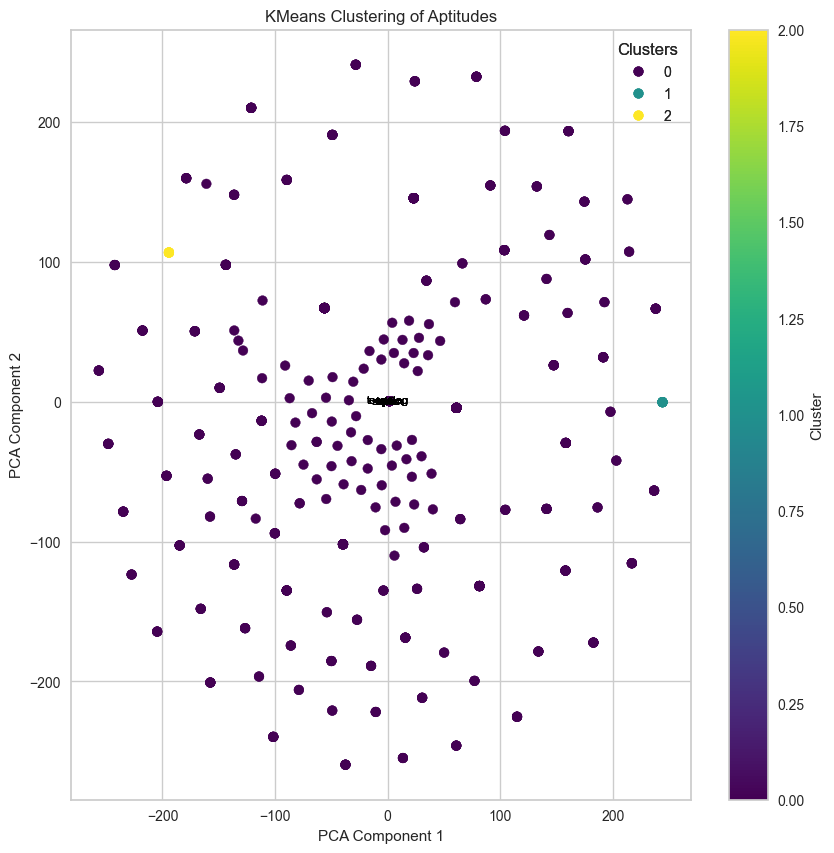

In [187]:

def custom_preprocessor(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    # Dividir el texto en palabras y eliminar las que están en la lista extendida de stopwords
    words = text.split()
    words = [word for word in words if word not in extended_common_words]
    # Volver a unir las palabras en una cadena de texto
    text = ' '.join(words)
    return text



def custom_tokenizer(text):
    stemmer = SnowballStemmer('spanish')
    words = word_tokenize(text)
    return [stemmer.stem(word) for word in words]

vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"),
                             ngram_range=(1, 2),
                             max_df=0.5,
                             min_df=2,
                             max_features=500,  # Ajustar el número de características
                             preprocessor=custom_preprocessor,
                             tokenizer=custom_tokenizer)

from nltk.tokenize import word_tokenize
import re
from sklearn.manifold import TSNE


# Extender la lista de stopwords con términos específicos irrelevantes
extended_common_words = set(stopwords.words('spanish')) | {'desarrollo', 'empresa','mejor','desarroll'}



X = vectorizer.fit_transform(df_expandido_Carreras['Aptitud'])
Y = df_expandido_Carreras["Vacante"]

# Clustering
kmeans = KMeans(n_clusters=3, n_init=20, random_state=42)
kmeans.fit(X,Y)
df_expandido_Carreras['Cluster'] = kmeans.labels_

# Identificar las palabras más representativas para cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Visualización usando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Si decides probar t-SNE en lugar de PCA para la reducción de dimensionalidad:

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_data_tsne = tsne.fit_transform(X.toarray())

# Graficar
plt.figure(figsize=(10, 10))
scatter = plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')

# Título y etiquetas
plt.title('KMeans Clustering of Aptitudes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Añadir las palabras más representativas al gráfico
for i in range(reduced_data.shape[0]):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], 
             terms[order_centroids[kmeans.labels_[i], 0]], 
             ha='center', va='center', size=8, color='black')

# Crear una leyenda con los nombres de los clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.colorbar(scatter, label='Cluster')
plt.show()



El código realiza un análisis de agrupamiento (clustering) de datos textuales utilizando el algoritmo DBSCAN en lugar de KMeans. Este análisis se aplica a un conjunto de datos que se supone contiene descripciones de aptitudes y categorías de vacantes (empleos). El proceso se divide en varias etapas clave:

Preprocesamiento de Texto: Se limpia y prepara el texto para el análisis mediante funciones de preprocesamiento y tokenización. Esto incluye convertir el texto a minúsculas, eliminar números y puntuación, y filtrar palabras irrelevantes (stopwords) que no aportan significado útil al análisis.

Vectorización de Texto con TF-IDF: Se convierten las descripciones de aptitudes a una representación numérica utilizando el método TF-IDF (Frecuencia de Término - Frecuencia Inversa de Documento). Esta técnica pondera las palabras en los documentos, destacando la importancia de aquellas palabras que son frecuentes en un documento pero no en todo el conjunto de datos. El resultado es una matriz donde cada fila representa una descripción de aptitud y cada columna una palabra única del conjunto de datos, con los valores representando la importancia (peso) de cada palabra en las descripciones.

Agrupamiento con DBSCAN: El algoritmo DBSCAN se aplica a la matriz TF-IDF. DBSCAN agrupa los datos basándose en la densidad de los puntos, lo cual es especialmente útil para identificar clústeres de formas irregulares y para manejar datos con ruido (outliers). Los parámetros eps (la distancia máxima entre dos muestras para que una se considere en la vecindad de la otra) y min_samples (el número mínimo de muestras en un vecindario para que un punto sea considerado un punto central) se ajustan según las necesidades específicas del conjunto de datos.

Asignación de Clústeres: Se asigna un clúster a cada descripción de aptitud en el conjunto de datos, basándose en los resultados del agrupamiento DBSCAN. DBSCAN puede asignar el valor -1 a algunos puntos, indicando que son puntos atípicos o ruido, es decir, no pertenecen a ningún clúster.

Visualización de Clústeres: Se utiliza el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de la matriz TF-IDF a dos dimensiones, lo cual permite visualizar los clústeres en un gráfico bidimensional. Se grafican los puntos (descripciones de aptitudes) con colores que representan los diferentes clústeres identificados por DBSCAN.

Mejoras y Consideraciones Adicionales:

Customización de Stopwords: Se extiende la lista de stopwords para incluir términos específicos que no son relevantes para el análisis.
Tokenización y Stemming: Se tokeniza el texto (dividirlo en palabras o tokens) y se aplica stemming (reducir las palabras a su raíz o forma base) para mejorar la consistencia de la representación textual antes de la vectorización.
Este código es un ejemplo de cómo preparar y analizar datos textuales para identificar patrones y agrupaciones naturales sin la necesidad de etiquetas predefinidas. El uso de DBSCAN ofrece flexibilidad en el manejo de clústeres de diversas formas y tamaños, así como la capacidad de identificar y manejar outliers.

c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


           Aptitud                Vacante  Cluster
0            datos    Científico de Datos       -1
1          ciencia    Científico de Datos       -1
2    investigación    Científico de Datos       -1
3         análisis    Científico de Datos        0
4       científico    Científico de Datos       -1
..             ...                    ...      ...
895     beneficios  Ingeniero de Software       -1
896    actividades  Ingeniero de Software       -1
897   metodologías  Ingeniero de Software       -1
898         visite  Ingeniero de Software       -1
899     viabilidad  Ingeniero de Software       -1

[900 rows x 3 columns]


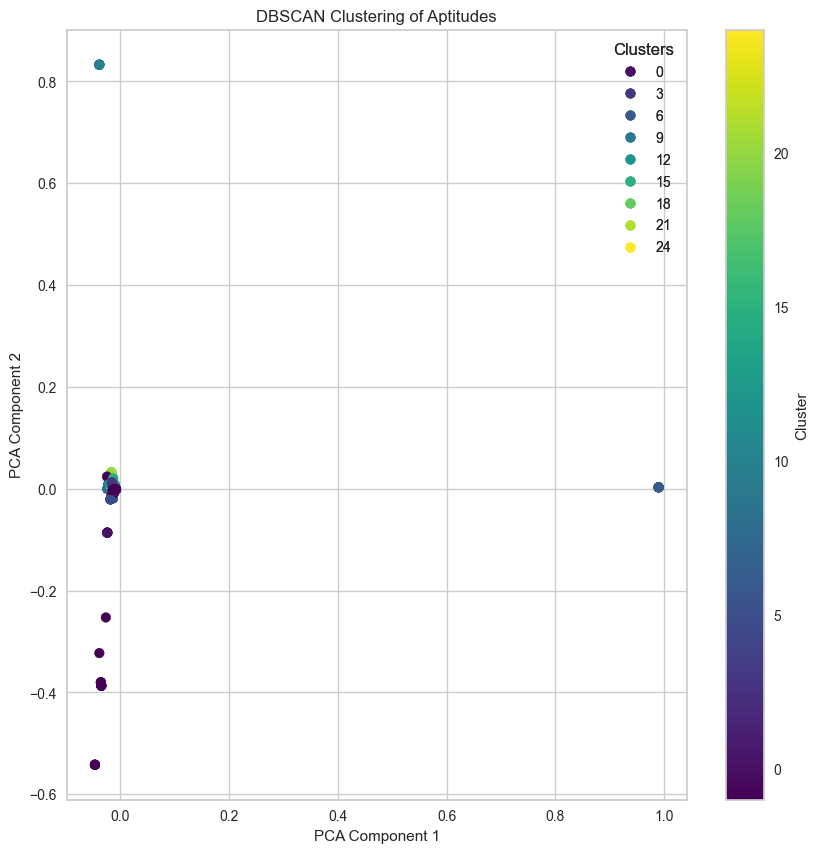

In [188]:


# Extender la lista de stopwords con términos específicos irrelevantes
extended_common_words = set(stopwords.words('spanish')) | {'desarrollo', 'empresa', 'mejor', 'desarroll'}

def custom_preprocessor(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    words = text.split()
    words = [word for word in words if word not in extended_common_words]
    text = ' '.join(words)
    return text

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Supongamos que df_expandido_Carreras es tu DataFrame y ya contiene las columnas 'Vacante' y 'Aptitud'
df_expandido_Carreras['Aptitud'] = df_expandido_Carreras['Aptitud'].apply(clean_text)

def custom_tokenizer(text):
    stemmer = SnowballStemmer('spanish')
    words = word_tokenize(text)
    return [stemmer.stem(word) for word in words]

vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"), preprocessor=custom_preprocessor, tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(df_expandido_Carreras['Aptitud'])

# Ejecutar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según sea necesario
dbscan.fit(X)

# Asignar cada aptitud a su cluster
df_expandido_Carreras['Cluster'] = dbscan.labels_

# Mostrar los resultados
print(df_expandido_Carreras[['Aptitud', 'Vacante', 'Cluster']])

# Visualización usando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

# Graficar
plt.figure(figsize=(10, 10))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan.labels_, cmap='viridis', marker='o')

# Título y etiquetas
plt.title('DBSCAN Clustering of Aptitudes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Crear una leyenda para los clusters identificados
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.colorbar(scatter, label='Cluster')
plt.show()


In [189]:
# Contar cuántos objetos fueron asignados a cada cluster, incluyendo outliers (-1)
cluster_counts = df_expandido_Carreras['Cluster'].value_counts()
print("Cantidad de objetos asignados a cada cluster (incluyendo outliers):")
print(cluster_counts)

# Filtrar los datos para excluir outliers antes de calcular el coeficiente de silueta
mask = df_expandido_Carreras['Cluster'] != -1
X_filtered = X[mask]
labels_filtered = df_expandido_Carreras.loc[mask, 'Cluster']

# Evaluación del modelo DBSCAN usando el coeficiente de silueta
if len(np.unique(labels_filtered)) > 1:  # Asegurarse de que haya al menos 2 clústeres excluyendo outliers
    silhouette_avg = silhouette_score(X_filtered, labels_filtered)
    print("El coeficiente de silueta promedio (excluyendo outliers) es:", silhouette_avg)
else:
    print("No es posible calcular el coeficiente de silueta con menos de 2 clústeres.")

Cantidad de objetos asignados a cada cluster (incluyendo outliers):
Cluster
-1     740
 1      21
 6      10
 10      8
 9       7
 8       6
 17      6
 11      6
 12      6
 7       6
 3       6
 2       6
 24      6
 4       6
 0       5
 13      5
 14      5
 15      5
 5       5
 18      5
 19      5
 20      5
 21      5
 22      5
 23      5
 16      5
Name: count, dtype: int64
El coeficiente de silueta promedio (excluyendo outliers) es: 1.0


In [190]:

# Función para obtener las palabras más frecuentes para los clústeres identificados por DBSCAN
def get_top_keywords_dbscan(n_terms):
    keywords_per_cluster = defaultdict(list)
    # Iterar a través de los clústeres excluyendo outliers
    for cluster_id in np.unique(df_expandido_Carreras['Cluster']):
        if cluster_id == -1:
            continue  # Saltarse outliers
        indices = np.where(df_expandido_Carreras['Cluster'] == cluster_id)[0]
        cluster_matrix = X[indices]
        # Sumar la matriz TF-IDF a lo largo de los documentos para encontrar las palabras más frecuentes
        summed_matrix = cluster_matrix.sum(axis=0)
        sorted_indices = np.argsort(summed_matrix).flatten()[::-1]
        top_indices = sorted_indices[:n_terms]
        keywords = [feature_names[ind] for ind in top_indices]
        keywords_per_cluster[cluster_id] = keywords
    return keywords_per_cluster

# Obtener las palabras clave para cada cluster, excluyendo outliers
top_keywords_per_cluster = get_top_keywords_dbscan(5)

# Imprimir las palabras clave por cluster
for cluster_id, keywords in top_keywords_per_cluster.items():
    print(f"Cluster {cluster_id}: {keywords}")

Cluster 0: [array([['able', 'obligatori', 'objet', 'numer', 'nucle', 'nub', 'nort',
        'norm', 'niñ', 'nivel', 'newton', 'necesit', 'necesari',
        'namelight', 'namecolorful', 'nacional', 'mysql', 'mvc',
        'mundial', 'muebl', 'mrp', 'movil', 'montañ', 'montaj', 'modul',
        'modific', 'ofrec', 'model', 'oper', 'optimic', 'plsql',
        'plataform', 'plant', 'plan', 'pist', 'pil', 'piez', 'phd',
        'pes', 'perspect', 'personal', 'permanent', 'pequeñ', 'penumbr',
        'pediatr', 'pasion', 'particip', 'paquet', 'pal', 'orig',
        'orient', 'organiz', 'orden', 'oracl', 'optimiz', 'oportun',
        'mision', 'minimiz', 'minim', 'line', 'limit', 'licenci', 'ley',
        'leer', 'lean', 'jquery', 'jee', 'javascript', 'jav', 'investig',
        'interpersonal', 'internacional', 'intern', 'interfaz',
        'interfac', 'inteligent', 'intel', 'integr', 'institut',
        'instal', 'innov', 'ingenier', 'infraestructur', 'inform',
        'linux', 'llc', 'luga

In [191]:



# Suponiendo que 'X' es la matriz TF-IDF de los conocimientos impartidos y 'y' las etiquetas de clúster de DBSCAN
X_train, X_test, y_train, y_test = train_test_split(X, df_expandido_Carreras['Cluster'], test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Ahora puedes usar 'clf.predict()' para asignar nuevos puntos a clústeres

tutores_vectorizados = vectorizer.transform(merged_df_tutor['ConocimientosImpartidos'])
merged_df_tutor['Cluster'] = clf.predict(tutores_vectorizados)

# Calcular la carrera más representativa para cada cluster
carrera_por_cluster = {}
for cluster in np.unique(merged_df_tutor['Cluster']):  # Usar clústeres predichos para los tutores
    carreras_en_cluster = df_expandido_Carreras[df_expandido_Carreras['Cluster'] == cluster]['Vacante']
    carrera_mas_frecuente = carreras_en_cluster.mode()[0]
    carrera_por_cluster[cluster] = carrera_mas_frecuente

# Comparar los clusters de los tutores con las carreras más representativas de cada cluster
for index, row in merged_df_tutor.iterrows():
    tutor_cluster = row['Cluster']
    carrera_recomendada = carrera_por_cluster.get(tutor_cluster, "No disponible")
    print(f"Tutor: {row['EmailTutor']} - Cluster: {tutor_cluster} - Carrera Recomendada: {carrera_recomendada}")

Tutor: a01178149@tec.mx - Cluster: 11 - Carrera Recomendada: Científico de Datos
Tutor: A01737094@tec.mx - Cluster: -1 - Carrera Recomendada: Científico de Datos
Tutor: A00835528@tec.mx - Cluster: 12 - Carrera Recomendada: Científico de Datos
Tutor: a01658305@tec.mx - Cluster: 6 - Carrera Recomendada: Ingeniero de Software
Tutor: a00832646@tec.mx - Cluster: 6 - Carrera Recomendada: Ingeniero de Software
Tutor: A01633290@tec.mx - Cluster: -1 - Carrera Recomendada: Científico de Datos
Tutor: A01633290@tec.mx - Cluster: -1 - Carrera Recomendada: Científico de Datos
Tutor: A01633821@tec.mx - Cluster: -1 - Carrera Recomendada: Científico de Datos
Tutor: A01625764@tec.mx - Cluster: -1 - Carrera Recomendada: Científico de Datos
Tutor: A01197808@tec.mx - Cluster: -1 - Carrera Recomendada: Científico de Datos
Tutor: johannacg@yahoo.com - Cluster: 1 - Carrera Recomendada: Científico de Datos
Tutor: A01750046@tec.mx - Cluster: -1 - Carrera Recomendada: Científico de Datos
Tutor: A00836197@tec.mx 

Conteo de Objetos por Clúster:
Esto se mantiene igual ya que la función value_counts() puede aplicarse de la misma manera para contar las asignaciones de clústeres realizadas por DBSCAN. La diferencia principal es que DBSCAN puede asignar puntos como outliers con una etiqueta de clúster de -1, lo cual también se incluirá en el conteo.

Evaluación del Modelo DBSCAN usando el Coeficiente de Silueta:
El coeficiente de silueta puede calcularse para los resultados de DBSCAN de la misma manera que para KMeans. Sin embargo, es importante tener en cuenta que los puntos considerados outliers por DBSCAN (etiquetados con -1) no deben incluirse en el cálculo del coeficiente de silueta, ya que esto podría distorsionar la evaluación de la calidad del agrupamiento.


### RandomForestRegressor 

Es una técnica de aprendizaje ensamblado que se utiliza para tareas de regresión. Forma parte de la familia de algoritmos de árboles de decisión y se basa en el principio de bagging (Bootstrap Aggregating), combinando las predicciones de múltiples árboles de decisión para producir una salida más precisa y robusta. Aquí te explico sus características clave y cómo funciona:

- Características Clave

Ensamblado de Árboles: RandomForest construye un conjunto (bosque) de árboles de decisión durante el entrenamiento. Cada árbol se entrena en una muestra aleatoria de los datos, seleccionada con reemplazo, conocida como bootstrap sample.

Desacoplamiento: Cada árbol toma decisiones independientemente de los demás. Al final, el RandomForest toma el promedio de las predicciones de todos los árboles para dar la salida final para regresiones.

Selección Aleatoria de Características: Al construir cada división en un árbol, RandomForest selecciona un subconjunto aleatorio de las características disponibles. Esto aumenta la diversidad entre los árboles, agregando robustez al modelo.

- Cómo Funciona

Bootstrap Sampling: Para cada árbol en el bosque, se selecciona una muestra aleatoria de los datos de entrenamiento con reemplazo. Esto significa que algunos datos pueden ser seleccionados múltiples veces para un árbol, mientras que otros pueden no ser seleccionados en absoluto.

Construcción de Árboles: Cada árbol se construye de manera recursiva. En cada nodo, se selecciona un subconjunto aleatorio de las características, y se elige la mejor división entre estas características basándose en un criterio de pureza (por ejemplo, la reducción máxima de la varianza).

Predicción: Para hacer una predicción, el input pasa a través de cada árbol en el bosque. Cada árbol da una predicción de la variable objetivo, y el RandomForest toma el promedio (o la mediana, dependiendo de la configuración) de estas predicciones como la salida final.

Reducción del Sobreajuste: Gracias al entrenamiento en subconjuntos aleatorios de los datos y características, RandomForest tiende a sobreajustarse menos a los datos de entrenamiento en comparación con un único árbol de decisión, especialmente en presencia de ruido.

- Ventajas

Robustez: Al combinar múltiples árboles, el RandomForest puede manejar bien tanto los datos ruidosos como los outliers.

Manejo de Datos Faltantes: Capacidad para manejar datos faltantes al mantener la precisión cuando una parte de los datos está perdida.

Importancia de las Características: Proporciona una evaluación útil de la importancia de cada característica en la predicción, lo cual es valioso para la selección de características.

- Desventajas

Complejidad: Un bosque con un gran número de árboles puede ser computacionalmente costoso de entrenar y usar para predicciones, especialmente con grandes volúmenes de datos.

Interpretabilidad: Aunque cada árbol individual es interpretable, un conjunto de cientos o miles de árboles puede ser difícil de interpretar y entender en comparación con modelos más simples.

In [311]:


merged_df_tutor_ts = merged_df_tutor

# Convertir la columna de fecha y hora a una representación numérica
merged_df_tutor_ts['FechayHoraTutoria'] = pd.to_datetime(merged_df_tutor_ts['FechayHoraTutoria'])
merged_df_tutor_ts['Dia'] = merged_df_tutor_ts['FechayHoraTutoria'].dt.day
merged_df_tutor_ts['Mes'] = merged_df_tutor_ts['FechayHoraTutoria'].dt.month
merged_df_tutor_ts['Anio'] = merged_df_tutor_ts['FechayHoraTutoria'].dt.year

# Eliminar la columna original de fecha y hora después de extraer la información relevante
merged_df_tutor_ts.drop(['FechayHoraTutoria'], axis=1, inplace=True)



In [312]:
# Codificación One-Hot para las variables categóricas restantes
X = pd.get_dummies(merged_df_tutor_ts.drop(['AverageAnswerByTutor'], axis=1), drop_first=True)
y = merged_df_tutor_ts['AverageAnswerByTutor']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Suponiendo que X_train, X_test, y_train, y_test ya están definidos

# Definir el modelo y los parámetros para el GridSearch
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],  # Número de árboles en el bosque
    'max_depth': [2,3,4],  # Máxima profundidad del árbol
    'min_samples_split': [2, 5],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2]  # Número mínimo de muestras requeridas para ser una hoja de nodo
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor score
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (RMSE):", (-grid_search.best_score_) ** 0.5)

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("RMSE en el conjunto de prueba:", mean_squared_error(y_test, y_pred, squared=False))
print("R^2 en el conjunto de prueba:", r2_score(y_test, y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores parámetros: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score (RMSE): 0.17126816121717534
RMSE en el conjunto de prueba: 0.1713850101050845
R^2 en el conjunto de prueba: 0.05116183580511757


### Ridge Regression (Regresión de Cresta)

La Regresión Ridge es una técnica que aplica regularización L2 a la regresión lineal, penalizando los coeficientes grandes para evitar el sobreajuste y mejorar la capacidad de generalización del modelo. Es especialmente útil cuando hay una alta multicolinealidad entre las características o cuando el número de características es mayor que el número de observaciones.

Ridge Regression es una técnica de regresión lineal que se utiliza para abordar el problema del sobreajuste (overfitting) en modelos de regresión lineal. A continuación, se detallan sus características clave:

Regularización L2: Ridge Regression utiliza una regularización L2 (norma euclidiana al cuadrado) que agrega un término de penalización a la función de costo. Este término de penalización es proporcional al cuadrado de los coeficientes de las características. Su propósito es reducir el tamaño de los coeficientes, lo que ayuda a prevenir el sobreajuste.

Reducción de Varianza: Al reducir el tamaño de los coeficientes, Ridge Regression reduce la varianza del modelo, lo que lo hace más robusto y menos sensible a fluctuaciones en los datos de entrenamiento.

No Realiza Selección de Características: A diferencia de Lasso, Ridge no realiza selección automática de características, lo que significa que conservará todas las características en el modelo, aunque sus coeficientes pueden ser pequeños.

In [313]:

# Definir el espacio de hiperparámetros
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # Puedes expandir esta lista según sea necesario
}

# Configurar GridSearchCV para Ridge Regression
grid_search_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Entrenar el GridSearchCV
grid_search_ridge.fit(X_train, y_train)

# Mejores parámetros y mejor score para Ridge
print("Mejores parámetros (Ridge):", grid_search_ridge.best_params_)
print("Mejor score (Ridge):", (-grid_search_ridge.best_score_) ** 0.5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


Mejores parámetros (Ridge): {'alpha': 0.1}
Mejor score (Ridge): 0.15596168046241682


In [314]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, score_type):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='darkblue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='darkblue')
    
    plt.plot(train_sizes, val_mean, color='darkgreen', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='darkgreen')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.grid()
    plt.ylabel(score_type)
    plt.legend(loc='lower left')
    plt.show()

Curvas de aprendizaje del modelo RF:


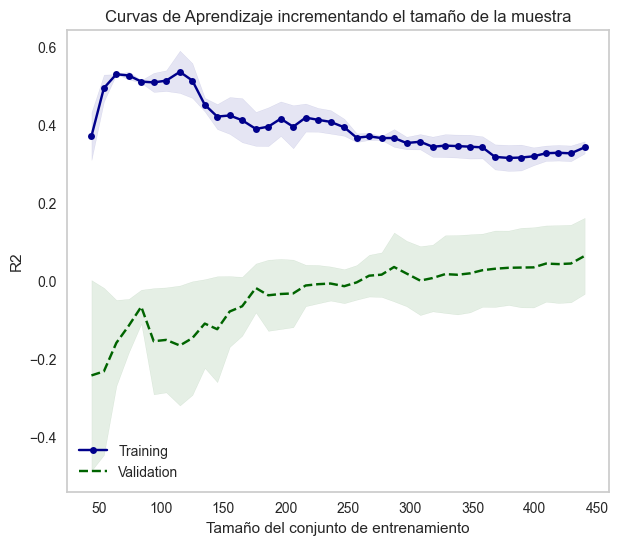

In [315]:


def mi_ModeloYCurvasRF(Xin):
    # Obtener los mejores parámetros del modelo optimizado
    n_estimators = grid_search.best_params_['n_estimators']
    max_depth = grid_search.best_params_['max_depth']
    min_samples_split = grid_search.best_params_['min_samples_split']
    min_samples_leaf = grid_search.best_params_['min_samples_leaf']
    
    # Crear el modelo RandomForestRegressor con los mejores parámetros
    modeloRF_Optimizado = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Definir rangos de tamaños de entrenamiento
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    # Calcular las curvas de aprendizaje
    tr_sizes, tr_scores, val_scores = learning_curve(
        estimator=modeloRF_Optimizado,
        X=Xin,
        y=y_train,
        cv=5,
        train_sizes=delta_train_sz,
        scoring="r2",  # Cambiar 'recall' por la métrica que desees
        random_state=42
    )

    # Graficar las curvas de aprendizaje
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "R2")

print('Curvas de aprendizaje del modelo RF:')
mi_ModeloYCurvasRF(X_train)

Curvas de aprendizaje del modelo Ridge:


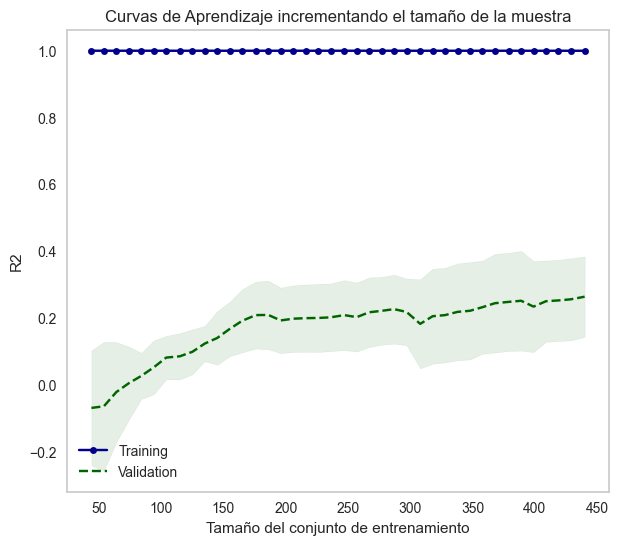

In [254]:
def mi_ModeloYCurvasRidge(Xin):
    # Obtener los mejores parámetros del modelo optimizado
    alpha = grid_search_ridge.best_params_['alpha']
  
    
    modeloRidge_Optimizado = Ridge(
        alpha=alpha,
        random_state=42
    )

    # Definir rangos de tamaños de entrenamiento
    delta_train_sz = np.linspace(0.1, 1.0, num=40)

    # Calcular las curvas de aprendizaje
    tr_sizes, tr_scores, val_scores = learning_curve(
        estimator=modeloRidge_Optimizado,
        X=Xin,
        y=y_train,
        cv=5,
        train_sizes=delta_train_sz,
        scoring="r2",  # Cambiar 'recall' por la métrica que desees
        random_state=42
    )

    # Graficar las curvas de aprendizaje
    mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, "R2")

print('Curvas de aprendizaje del modelo Ridge:')
mi_ModeloYCurvasRidge(X_train)

# Analisis DF Alumnos

c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\rigob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien'

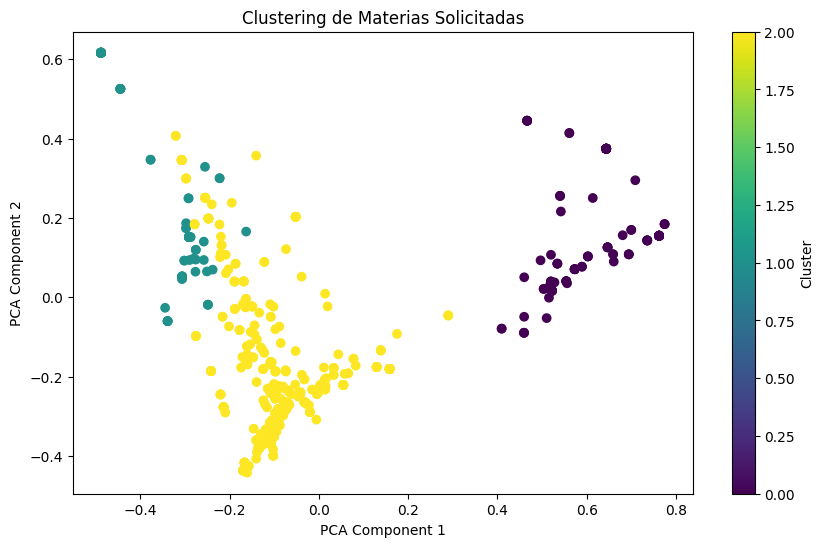

     index                                           Question  Answer  \
0        0  Considero que en esta sesión tuve el avance co...       5   
1        2  Considero que en esta sesión tuve el avance co...       5   
2       23  Considero que en esta sesión tuve el avance co...       1   
3       24  Considero que en esta sesión tuve el avance co...       5   
4       25   ¿Cómo calificarías la calidad del desempeño d...       5   
..     ...                                                ...     ...   
657   2409  Considero que en esta sesión tuve el avance co...       5   
658   2410  Considero que en esta sesión tuve el avance co...       5   
659   2413  Considero que en esta sesión tuve el avance co...       5   
660   2414  Considero que en esta sesión tuve el avance co...       4   
661   2415  Considero que en esta sesión tuve el avance co...       5   

      FechayHoraTutoria                  EmailAlumno        EmailTutor  \
0   2023-05-30 18:00:00             a01753728@tec

In [ ]:
# Definir un preprocesador y tokenizer personalizados
def custom_preprocessor(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar puntuación
    return text

def custom_tokenizer(text):
    stemmer = SnowballStemmer('spanish')
    words = word_tokenize(text)
    return [stemmer.stem(word) for word in words]

vectorizer = TfidfVectorizer(stop_words=stopwords.words("spanish"),
                             ngram_range=(1, 2),  # Usar unigramas y bigramas
                             max_df=0.95,
                             min_df=0.01,
                             max_features=1000,  # Limitar a 1000 términos más relevantes
                             preprocessor=custom_preprocessor,
                             tokenizer=custom_tokenizer)
X = vectorizer.fit_transform(merged_df_Alum['ConocimientosImpartidos'])

# Paso 2: Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Asignando los clusters al DataFrame original
merged_df_Alum['Cluster'] = kmeans.labels_

# Paso 3: Visualización (opcional)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=merged_df_Alum['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering de Materias Solicitadas')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Mostrar el DataFrame resultante
print(merged_df_Alum)

In [ ]:
# Obtener los términos del vocabulario del vectorizador
feature_names = vectorizer.get_feature_names_out()


# Crear una función para obtener las palabras clave de cada centroide
def get_top_keywords(n_terms):
    keywords_per_cluster = []
    for i, centroid in enumerate(kmeans.cluster_centers_):
        sorted_centroid = centroid.argsort()[-n_terms:]
        keywords = [feature_names[ind] for ind in sorted_centroid]
        keywords_per_cluster.append(keywords)
    return keywords_per_cluster

# Obtener las palabras clave para cada cluster
top_keywords_per_cluster = get_top_keywords(20)

# Imprimir las palabras clave por cluster
for i, keywords in enumerate(top_keywords_per_cluster):
    print(f"Cluster {i}: {keywords}")

Cluster 0: ['integral', 'ecuacion lineal', 'lineal', 'ecuacion', 'matemat ecuacion', 'deriv matemat', 'matemat', 'calcul', 'matemat calcul', 'tecnic', 'formul', 'formul tecnic', 'deriv mediant', 'calcul deriv', 'regl formul', 'regl', 'mediant regl', 'mediant', 'tecnic deriv', 'deriv']
Cluster 1: ['algebr quimic', 'matemat magnitud', 'numer real', 'magnitud numer', 'real', 'magnitud', 'numer', 'algebr matemat', 'matemat ecuacion', 'ecuacion', 'lineal', 'ecuacion lineal', 'lineal matemat', 'matemat', 'algebr', 'aritmet', 'aritmet algebr', 'problem aritmet', 'matemat problem', 'problem']
Cluster 2: ['angul', 'relacion', 'relacion trigonometr', 'ecuacion cuadrat', 'cuadrat', 'matemat trigonometr', 'fisic', 'program', 'integral', 'matemat integral', 'matemat calcul', 'calcul', 'calcul matemat', 'lineal', 'ecuacion lineal', 'trigonometr', 'quimic', 'matemat ecuacion', 'ecuacion', 'matemat']


La interpretación de los clusters muestra una distinción clara en las áreas de enfoque y demanda dentro de las materias solicitadas para tutorías. El análisis revela que:

Cluster 0 se enfoca primordialmente en temas matemáticos avanzados, tales como cálculo y ecuaciones, señalando un interés específico en métodos y técnicas de resolución de problemas matemáticos. Este cluster sugiere una necesidad de profundización en conceptos de matemáticas que son fundamentales en campos como ingeniería y ciencias puras.

Cluster 1 refleja una combinación de álgebra, química y matemáticas básicas, indicando una demanda de tutorías en conceptos fundamentales. La presencia de términos como "magnitudes numéricas" y "problemas aritméticos" implica que hay un segmento significativo de estudiantes buscando apoyo en el fortalecimiento de sus bases en ciencias y matemáticas, posiblemente para prepararse para estudios más avanzados o simplemente para mejorar su comprensión de estos temas esenciales.

Cluster 2 destaca por incluir materias relacionadas con la trigonometría, ecuaciones cuadráticas, física y, de manera interesante, programación. Este cluster no solo subraya una demanda de tutorías en áreas específicas de matemáticas y ciencias, sino que también revela un interés creciente en la informática, sugiriendo una intersección entre el aprendizaje de ciencias exactas y el desarrollo de habilidades en tecnología de la información.

Para identificar el Top 10 de Materias Más Solicitadas, sería necesario realizar un análisis más detallado, basado en la frecuencia de cada término mencionado en toda la columna ConocimientosImpartidos. Este análisis cuantitativo proporcionaría una lista precisa de las materias con mayor demanda, permitiendo a instituciones educativas y tutores adaptar sus ofertas de manera más efectiva a las necesidades de los estudiantes.

A partir de esta interpretación, se recomienda:

Desarrollar Programas de Tutoría que estén específicamente diseñados para abordar los temas prevalentes en cada cluster, garantizando que los estudiantes reciban apoyo en las áreas de mayor demanda.

Capacitar a los Tutores en estas áreas específicas para mejorar la calidad de la tutoría ofrecida, asegurando que puedan proporcionar orientación efectiva y relevante basada en las tendencias actuales de demanda.

Crear o Mejorar Material de Estudio y otros recursos educativos que se centren en los temas más solicitados, mejorando así la accesibilidad y comprensión de los estudiantes sobre estos temas clave.

Este enfoque estratégico no solo mejora la experiencia de aprendizaje de los estudiantes, sino que también permite a los educadores y tutores maximizar su impacto, alineando sus esfuerzos con las necesidades reales y actuales de su audiencia.

In [ ]:
# Paso 1: Extraer todas las materias mencionadas en 'ConocimientosImpartidos'
# Esto asume que cada materia está separada por un guión o coma
materias = []
for conocimientos in merged_df_Alum['ConocimientosImpartidos']:
    # Aquí, ajusta la separación según cómo estén estructurados tus datos
    materias.extend([materia.strip() for materia in conocimientos.split('-')])

# Contar la frecuencia de cada materia
conteo_materias = Counter(materias)

# Paso 2: Identificar el Top 10 de materias más solicitadas
top_10_materias = conteo_materias.most_common(10)

# Mostrar el Top 10 de materias
print("Top 10 de Materias Más Solicitadas:")
for materia, frecuencia in top_10_materias:
    print(f"{materia}: {frecuencia} veces")

Top 10 de Materias Más Solicitadas:
Matemáticas: 983 veces
Ecuaciones lineales: 198 veces
Cálculo de derivadas mediante reglas, fórmulas y técnicas de derivación: 132 veces
Química: 129 veces
Problemas aritméticos y algebraicos: 111 veces
Calculo: 95 veces
Integrales: 87 veces
Física: 81 veces
Preparación a la Universidad: 62 veces
Ángulos, triángulos y relaciones trigonométricas: 61 veces


# Referencias:

- Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
- Brownlee, J. (2020, 04 17). How to Develop Voting Ensembles With Python. Retrieved from https://machinelearningmastery.com/voting-ensembles-with-python/
- VanderPlas, J.  Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".
- GEOMATAS. (2022). 7 librerías de Python para SIG y cartografía. Obtenido de https://geomatas.com/7-librerias-de-python-para-sig-y-cartografia/
- GeoPy. (2022). Welcome to GeoPy’s documentation! Obtenido de https://geopy.readthedocs.io/en/stable/
- NAIK, K. (2020). P2: sklearn K-Means (Elbow and Silhouette Method). Obtenido de https://www.kaggle.com/code/funxexcel/p2-sklearn-k-means-elbow-and-silhouette-method/notebook
- Geeks for Geeks. (2022, 08 22). Elbow Method for optimal value of k in KMeans. Retrieved from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- Dangeti, P. (2017). The elbow method. In Statistics for Machine Learning. Birmingham, UK: O´REILLY.
- Bahl, A. (22 de 11 de 2019). MAPE v/s MAE% v/s RMSE. Obtenido de https://agrimabahl.medium.com/mape-v-s-mae-v-s-rmse-3e358fd58f65
- Gad, A. (27 de 07 de 2018). Beginners Ask “How Many Hidden Layers/Neurons to Use in Artificial Neural Networks?”. Obtenido de https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e
- IBM. (13 de 09 de 2022). Tipos de variables. Obtenido de https://www.ibm.com/docs/es/spss-statistics/saas?topic=charts-variable-types
- Morales, L. E. (2022). Perceptrón Multi Capa (MLP): Interpretación Geométrica (ejemplo). Guadalajara, Mexico: ITESM.
- Morales, L. E. (2022). Redes Neuronales Artificiales: Perceptrón Simple. Guadalajara, Mexico: ITESM.
- Morales, L. E. (2022). Redes Neuronales y Aprendizaje Automático. Guadalajara: ITESM.
- scikit-learn. (29 de 10 de 2022). Varying regularization in Multi-layer Perceptron. Obtenido de https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#:~:text=Alpha%20is%20a%20parameter%20for,that%20appears%20with%20lesser%20curvatures
- Sérgio Moro, P. R. (2015). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. ELSEVIER, 11.
- Shin, T. (26 de 02 de 2022). Understanding Feature Importance and How to Implement it in Python. Obtenido de https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
-Ramírez, J. (19 de 07 de 2018). Curvas PR y ROC. Obtenido de https://medium.com/bluekiri/curvas-pr-y-roc-1489fbd9a527#:~:text=PR%20curve%20(curva%20precision%2Drecall)&text=Este%20valor%20es%20el%20Average,comparar%20el%20rendimiento%20de%20modelos
- Vandeput, N. (05 de 07 de 2019). Forecast KPIs: RMSE, MAE, MAPE & Bias. Obtenido de https://towardsdatascience.com/forecast-kpi-rmse-mae-mape-bias-cdc5703d242d
- Zvornicanin, E. (01 de 10 de 2022). What is Feature Importance in Machine Learning? Obtenido de https://www.baeldung.com/cs/ml-feature-importance#:~:text=3.-,3.,a%20current%20model%20and%20prediction.
-Khan, M. (2017, 08 01). KMeans Clustering for Classification. Retrieved from https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a
- Nithum Thain, A. P. (2022, 03). Are Model Predictions Probabilities? Retrieved from https://pair.withgoogle.com/explorables/uncertainty-calibration/
- Visengeriyeva, L., Kammer, A., Bär, I., Kniesz, A., y Plöd, M. (2023). CRISP-ML(Q). The ML Lifecycle Process. MLOps. INNOQ. https://ml-ops.org/content/crisp-mlLinks
- Kumar Mukhiya, S., y Ahmed, U. (2020). Hands-On Exploratory Data Analysis with Python. Packt Publishing. https://learning.oreilly.com/library/view/hands-on-exploratory-data/9781789537253/0957090f-fa4d-4145-95dd-6d3782e5c04d.xhtml
- Galli, S. (2022). Python Feature Engineering Cookbook (2.a ed.). Packt Publishing. https://learning.oreilly.com/library/view/python-feature-engineering/9781804611302/
- Visengeriyeva, L., Kammer, A., Bär, I., Kniesz, A., y Plöd, M. (2023). CRISP-ML(Q). The ML Lifecycle Process. MLOps. INNOQ. https://ml-ops.org/content/crisp-ml

